In [1]:
import pandas as pd
from datetime import datetime, timedelta
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [2]:
from utils.data_extract import fetch_combined_data

# Use the year and will start from starting to ending time
variables = ['HYY_META.O3672', 'HYY_META.NOx672', 'HYY_META.SO2672', 'HYY_META.CO672', 'HYY_META.CO2672']
start_year = 1996
end_year = 2023

data_fetched_hyy = fetch_combined_data(variables, start_year, end_year)

In [3]:
data_fetched_hyy

HYY_META.O3672  HYY_META.NOx672  HYY_META.SO2672  \
time                                                                    
1996-01-01 00:00:00             NaN              NaN              NaN   
1996-01-01 00:01:00             NaN              NaN              NaN   
1996-01-01 00:02:00             NaN              NaN              NaN   
1996-01-01 00:03:00             NaN              NaN              NaN   
1996-01-01 00:04:00             NaN              NaN              NaN   
...                             ...              ...              ...   
2023-12-30 23:55:00             NaN              NaN              NaN   
2023-12-30 23:56:00             NaN              NaN              NaN   
2023-12-30 23:57:00             NaN              NaN              NaN   
2023-12-30 23:58:00             NaN              NaN              NaN   
2023-12-30 23:59:00             NaN              NaN              NaN   

                     HYY_META.CO672  HYY_META.CO2672  
time                                                  
1996-01-01 00:00:00             NaN              NaN  
1996-01-01 00:01:00             NaN              NaN  
1996-01-01 00:02:00             NaN              NaN  
1996-01-01 00:03:00             NaN              NaN  
1996-01-01 00:04:00             NaN              NaN  
...                             ...              ...  
2023-12-30 23:55:00             NaN              NaN  
2023-12-30 23:56:00             NaN              NaN  
2023-12-30 23:57:00             NaN              NaN  
2023-12-30 23:58:00             NaN              NaN  
2023-12-30 23:59:00             NaN              NaN  

[14706720 rows x 5 columns]

In [ ]:
data_fetched.to_csv('data/hyy_trace_minute.csv')

In [ ]:
# def compute_daily_averages(filtered_data):
#     return filtered_data.resample('D').median()

# hyy_data = data_fetched

# hyy_data = compute_daily_averages(hyy_data)

In [4]:
def compute_daily_averages(filtered_data):
    return filtered_data.resample('H').median()

hyy_data = data_fetched_hyy

hyy_data = compute_daily_averages(hyy_data)

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/4142466034.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return filtered_data.resample('H').median()


In [5]:
hyy_data

HYY_META.O3672  HYY_META.NOx672  HYY_META.SO2672  \
time                                                                    
1996-01-01 00:00:00          35.880              NaN              NaN   
1996-01-01 01:00:00          33.300              NaN              NaN   
1996-01-01 02:00:00          19.665              NaN              NaN   
1996-01-01 03:00:00          23.920              NaN              NaN   
1996-01-01 04:00:00          28.590              NaN              NaN   
...                             ...              ...              ...   
2023-12-30 19:00:00          25.705            0.660              NaN   
2023-12-30 20:00:00          24.000            0.885              NaN   
2023-12-30 21:00:00          22.400            0.960              NaN   
2023-12-30 22:00:00          22.190            0.990              NaN   
2023-12-30 23:00:00          21.650            1.110              NaN   

                     HYY_META.CO672  HYY_META.CO2672  
time                                                  
1996-01-01 00:00:00             NaN              NaN  
1996-01-01 01:00:00             NaN              NaN  
1996-01-01 02:00:00             NaN              NaN  
1996-01-01 03:00:00             NaN              NaN  
1996-01-01 04:00:00             NaN              NaN  
...                             ...              ...  
2023-12-30 19:00:00         184.360              NaN  
2023-12-30 20:00:00         183.090              NaN  
2023-12-30 21:00:00         187.295              NaN  
2023-12-30 22:00:00         189.950              NaN  
2023-12-30 23:00:00         183.950              NaN  

[245424 rows x 5 columns]

In [ ]:
# hyy_df = pd.read_csv('data/trace/hyy_trace_data.csv')

In [6]:
hyy_df =hyy_data
hyy_df

HYY_META.O3672  HYY_META.NOx672  HYY_META.SO2672  \
time                                                                    
1996-01-01 00:00:00          35.880              NaN              NaN   
1996-01-01 01:00:00          33.300              NaN              NaN   
1996-01-01 02:00:00          19.665              NaN              NaN   
1996-01-01 03:00:00          23.920              NaN              NaN   
1996-01-01 04:00:00          28.590              NaN              NaN   
...                             ...              ...              ...   
2023-12-30 19:00:00          25.705            0.660              NaN   
2023-12-30 20:00:00          24.000            0.885              NaN   
2023-12-30 21:00:00          22.400            0.960              NaN   
2023-12-30 22:00:00          22.190            0.990              NaN   
2023-12-30 23:00:00          21.650            1.110              NaN   

                     HYY_META.CO672  HYY_META.CO2672  
time                                                  
1996-01-01 00:00:00             NaN              NaN  
1996-01-01 01:00:00             NaN              NaN  
1996-01-01 02:00:00             NaN              NaN  
1996-01-01 03:00:00             NaN              NaN  
1996-01-01 04:00:00             NaN              NaN  
...                             ...              ...  
2023-12-30 19:00:00         184.360              NaN  
2023-12-30 20:00:00         183.090              NaN  
2023-12-30 21:00:00         187.295              NaN  
2023-12-30 22:00:00         189.950              NaN  
2023-12-30 23:00:00         183.950              NaN  

[245424 rows x 5 columns]

In [46]:
##############################
# Be careful first then runb this
##############################
hyy_df.dropna()

time  HYY_META.O3672  HYY_META.NOx672  HYY_META.SO2672  \
3678  2006-01-26          35.200            0.690            0.090   
3679  2006-01-27          39.940            0.760            0.040   
3680  2006-01-28          36.770            1.030            0.120   
3681  2006-01-29          39.885            0.580            0.000   
3682  2006-01-30          41.605            0.670            0.050   
...          ...             ...              ...              ...   
5533  2011-02-24          24.480            8.215            4.085   
5534  2011-02-25          29.265           11.930            2.450   
5535  2011-02-26          43.560            1.765            0.670   
5536  2011-02-27          44.110            1.095            0.705   
5537  2011-02-28          42.650            3.775            0.865   

      HYY_META.CO672  HYY_META.CO2672  
3678         172.050          372.650  
3679         160.460          370.855  
3680         169.090          372.430  
3681         160.400          370.360  
3682         159.740          370.100  
...              ...              ...  
5533         241.380          412.020  
5534         251.475          408.420  
5535         233.175          402.605  
5536         277.275          406.205  
5537         224.550          404.255  

[1523 rows x 6 columns]

In [ ]:
hyy_df.set_index("time", inplace=True)

In [9]:
hyy_df.index = pd.to_datetime(hyy_df.index)

In [10]:
hyy_df

HYY_META.O3672  HYY_META.NOx672  HYY_META.SO2672  \
time                                                                    
1996-01-01 00:00:00          35.880              NaN              NaN   
1996-01-01 01:00:00          33.300              NaN              NaN   
1996-01-01 02:00:00          19.665              NaN              NaN   
1996-01-01 03:00:00          23.920              NaN              NaN   
1996-01-01 04:00:00          28.590              NaN              NaN   
...                             ...              ...              ...   
2023-12-30 19:00:00          25.705            0.660              NaN   
2023-12-30 20:00:00          24.000            0.885              NaN   
2023-12-30 21:00:00          22.400            0.960              NaN   
2023-12-30 22:00:00          22.190            0.990              NaN   
2023-12-30 23:00:00          21.650            1.110              NaN   

                     HYY_META.CO672  HYY_META.CO2672  
time                                                  
1996-01-01 00:00:00             NaN              NaN  
1996-01-01 01:00:00             NaN              NaN  
1996-01-01 02:00:00             NaN              NaN  
1996-01-01 03:00:00             NaN              NaN  
1996-01-01 04:00:00             NaN              NaN  
...                             ...              ...  
2023-12-30 19:00:00         184.360              NaN  
2023-12-30 20:00:00         183.090              NaN  
2023-12-30 21:00:00         187.295              NaN  
2023-12-30 22:00:00         189.950              NaN  
2023-12-30 23:00:00         183.950              NaN  

[245424 rows x 5 columns]

In [11]:
hyy_winter = hyy_df[(hyy_df.index.month == 12) | (hyy_df.index.month <= 2)]
hyy_spring = hyy_df[(hyy_df.index.month >= 3) & (hyy_df.index.month <= 5)]
hyy_autumn = hyy_df[(hyy_df.index.month >= 9) & (hyy_df.index.month <= 11)]
hyy_summer = hyy_df[(hyy_df.index.month >= 6) & (hyy_df.index.month <= 8)]

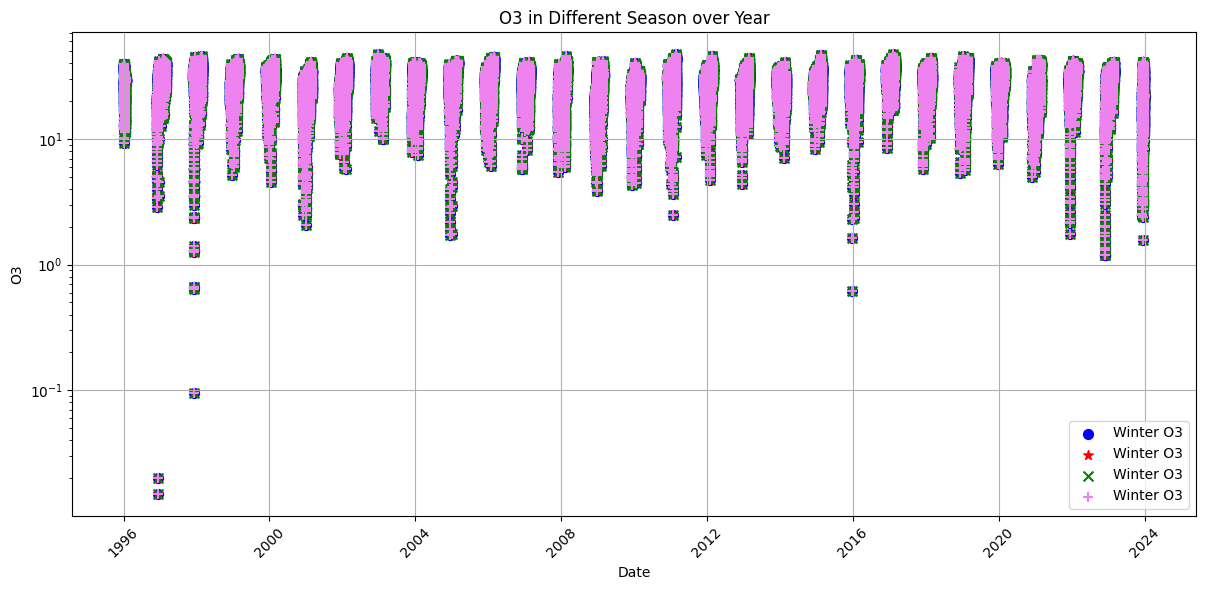

In [12]:
import matplotlib.pyplot as plt

# Visualization of trends
plt.figure(figsize=(12, 6))
plt.scatter(hyy_winter.index, hyy_winter['HYY_META.O3672'], label='Winter O3', color='blue', marker='o', s=50)
plt.scatter(hyy_winter.index, hyy_winter['HYY_META.O3672'], label='Winter O3', color='red', marker='*', s=50)
plt.scatter(hyy_winter.index, hyy_winter['HYY_META.O3672'], label='Winter O3', color='green', marker='x', s=50)
plt.scatter(hyy_winter.index, hyy_winter['HYY_META.O3672'], label='Winter O3', color='violet', marker='+', s=50)

plt.title('O3 in Different Season over Year')
plt.xlabel('Date')
plt.ylabel('O3')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.yscale('log')
plt.show()


/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1500358872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_summer['Year'] = hyy_summer.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1500358872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_summer.reset_index(), showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1500358872.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will 

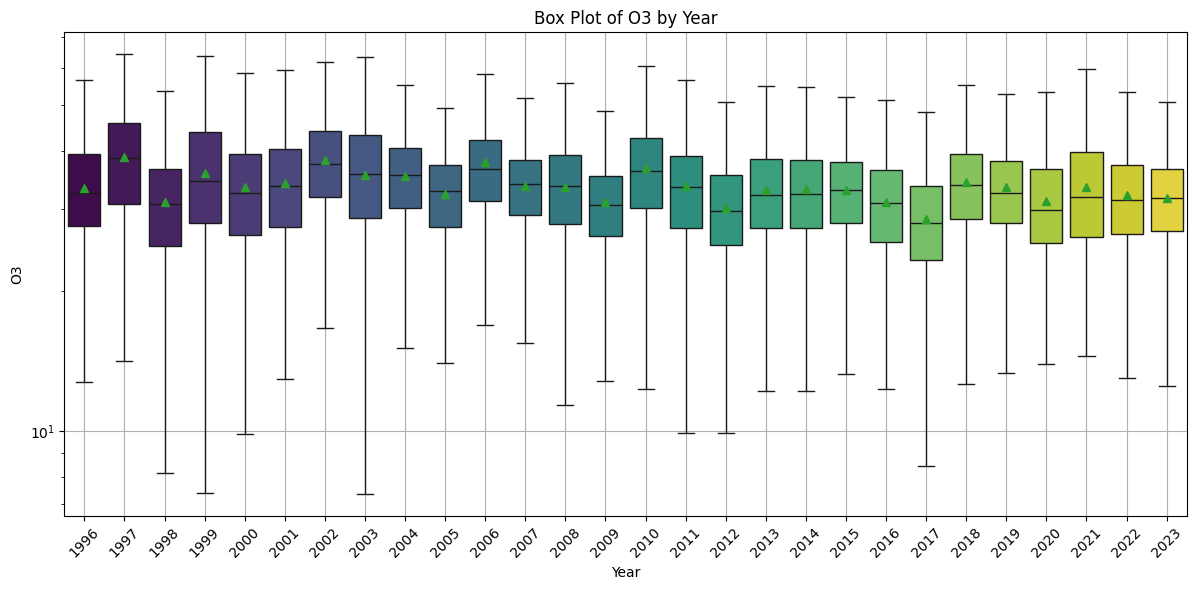

In [13]:
hyy_summer['Year'] = hyy_summer.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_summer.reset_index(), showmeans=True, showfliers=False, palette=colors)
plt.title('Box Plot of O3 by Year')
plt.xlabel('Year')
plt.ylabel('O3')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.yscale('log')
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2561434793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2561434793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2561434793.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a lis

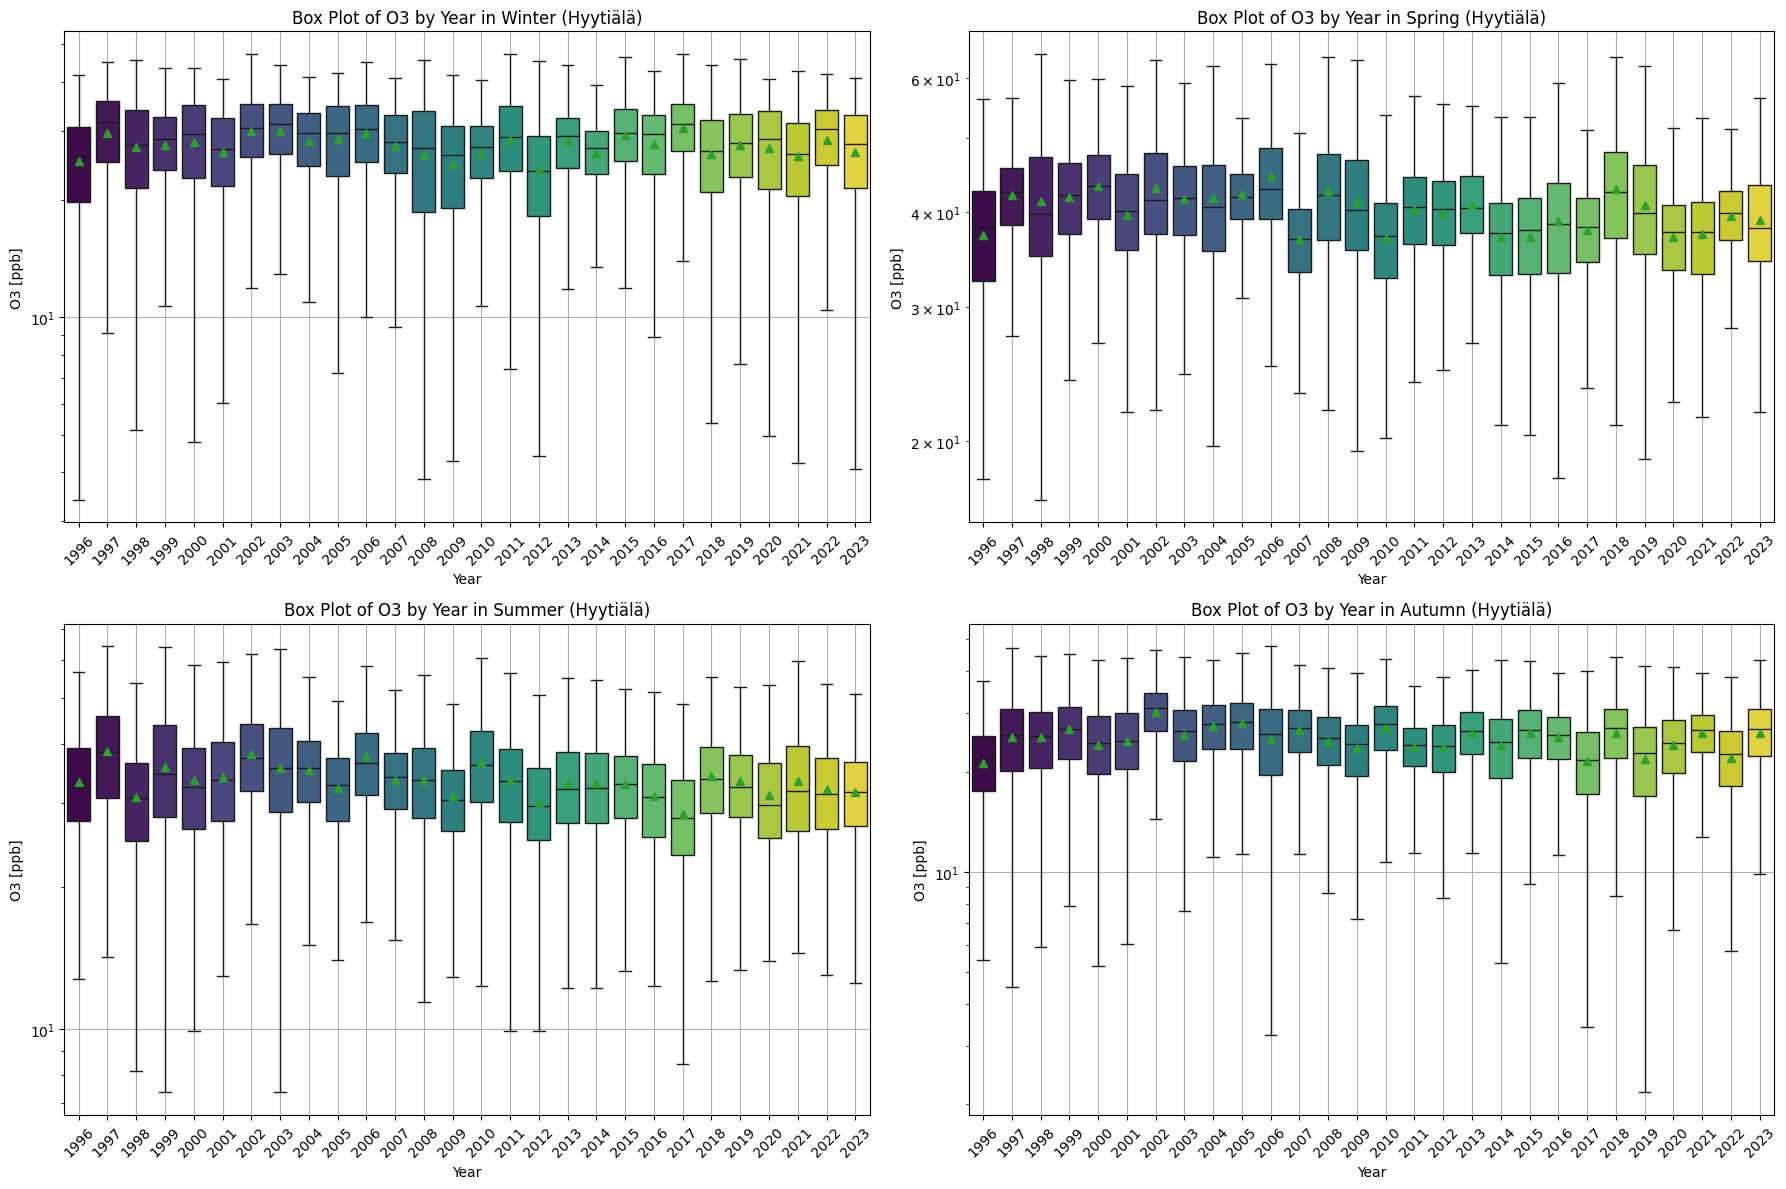

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

hyy_winter['Year'] = hyy_winter.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
ax[0, 0].set_title('Box Plot of O3 by Year in Winter (Hyytiälä)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('O3 [ppb]')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0, 0].grid(True)
ax[0, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_spring.reset_index(), ax=ax[0, 1], showmeans=True, showfliers=False, palette=colors)
ax[0, 1].set_title('Box Plot of O3 by Year in Spring (Hyytiälä)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('O3 [ppb]')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].grid(True)
ax[0, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_summer.reset_index(), ax=ax[1, 0], showmeans=True, showfliers=False, palette=colors)
ax[1, 0].set_title('Box Plot of O3 by Year in Summer (Hyytiälä)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('O3 [ppb]')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].grid(True)
ax[1, 0].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_autumn.reset_index(), ax=ax[1, 1], showmeans=True, showfliers=False, palette=colors)
ax[1, 1].set_title('Box Plot of O3 by Year in Autumn (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('O3 [ppb]')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].grid(True)
ax[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2546783784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2546783784.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2546783784.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a lis

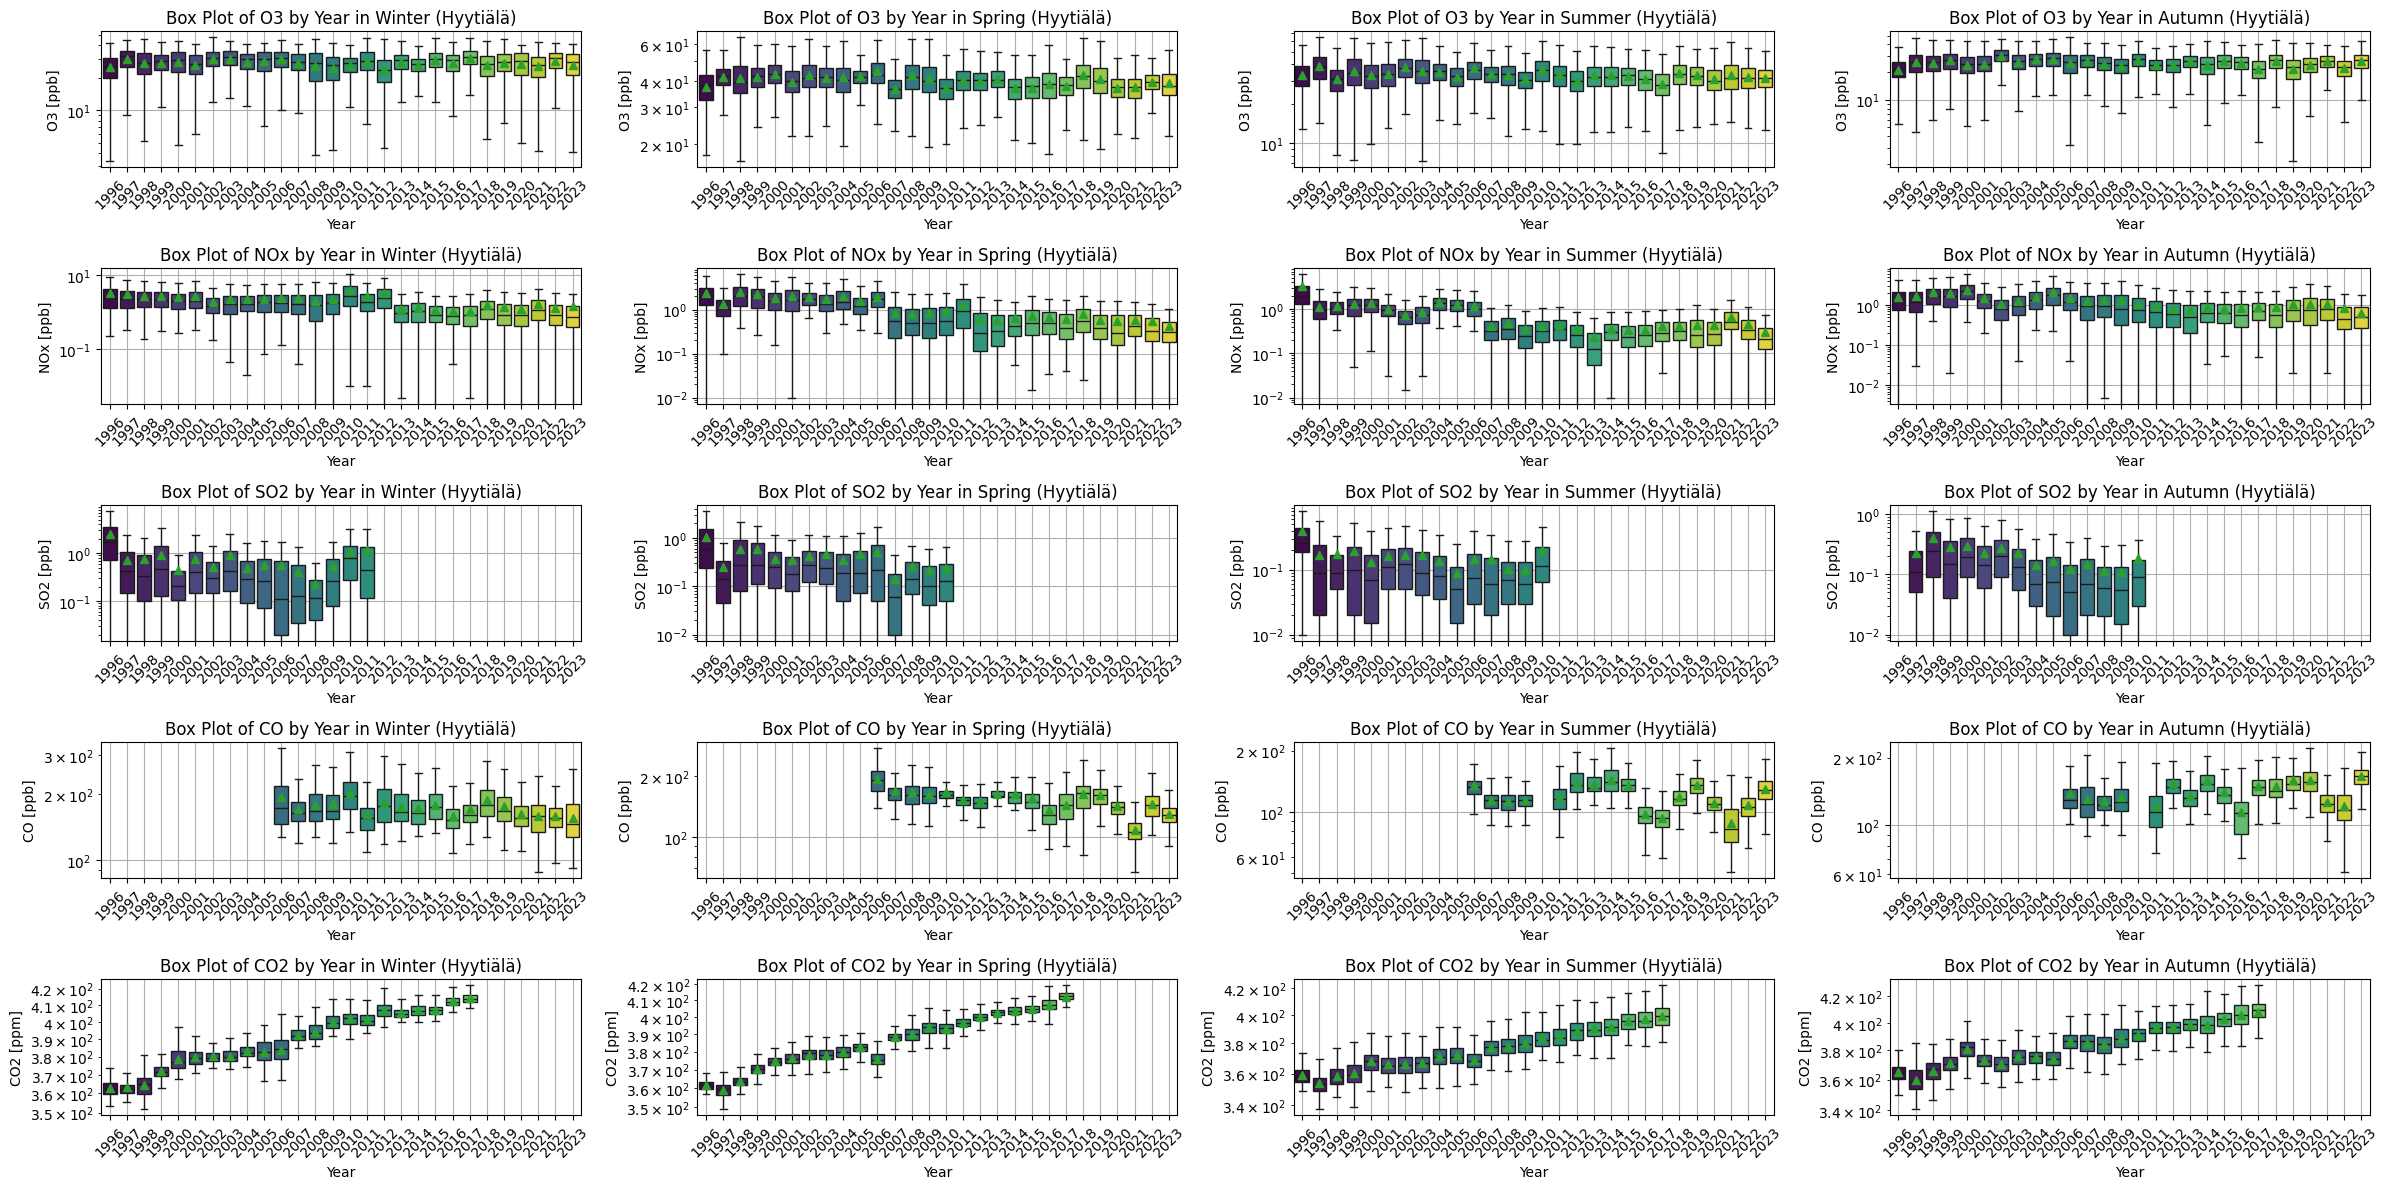

In [15]:
fig, ax = plt.subplots(5, 4, figsize=(24, 12))

# O3 plots
hyy_winter['Year'] = hyy_winter.index.year
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
ax[0, 0].set_title('Box Plot of O3 by Year in Winter (Hyytiälä)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('O3 [ppb]')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0, 0].grid(True)
ax[0, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_spring.reset_index(), ax=ax[0, 1], showmeans=True, showfliers=False, palette=colors)
ax[0, 1].set_title('Box Plot of O3 by Year in Spring (Hyytiälä)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('O3 [ppb]')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].grid(True)
ax[0, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_summer.reset_index(), ax=ax[0, 2], showmeans=True, showfliers=False, palette=colors)
ax[0, 2].set_title('Box Plot of O3 by Year in Summer (Hyytiälä)')
ax[0, 2].set_xlabel('Year')
ax[0, 2].set_ylabel('O3 [ppb]')
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45)
ax[0, 2].grid(True)
ax[0, 2].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.O3672', data=hyy_autumn.reset_index(), ax=ax[0, 3], showmeans=True, showfliers=False, palette=colors)
ax[0, 3].set_title('Box Plot of O3 by Year in Autumn (Hyytiälä)')
ax[0, 3].set_xlabel('Year')
ax[0, 3].set_ylabel('O3 [ppb]')
ax[0, 3].set_xticklabels(ax[0, 3].get_xticklabels(), rotation=45)
ax[0, 3].grid(True)
ax[0, 3].set_yscale('log')

# NOx plots
hyy_winter['Year'] = hyy_winter.index.year
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_winter.reset_index(), ax=ax[1, 0], showmeans=True, showfliers=False, palette=colors)
ax[1, 0].set_title('Box Plot of NOx by Year in Winter (Hyytiälä)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('NOx [ppb]')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].grid(True)
ax[1, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_spring.reset_index(), ax=ax[1, 1], showmeans=True, showfliers=False, palette=colors)
ax[1, 1].set_title('Box Plot of NOx by Year in Spring (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('NOx [ppb]')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].grid(True)
ax[1, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_summer.reset_index(), ax=ax[1, 2], showmeans=True, showfliers=False, palette=colors)
ax[1, 2].set_title('Box Plot of NOx by Year in Summer (Hyytiälä)')
ax[1, 2].set_xlabel('Year')
ax[1, 2].set_ylabel('NOx [ppb]')
ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=45)
ax[1, 2].grid(True)
ax[1, 2].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_autumn.reset_index(), ax=ax[1, 3], showmeans=True, showfliers=False, palette=colors)
ax[1, 3].set_title('Box Plot of NOx by Year in Autumn (Hyytiälä)')
ax[1, 3].set_xlabel('Year')
ax[1, 3].set_ylabel('NOx [ppb]')
ax[1, 3].set_xticklabels(ax[1, 3].get_xticklabels(), rotation=45)
ax[1, 3].grid(True)
ax[1, 3].set_yscale('log')

# SO2 plots HYY_META.SO2672
hyy_winter['Year'] = hyy_winter.index.year
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_winter.reset_index(), ax=ax[2, 0], showmeans=True, showfliers=False, palette=colors)
ax[2, 0].set_title('Box Plot of SO2 by Year in Winter (Hyytiälä)')
ax[2, 0].set_xlabel('Year')
ax[2, 0].set_ylabel('SO2 [ppb]')
ax[2, 0].set_xticklabels(ax[2, 0].get_xticklabels(), rotation=45)
ax[2, 0].grid(True)
ax[2, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_spring.reset_index(), ax=ax[2, 1], showmeans=True, showfliers=False, palette=colors)
ax[2, 1].set_title('Box Plot of SO2 by Year in Spring (Hyytiälä)')
ax[2, 1].set_xlabel('Year')
ax[2, 1].set_ylabel('SO2 [ppb]')
ax[2, 1].set_xticklabels(ax[2, 1].get_xticklabels(), rotation=45)
ax[2, 1].grid(True)
ax[2, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_summer.reset_index(), ax=ax[2, 2], showmeans=True, showfliers=False, palette=colors)
ax[2, 2].set_title('Box Plot of SO2 by Year in Summer (Hyytiälä)')
ax[2, 2].set_xlabel('Year')
ax[2, 2].set_ylabel('SO2 [ppb]')
ax[2, 2].set_xticklabels(ax[2, 2].get_xticklabels(), rotation=45)
ax[2, 2].grid(True)
ax[2, 2].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_autumn.reset_index(), ax=ax[2, 3], showmeans=True, showfliers=False, palette=colors)
ax[2, 3].set_title('Box Plot of SO2 by Year in Autumn (Hyytiälä)')
ax[2, 3].set_xlabel('Year')
ax[2, 3].set_ylabel('SO2 [ppb]')
ax[2, 3].set_xticklabels(ax[2, 3].get_xticklabels(), rotation=45)
ax[2, 3].grid(True)
ax[2, 3].set_yscale('log')

# CO plots HYY_META.CO672
hyy_winter['Year'] = hyy_winter.index.year
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_winter.reset_index(), ax=ax[3, 0], showmeans=True, showfliers=False, palette=colors)
ax[3, 0].set_title('Box Plot of CO by Year in Winter (Hyytiälä)')
ax[3, 0].set_xlabel('Year')
ax[3, 0].set_ylabel('CO [ppb]')
ax[3, 0].set_xticklabels(ax[3, 0].get_xticklabels(), rotation=45)
ax[3, 0].grid(True)
ax[3, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_spring.reset_index(), ax=ax[3, 1], showmeans=True, showfliers=False, palette=colors)
ax[3, 1].set_title('Box Plot of CO by Year in Spring (Hyytiälä)')
ax[3, 1].set_xlabel('Year')
ax[3, 1].set_ylabel('CO [ppb]')
ax[3, 1].set_xticklabels(ax[3, 1].get_xticklabels(), rotation=45)
ax[3, 1].grid(True)
ax[3, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_summer.reset_index(), ax=ax[3, 2], showmeans=True, showfliers=False, palette=colors)
ax[3, 2].set_title('Box Plot of CO by Year in Summer (Hyytiälä)')
ax[3, 2].set_xlabel('Year')
ax[3, 2].set_ylabel('CO [ppb]')
ax[3, 2].set_xticklabels(ax[3, 2].get_xticklabels(), rotation=45)
ax[3, 2].grid(True)
ax[3, 2].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_autumn.reset_index(), ax=ax[3, 3], showmeans=True, showfliers=False, palette=colors)
ax[3, 3].set_title('Box Plot of CO by Year in Autumn (Hyytiälä)')
ax[3, 3].set_xlabel('Year')
ax[3, 3].set_ylabel('CO [ppb]')
ax[3, 3].set_xticklabels(ax[3, 3].get_xticklabels(), rotation=45)
ax[3, 3].grid(True)
ax[3, 3].set_yscale('log')


# CO2 plots  HYY_META.CO2672
hyy_winter['Year'] = hyy_winter.index.year
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_winter.reset_index(), ax=ax[4, 0], showmeans=True, showfliers=False, palette=colors)
ax[4, 0].set_title('Box Plot of CO2 by Year in Winter (Hyytiälä)')
ax[4, 0].set_xlabel('Year')
ax[4, 0].set_ylabel('CO2 [ppm]')
ax[4, 0].set_xticklabels(ax[4, 0].get_xticklabels(), rotation=45)
ax[4, 0].grid(True)
ax[4, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_spring.reset_index(), ax=ax[4, 1], showmeans=True, showfliers=False, palette=colors)
ax[4, 1].set_title('Box Plot of CO2 by Year in Spring (Hyytiälä)')
ax[4, 1].set_xlabel('Year')
ax[4, 1].set_ylabel('CO2 [ppm]')
ax[4, 1].set_xticklabels(ax[4, 1].get_xticklabels(), rotation=45)
ax[4, 1].grid(True)
ax[4, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_summer.reset_index(), ax=ax[4, 2], showmeans=True, showfliers=False, palette=colors)
ax[4, 2].set_title('Box Plot of CO2 by Year in Summer (Hyytiälä)')
ax[4, 2].set_xlabel('Year')
ax[4, 2].set_ylabel('CO2 [ppm]')
ax[4, 2].set_xticklabels(ax[4, 2].get_xticklabels(), rotation=45)
ax[4, 2].grid(True)
ax[4, 2].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_autumn.reset_index(), ax=ax[4, 3], showmeans=True, showfliers=False, palette=colors)
ax[4, 3].set_title('Box Plot of CO2 by Year in Autumn (Hyytiälä)')
ax[4, 3].set_xlabel('Year')
ax[4, 3].set_ylabel('CO2 [ppm]')
ax[4, 3].set_xticklabels(ax[4, 3].get_xticklabels(), rotation=45)
ax[4, 3].grid(True)
ax[4, 3].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2007129485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2007129485.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2007129485.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a li

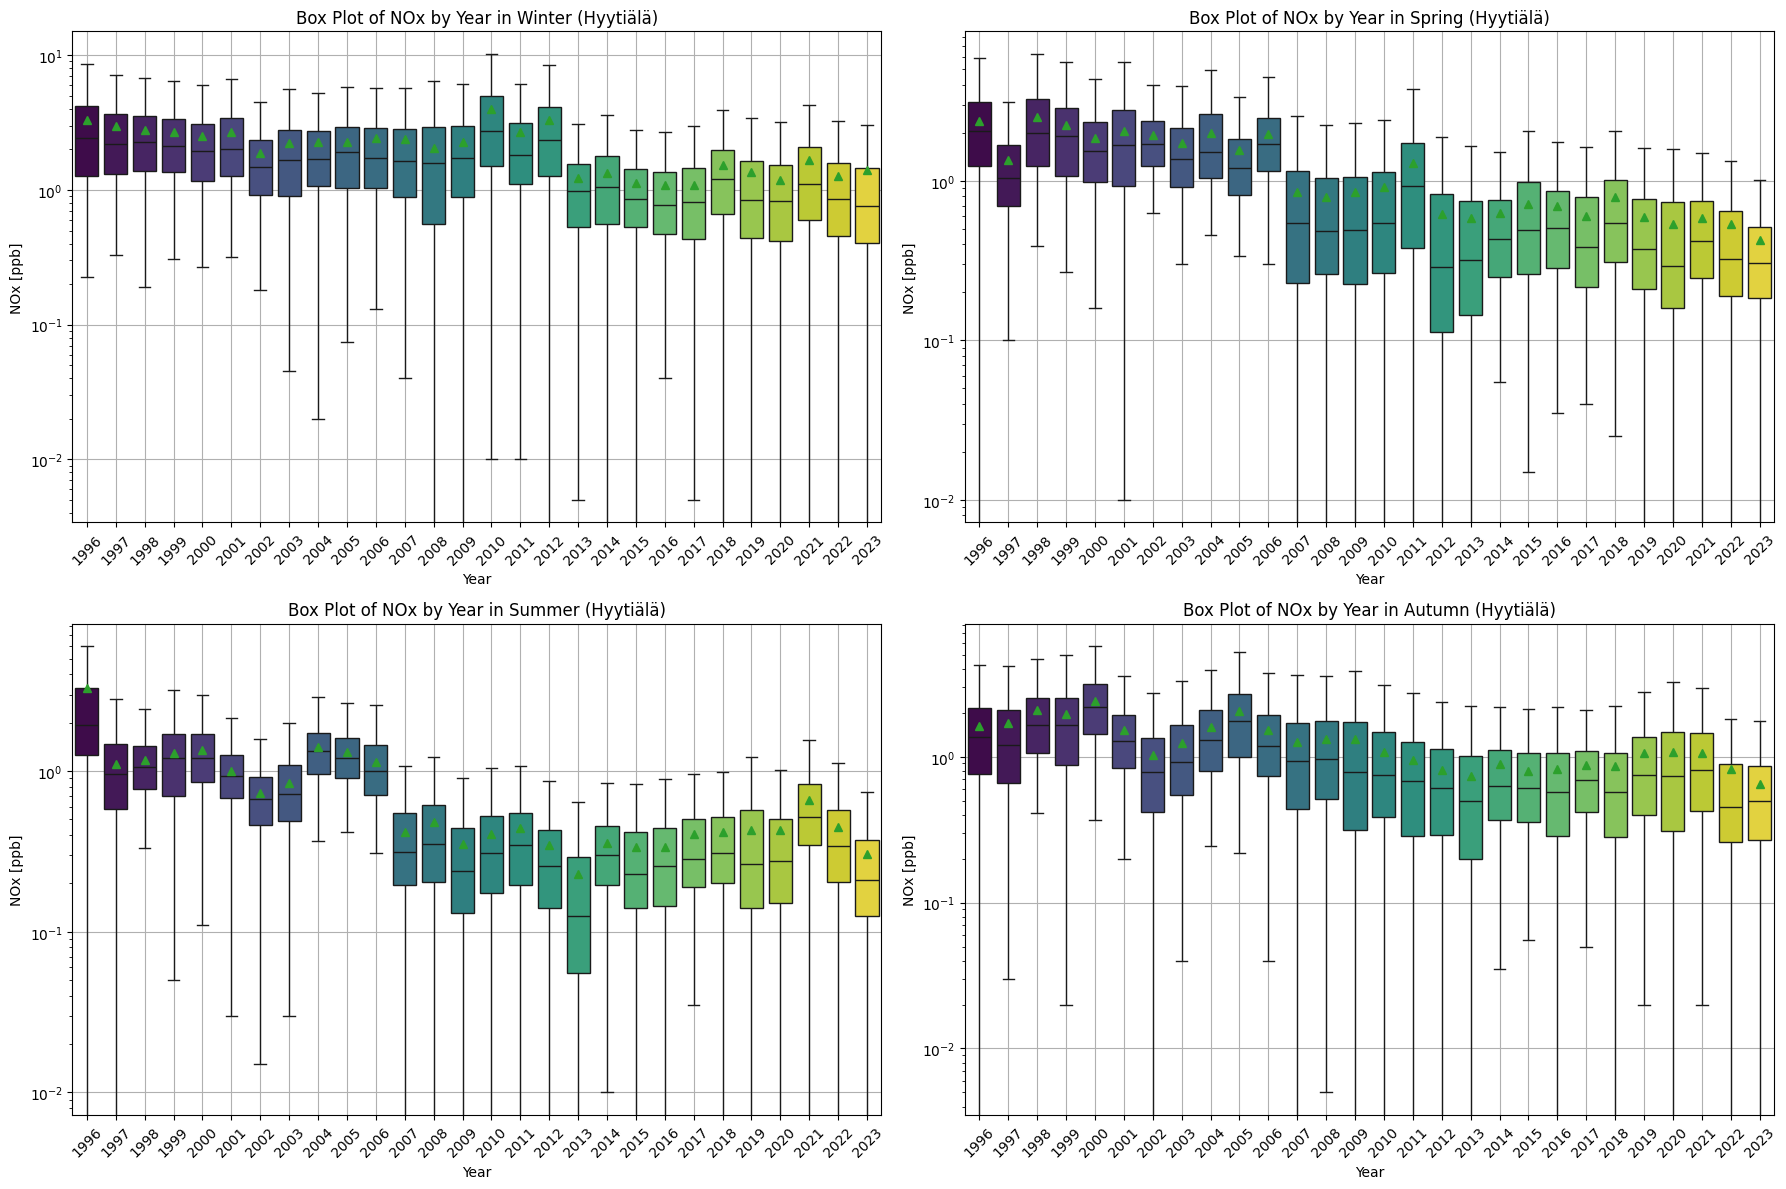

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

hyy_winter['Year'] = hyy_winter.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
ax[0, 0].set_title('Box Plot of NOx by Year in Winter (Hyytiälä)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('NOx [ppb]')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0, 0].grid(True)
ax[0, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_spring.reset_index(), ax=ax[0, 1], showmeans=True, showfliers=False, palette=colors)
ax[0, 1].set_title('Box Plot of NOx by Year in Spring (Hyytiälä)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('NOx [ppb]')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].grid(True)
ax[0, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_summer.reset_index(), ax=ax[1, 0], showmeans=True, showfliers=False, palette=colors)
ax[1, 0].set_title('Box Plot of NOx by Year in Summer (Hyytiälä)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('NOx [ppb]')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].grid(True)
ax[1, 0].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.NOx672', data=hyy_autumn.reset_index(), ax=ax[1, 1], showmeans=True, showfliers=False, palette=colors)
ax[1, 1].set_title('Box Plot of NOx by Year in Autumn (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('NOx [ppb]')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].grid(True)
ax[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2711109936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2711109936.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2711109936.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a li

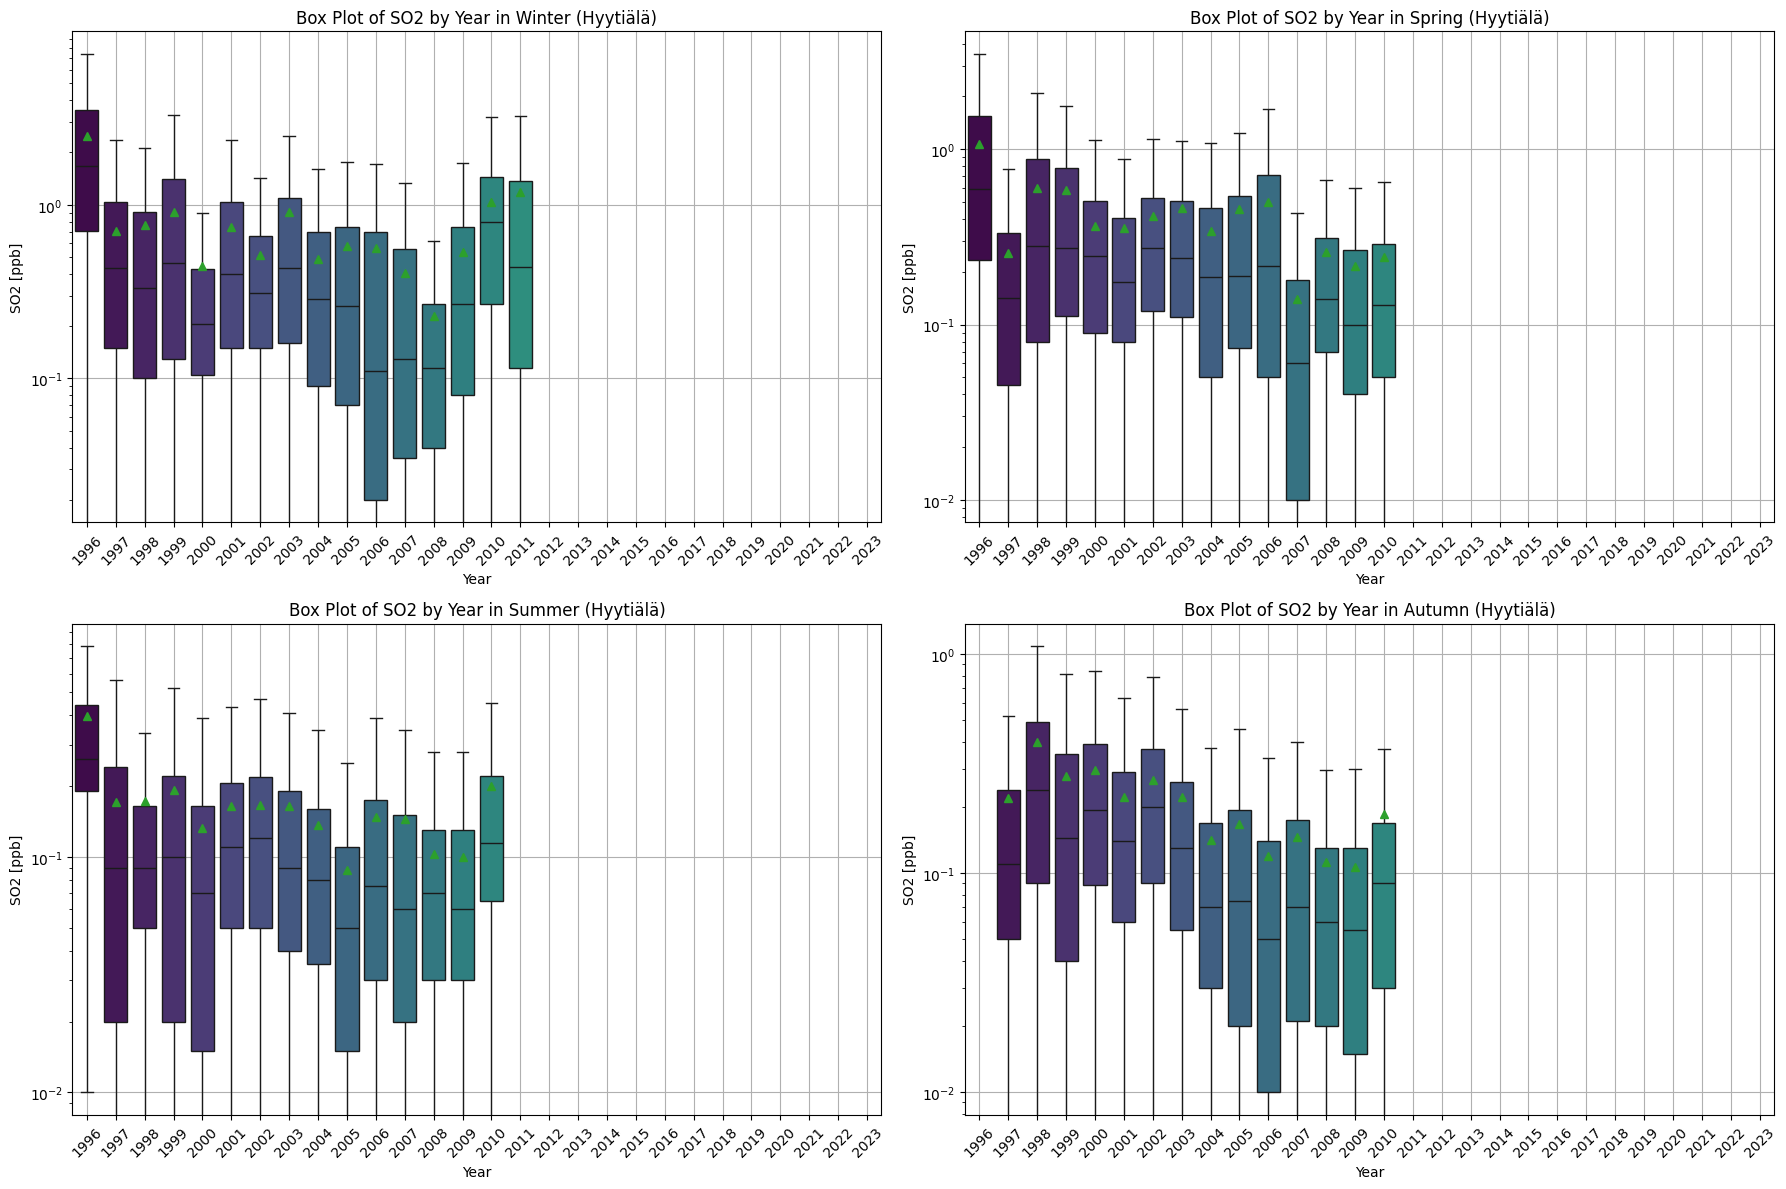

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

hyy_winter['Year'] = hyy_winter.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
ax[0, 0].set_title('Box Plot of SO2 by Year in Winter (Hyytiälä)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('SO2 [ppb]')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0, 0].grid(True)
ax[0, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_spring.reset_index(), ax=ax[0, 1], showmeans=True, showfliers=False, palette=colors)
ax[0, 1].set_title('Box Plot of SO2 by Year in Spring (Hyytiälä)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('SO2 [ppb]')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].grid(True)
ax[0, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_summer.reset_index(), ax=ax[1, 0], showmeans=True, showfliers=False, palette=colors)
ax[1, 0].set_title('Box Plot of SO2 by Year in Summer (Hyytiälä)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('SO2 [ppb]')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].grid(True)
ax[1, 0].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.SO2672', data=hyy_autumn.reset_index(), ax=ax[1, 1], showmeans=True, showfliers=False, palette=colors)
ax[1, 1].set_title('Box Plot of SO2 by Year in Autumn (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('SO2 [ppb]')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].grid(True)
ax[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1486232304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1486232304.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1486232304.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a lis

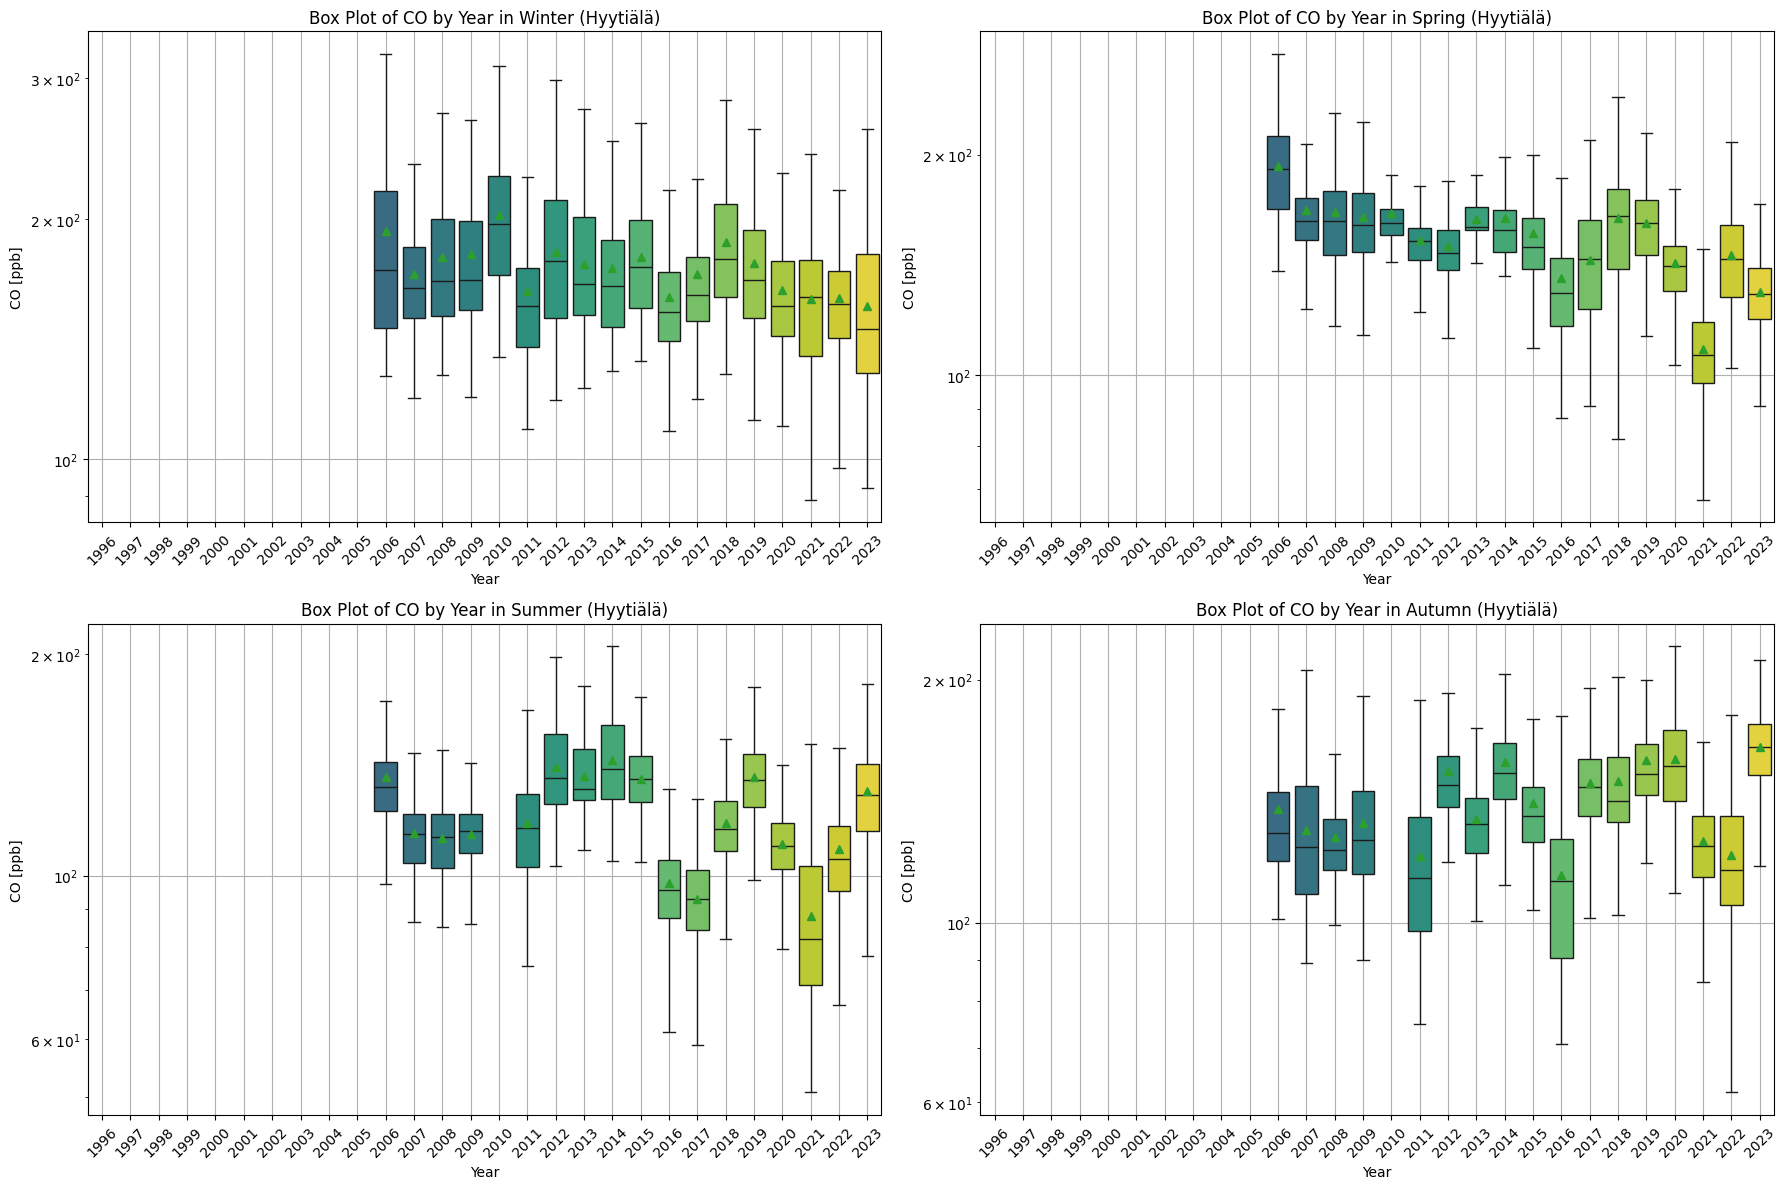

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

hyy_winter['Year'] = hyy_winter.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
ax[0, 0].set_title('Box Plot of CO by Year in Winter (Hyytiälä)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('CO [ppb]')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0, 0].grid(True)
ax[0, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_spring.reset_index(), ax=ax[0, 1], showmeans=True, showfliers=False, palette=colors)
ax[0, 1].set_title('Box Plot of CO by Year in Spring (Hyytiälä)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('CO [ppb]')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].grid(True)
ax[0, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_summer.reset_index(), ax=ax[1, 0], showmeans=True, showfliers=False, palette=colors)
ax[1, 0].set_title('Box Plot of CO by Year in Summer (Hyytiälä)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('CO [ppb]')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].grid(True)
ax[1, 0].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO672', data=hyy_autumn.reset_index(), ax=ax[1, 1], showmeans=True, showfliers=False, palette=colors)
ax[1, 1].set_title('Box Plot of CO by Year in Autumn (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('CO [ppb]')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].grid(True)
ax[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/4136048953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/4136048953.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/4136048953.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a li

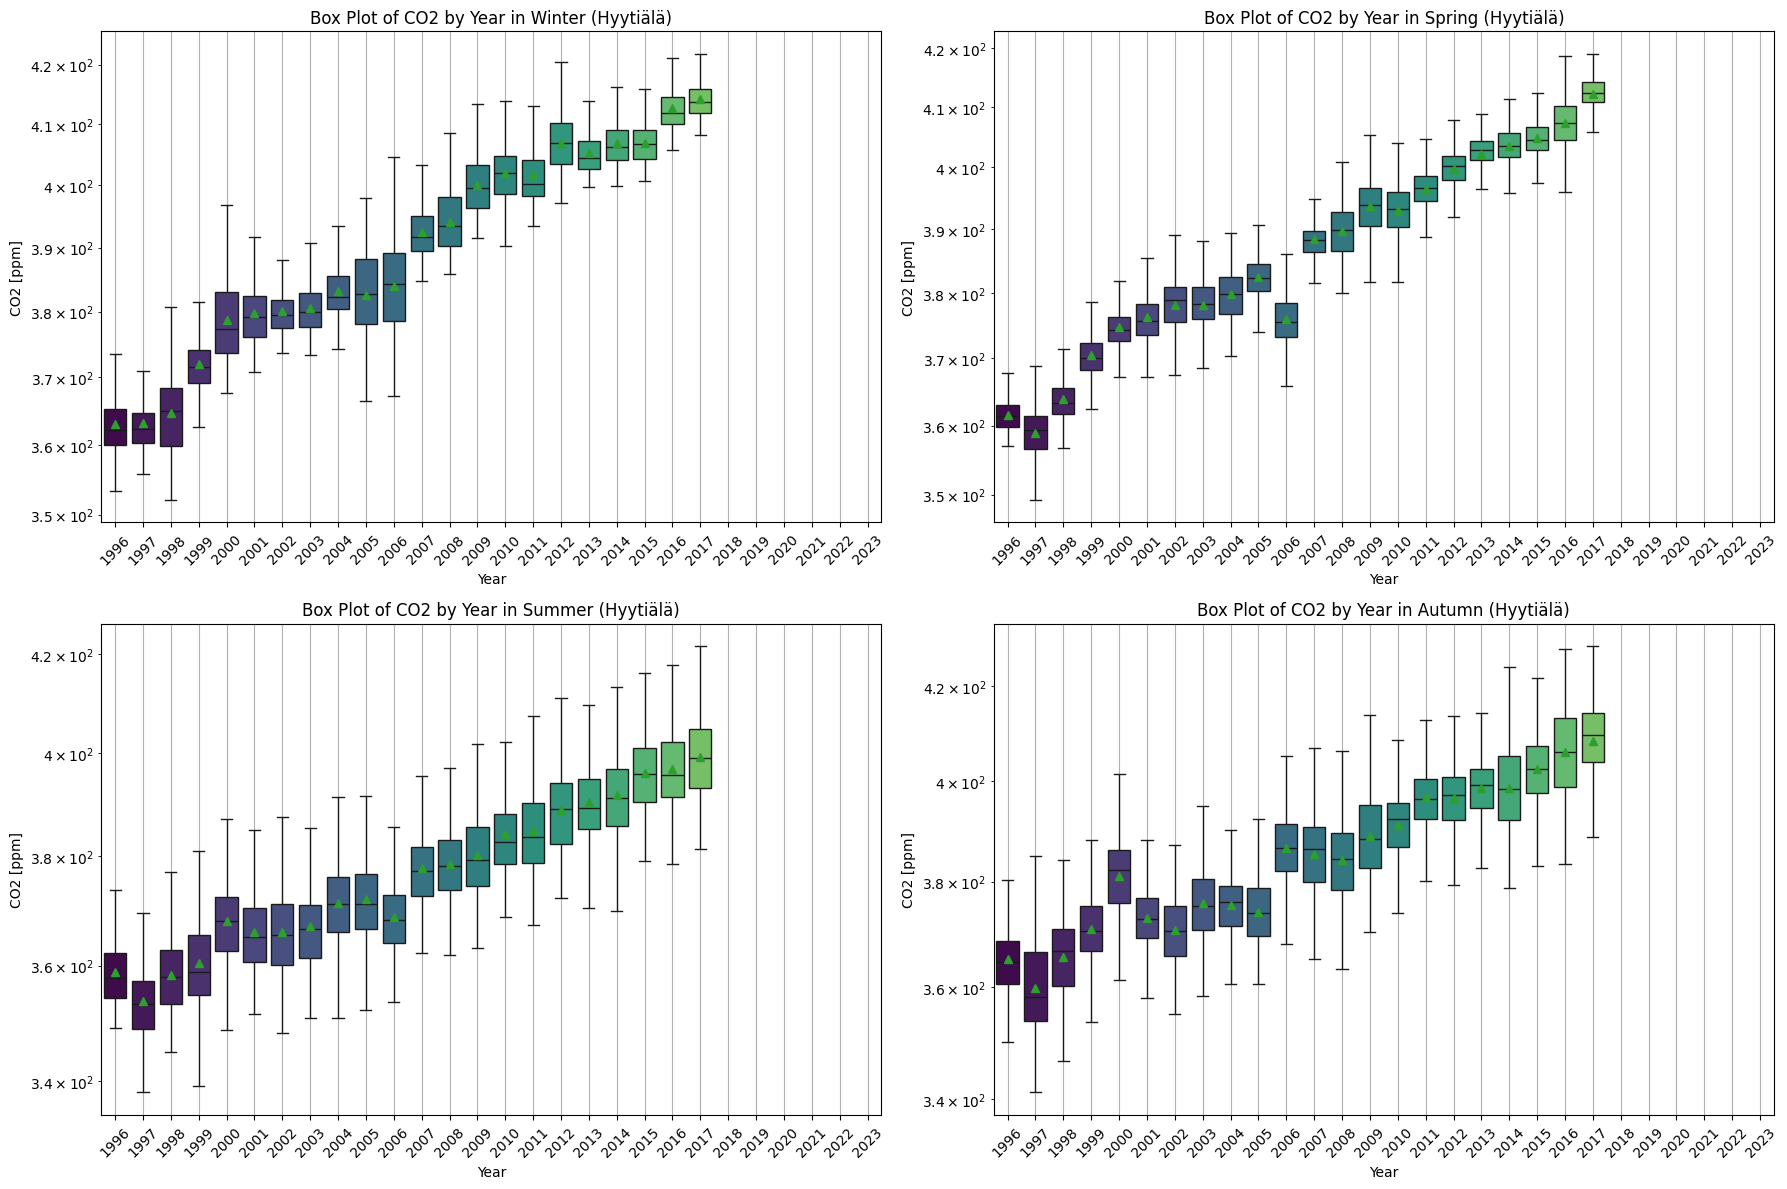

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

hyy_winter['Year'] = hyy_winter.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_winter['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
ax[0, 0].set_title('Box Plot of CO2 by Year in Winter (Hyytiälä)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('CO2 [ppm]')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0, 0].grid(True)
ax[0, 0].set_yscale('log')

hyy_spring['Year'] = hyy_spring.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_spring['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_spring.reset_index(), ax=ax[0, 1], showmeans=True, showfliers=False, palette=colors)
ax[0, 1].set_title('Box Plot of CO2 by Year in Spring (Hyytiälä)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('CO2 [ppm]')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].grid(True)
ax[0, 1].set_yscale('log')

hyy_summer['Year'] = hyy_summer.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_summer['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_summer.reset_index(), ax=ax[1, 0], showmeans=True, showfliers=False, palette=colors)
ax[1, 0].set_title('Box Plot of CO2 by Year in Summer (Hyytiälä)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('CO2 [ppm]')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].grid(True)
ax[1, 0].set_yscale('log')

hyy_autumn['Year'] = hyy_autumn.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(hyy_autumn['Year'].unique())))
sns.boxplot(x='Year', y='HYY_META.CO2672', data=hyy_autumn.reset_index(), ax=ax[1, 1], showmeans=True, showfliers=False, palette=colors)
ax[1, 1].set_title('Box Plot of CO2 by Year in Autumn (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('CO2 [ppm]')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].grid(True)
ax[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

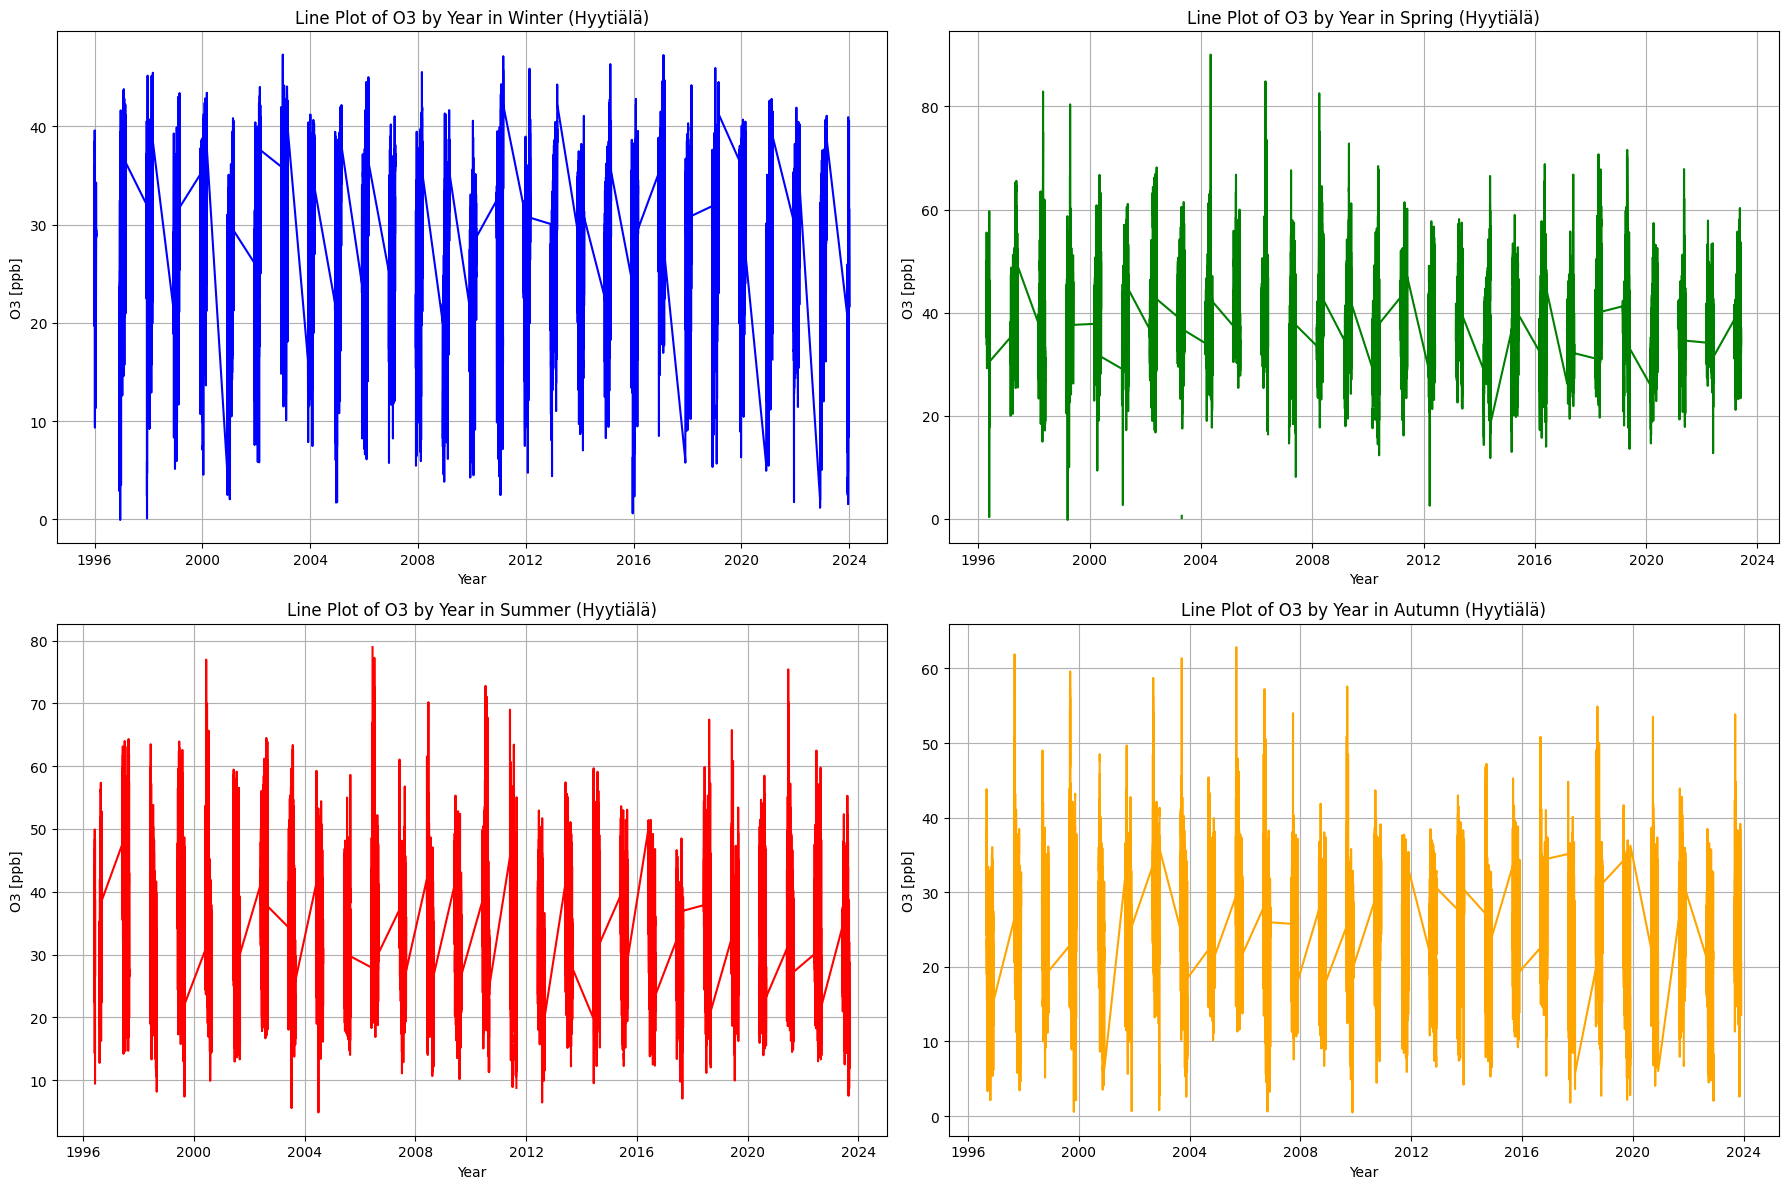

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot for Winter
ax[0, 0].plot(hyy_winter.index, hyy_winter['HYY_META.O3672'], label='Winter', color='blue')
ax[0, 0].set_title('Line Plot of O3 by Year in Winter (Hyytiälä)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('O3 [ppb]')
ax[0, 0].grid(True)

# Plot for Spring
ax[0, 1].plot(hyy_spring.index, hyy_spring['HYY_META.O3672'], label='Spring', color='green')
ax[0, 1].set_title('Line Plot of O3 by Year in Spring (Hyytiälä)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('O3 [ppb]')
ax[0, 1].grid(True)

# Plot for Summer
ax[1, 0].plot(hyy_summer.index, hyy_summer['HYY_META.O3672'], label='Summer', color='red')
ax[1, 0].set_title('Line Plot of O3 by Year in Summer (Hyytiälä)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('O3 [ppb]')
ax[1, 0].grid(True)

# Plot for Autumn
ax[1, 1].plot(hyy_autumn.index, hyy_autumn['HYY_META.O3672'], label='Autumn', color='orange')
ax[1, 1].set_title('Line Plot of O3 by Year in Autumn (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('O3 [ppb]')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/655589265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Hour'] = hyy_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/655589265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_spring['Hour'] = hyy_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/655589265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

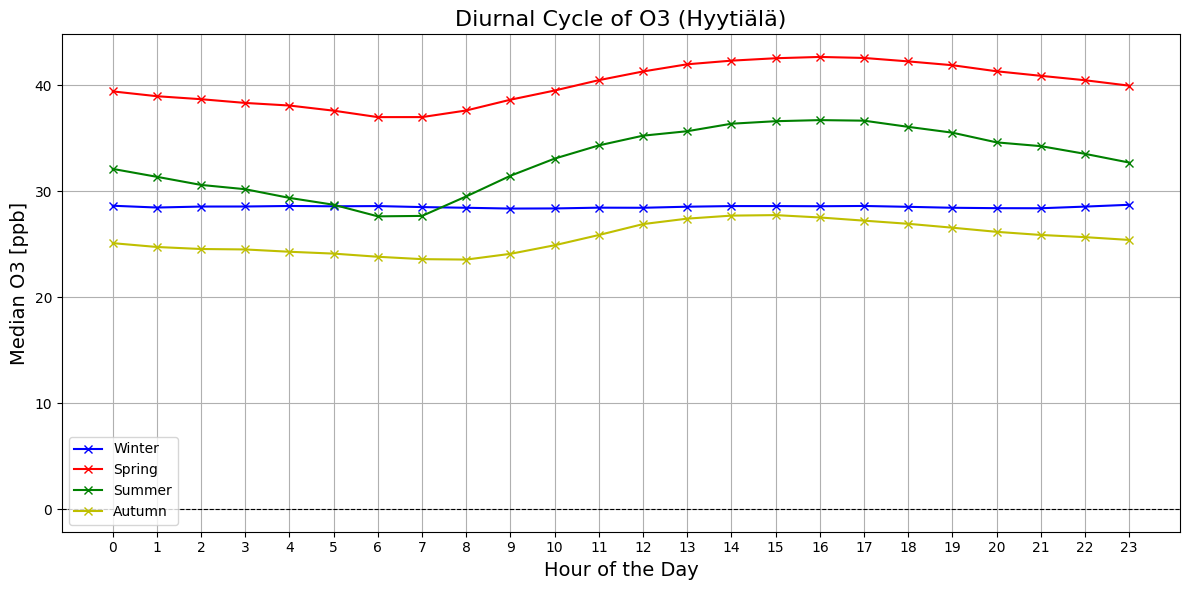

In [21]:
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

# print(diurnal_spring)
O_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.O3672'].median()
O_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.O3672'].median()
O_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.O3672'].median()
O_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.O3672'].median()

plt.figure(figsize=(12, 6))

plt.plot(O_diurnal_hyy_winter.index, O_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
plt.plot(O_diurnal_hyy_spring.index, O_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
plt.plot(O_diurnal_hyy_summer.index, O_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
plt.plot(O_diurnal_hyy_autumn.index, O_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of O3 (Hyytiälä)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median O3 [ppb]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
plt.tight_layout()

plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/642423688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Hour'] = hyy_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/642423688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_spring['Hour'] = hyy_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/642423688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

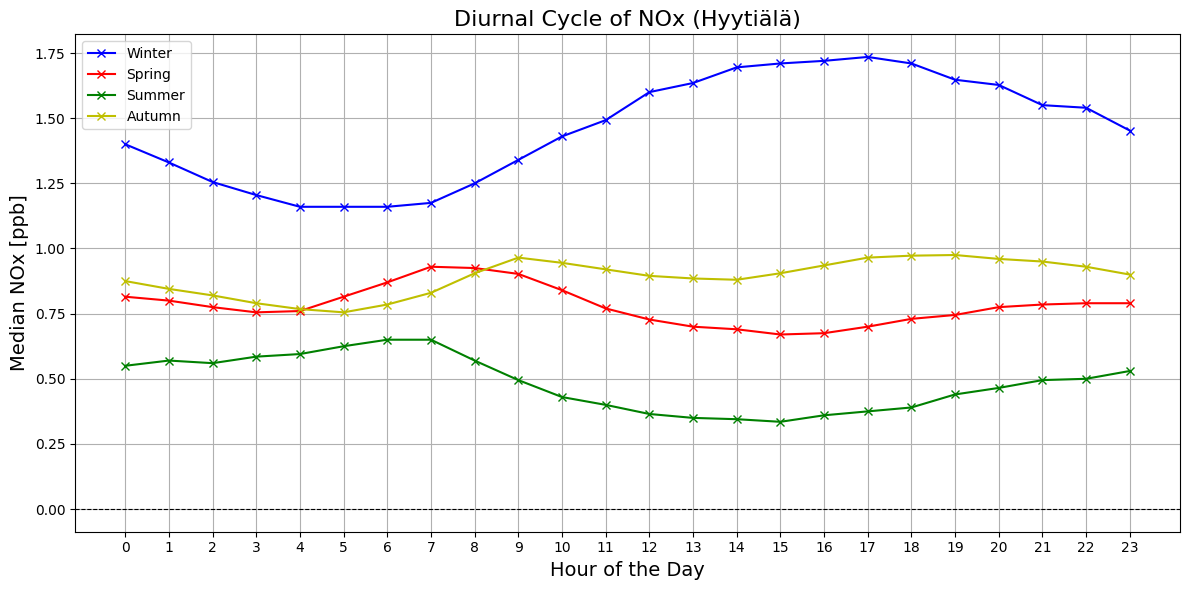

In [22]:
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

NO_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.NOx672'].median()
NO_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.NOx672'].median()
NO_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.NOx672'].median()
NO_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.NOx672'].median()

plt.figure(figsize=(12, 6))

plt.plot(NO_diurnal_hyy_winter.index, NO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
plt.plot(NO_diurnal_hyy_spring.index, NO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
plt.plot(NO_diurnal_hyy_summer.index, NO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
plt.plot(NO_diurnal_hyy_autumn.index, NO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of NOx (Hyytiälä)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median NOx [ppb]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
plt.tight_layout()

plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3088750625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Hour'] = hyy_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3088750625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_spring['Hour'] = hyy_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3088750625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

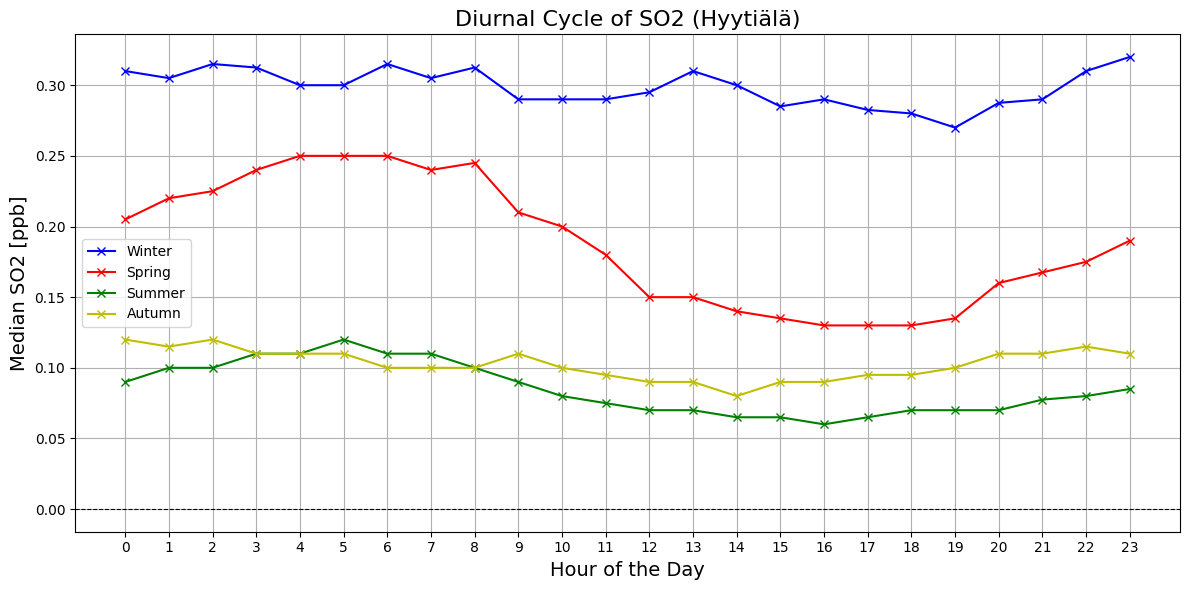

In [23]:
# HYY_META.NOx672	HYY_META.SO2672	HYY_META.CO672	HYY_META.CO2672
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

SO_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.SO2672'].median()
SO_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.SO2672'].median()
SO_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.SO2672'].median()
SO_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.SO2672'].median()

plt.figure(figsize=(12, 6))

plt.plot(SO_diurnal_hyy_winter.index, SO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
plt.plot(SO_diurnal_hyy_spring.index, SO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
plt.plot(SO_diurnal_hyy_summer.index, SO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
plt.plot(SO_diurnal_hyy_autumn.index, SO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of SO2 (Hyytiälä)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median SO2 [ppb]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
plt.tight_layout()

plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/932937662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Hour'] = hyy_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/932937662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_spring['Hour'] = hyy_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/932937662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

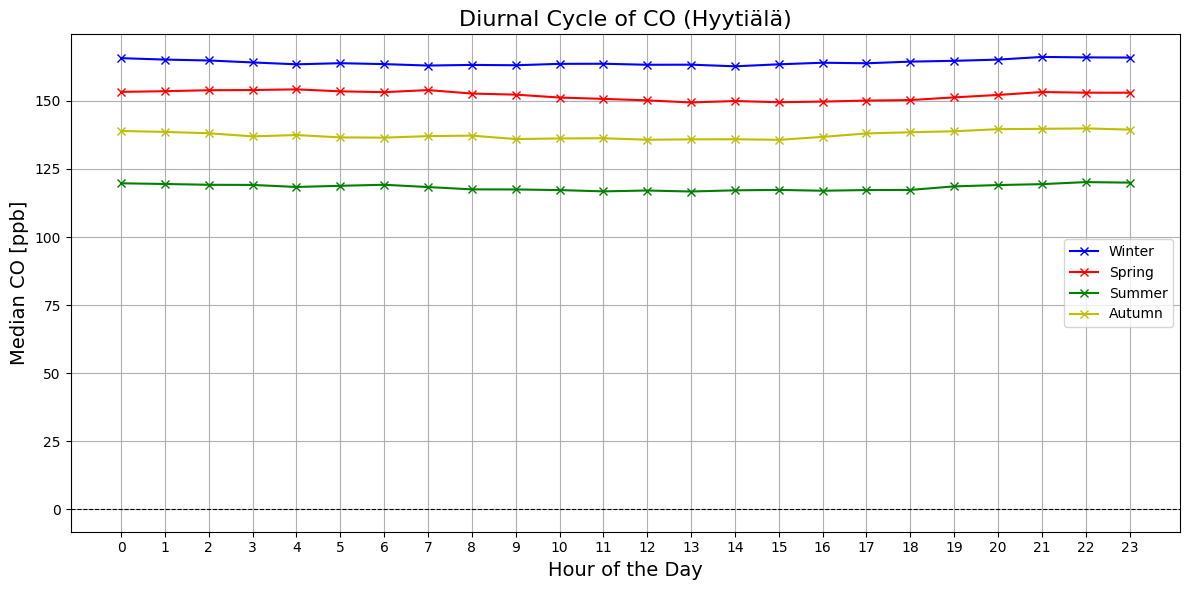

In [24]:
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

# print(diurnal_spring)
CO_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.CO672'].median()
CO_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.CO672'].median()
CO_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.CO672'].median()
CO_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.CO672'].median()

plt.figure(figsize=(12, 6))

plt.plot(CO_diurnal_hyy_winter.index, CO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
plt.plot(CO_diurnal_hyy_spring.index, CO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
plt.plot(CO_diurnal_hyy_summer.index, CO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
plt.plot(CO_diurnal_hyy_autumn.index, CO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of CO (Hyytiälä)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median CO [ppb]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
plt.tight_layout()

plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/224419891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Hour'] = hyy_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/224419891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_spring['Hour'] = hyy_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/224419891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

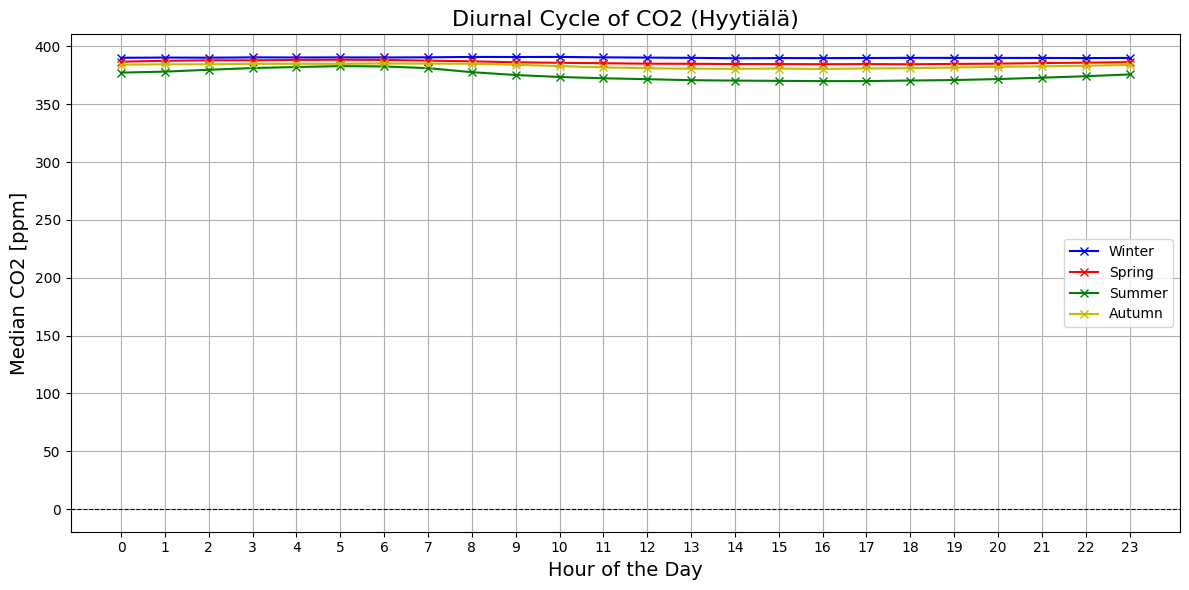

In [25]:
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

# print(diurnal_spring)
CO2_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.CO2672'].median()
CO2_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.CO2672'].median()
CO2_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.CO2672'].median()
CO2_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.CO2672'].median()

plt.figure(figsize=(12, 6))

plt.plot(CO2_diurnal_hyy_winter.index, CO2_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
plt.plot(CO2_diurnal_hyy_spring.index, CO2_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
plt.plot(CO2_diurnal_hyy_summer.index, CO2_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
plt.plot(CO2_diurnal_hyy_autumn.index, CO2_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of CO2 (Hyytiälä)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median CO2 [ppm]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
plt.tight_layout()

plt.show()

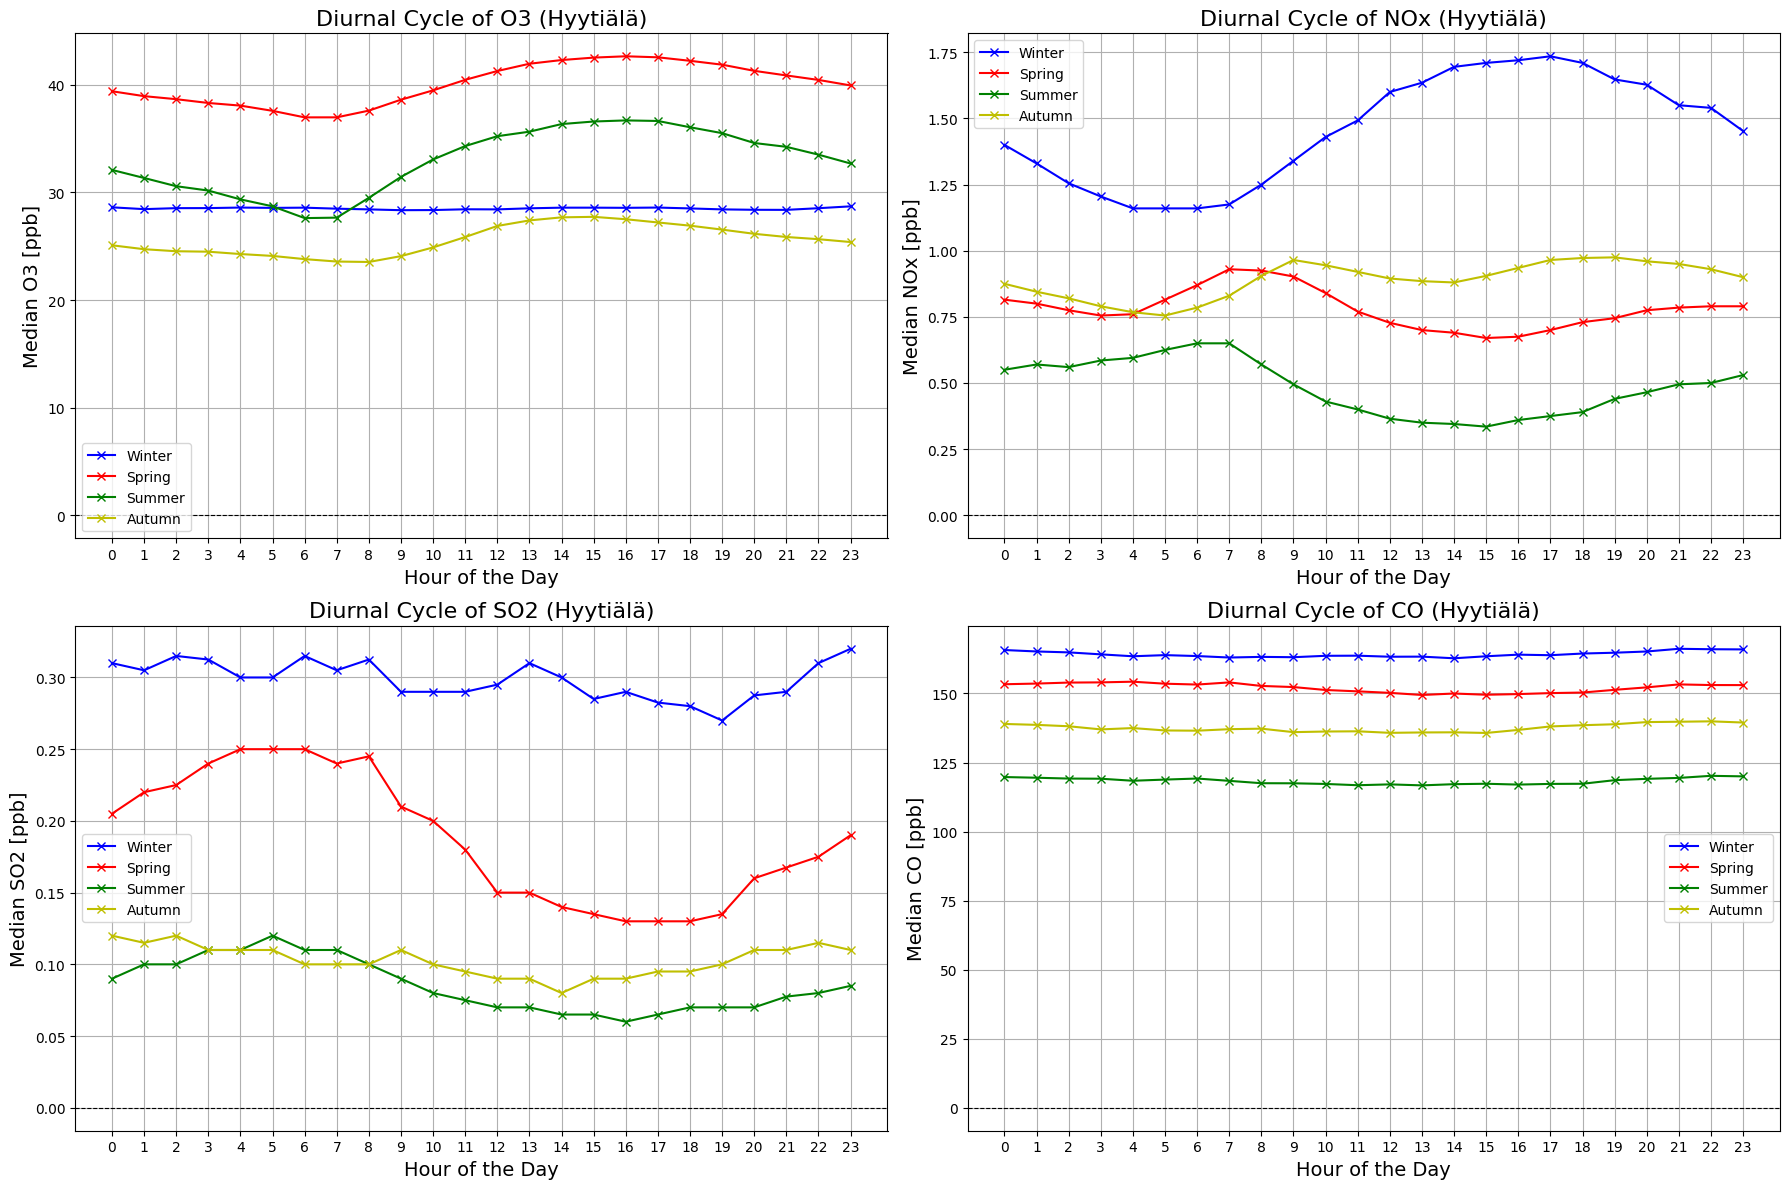

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot for O3
ax1.plot(O_diurnal_hyy_winter.index, O_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax1.plot(O_diurnal_hyy_spring.index, O_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax1.plot(O_diurnal_hyy_summer.index, O_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax1.plot(O_diurnal_hyy_autumn.index, O_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')
ax1.set_title('Diurnal Cycle of O3 (Hyytiälä)', fontsize=16)
ax1.set_xlabel('Hour of the Day', fontsize=14)
ax1.set_ylabel('Median O3 [ppb]', fontsize=14)
ax1.set_xticks(range(0, 24))
ax1.grid(True)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.legend()

# Plot for NOx
ax2.plot(NO_diurnal_hyy_winter.index, NO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax2.plot(NO_diurnal_hyy_spring.index, NO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax2.plot(NO_diurnal_hyy_summer.index, NO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax2.plot(NO_diurnal_hyy_autumn.index, NO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')
ax2.set_title('Diurnal Cycle of NOx (Hyytiälä)', fontsize=16)
ax2.set_xlabel('Hour of the Day', fontsize=14)
ax2.set_ylabel('Median NOx [ppb]', fontsize=14)
ax2.set_xticks(range(0, 24))
ax2.grid(True)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.legend()

# Plot for SO2
ax3.plot(SO_diurnal_hyy_winter.index, SO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax3.plot(SO_diurnal_hyy_spring.index, SO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax3.plot(SO_diurnal_hyy_summer.index, SO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax3.plot(SO_diurnal_hyy_autumn.index, SO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')
ax3.set_title('Diurnal Cycle of SO2 (Hyytiälä)', fontsize=16)
ax3.set_xlabel('Hour of the Day', fontsize=14)
ax3.set_ylabel('Median SO2 [ppb]', fontsize=14)
ax3.set_xticks(range(0, 24))
ax3.grid(True)
ax3.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax3.legend()

# Plot for CO
ax4.plot(CO_diurnal_hyy_winter.index, CO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax4.plot(CO_diurnal_hyy_spring.index, CO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax4.plot(CO_diurnal_hyy_summer.index, CO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax4.plot(CO_diurnal_hyy_autumn.index, CO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')
ax4.set_title('Diurnal Cycle of CO (Hyytiälä)', fontsize=16)
ax4.set_xlabel('Hour of the Day', fontsize=14)
ax4.set_ylabel('Median CO [ppb]', fontsize=14)
ax4.set_xticks(range(0, 24))
ax4.grid(True)
ax4.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax4.legend()

plt.tight_layout()
plt.show()

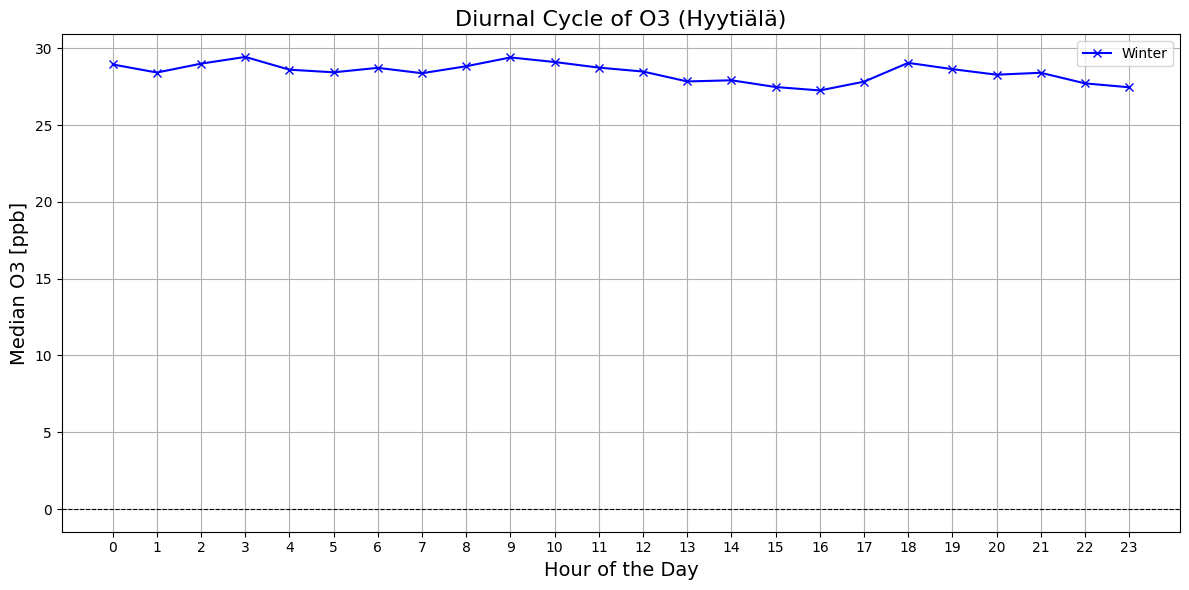

In [27]:
# Filter data for the year 2020
year = 2020
hyy_winter_1 = hyy_winter[hyy_winter.index.year == year]

# hyy_winter['Hour'] = hyy_winter.index.hour
# hyy_spring['Hour'] = hyy_spring.index.hour
# hyy_summer['Hour'] = hyy_summer.index.hour
# hyy_autumn['Hour'] = hyy_autumn.index.hour

# print(diurnal_spring)
diurnal_hyy_winter_1 = hyy_winter_1.groupby('Hour')['HYY_META.O3672'].median()
# diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.O3672'].median()
# diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.O3672'].median()
# diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.O3672'].median()

plt.figure(figsize=(12, 6))

plt.plot(diurnal_hyy_winter_1.index, diurnal_hyy_winter_1.values, marker='x', linestyle='-', color='b', label='Winter')
# plt.plot(diurnal_hyy_spring.index, diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
# plt.plot(diurnal_hyy_summer.index, diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
# plt.plot(diurnal_hyy_autumn.index, diurnal_hyy_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of O3 (Hyytiälä)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median O3 [ppb]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
plt.tight_layout()

plt.show()

# Varrio

In [28]:
from utils.data_extract import fetch_combined_data

# Use the year and will start from starting to ending time
variables = ['VAR_META.O3_1', 'VAR_META.NOX_1', 'VAR_META.SO2_1', 'VAR_META.CO_1', 'VAR_EDDY.av_c']
start_year = 1996
end_year = 2023

data_fetched_var = fetch_combined_data(variables, start_year, end_year)

In [264]:
data_fetched.to_csv('data/var_trace_minutes.csv')

In [ ]:
# def compute_daily_averages(filtered_data):
#     return filtered_data.resample('D').median()

# var_data = data_fetched

# var_data = compute_daily_averages(var_data)

In [ ]:
# var_data.to_csv('data/var_trace_data.csv')

In [ ]:
# var_df = pd.read_csv('data/var_trace_minutes.csv')

In [29]:
data_fetched_var

VAR_META.O3_1  VAR_META.NOX_1  VAR_META.SO2_1  \
time                                                                 
1996-01-01 00:00:00            NaN             NaN             NaN   
1996-01-01 00:01:00            NaN             NaN             NaN   
1996-01-01 00:02:00            NaN             NaN             NaN   
1996-01-01 00:03:00            NaN             NaN             NaN   
1996-01-01 00:04:00            NaN             NaN             NaN   
...                            ...             ...             ...   
2023-12-30 23:55:00          28.56            0.05            1.16   
2023-12-30 23:56:00            NaN             NaN             NaN   
2023-12-30 23:57:00          28.70            0.07            1.13   
2023-12-30 23:58:00            NaN             NaN             NaN   
2023-12-30 23:59:00          28.61            0.11            1.25   

                     VAR_META.CO_1  VAR_EDDY.av_c  
time                                               
1996-01-01 00:00:00            NaN            NaN  
1996-01-01 00:01:00            NaN            NaN  
1996-01-01 00:02:00            NaN            NaN  
1996-01-01 00:03:00            NaN            NaN  
1996-01-01 00:04:00            NaN            NaN  
...                            ...            ...  
2023-12-30 23:55:00            NaN            NaN  
2023-12-30 23:56:00            NaN            NaN  
2023-12-30 23:57:00            NaN            NaN  
2023-12-30 23:58:00            NaN            NaN  
2023-12-30 23:59:00            NaN            NaN  

[14396443 rows x 5 columns]

In [30]:

def compute_daily_averages(filtered_data):
    return filtered_data.resample('H').median()

var_data = data_fetched_var

var_df = compute_daily_averages(var_data)

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/585289578.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return filtered_data.resample('H').median()


In [31]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered
#var_dat = var_data.dropna()
var_df = remove_outliers_iqr(var_df, 'VAR_META.NOX_1')

In [32]:
var_df

VAR_META.O3_1  VAR_META.NOX_1  VAR_META.SO2_1  \
time                                                                 
1998-01-01 00:00:00      32.147530         0.13914             NaN   
1998-01-01 01:00:00      32.147550         0.13914             NaN   
1998-01-01 02:00:00      30.267690         0.13914             NaN   
1998-01-01 03:00:00      29.280760         0.13914             NaN   
1998-01-01 04:00:00      29.938715         0.21887             NaN   
...                            ...             ...             ...   
2023-12-30 19:00:00      27.615000         0.06000           1.025   
2023-12-30 20:00:00      27.710000         0.04000           0.880   
2023-12-30 21:00:00      27.655000         0.05000           0.875   
2023-12-30 22:00:00      27.845000         0.04500           0.880   
2023-12-30 23:00:00      28.290000         0.05500           1.110   

                     VAR_META.CO_1  VAR_EDDY.av_c  
time                                               
1998-01-01 00:00:00            NaN            NaN  
1998-01-01 01:00:00            NaN            NaN  
1998-01-01 02:00:00            NaN            NaN  
1998-01-01 03:00:00            NaN            NaN  
1998-01-01 04:00:00            NaN            NaN  
...                            ...            ...  
2023-12-30 19:00:00            NaN      433.97990  
2023-12-30 20:00:00            NaN      434.35380  
2023-12-30 21:00:00            NaN      434.75725  
2023-12-30 22:00:00            NaN      435.02275  
2023-12-30 23:00:00            NaN      435.02165  

[173865 rows x 5 columns]

In [ ]:
##############################
# Be careful first then runb this
##############################
# var_df.dropna(inplace=True)

In [33]:
var_df

VAR_META.O3_1  VAR_META.NOX_1  VAR_META.SO2_1  \
time                                                                 
1998-01-01 00:00:00      32.147530         0.13914             NaN   
1998-01-01 01:00:00      32.147550         0.13914             NaN   
1998-01-01 02:00:00      30.267690         0.13914             NaN   
1998-01-01 03:00:00      29.280760         0.13914             NaN   
1998-01-01 04:00:00      29.938715         0.21887             NaN   
...                            ...             ...             ...   
2023-12-30 19:00:00      27.615000         0.06000           1.025   
2023-12-30 20:00:00      27.710000         0.04000           0.880   
2023-12-30 21:00:00      27.655000         0.05000           0.875   
2023-12-30 22:00:00      27.845000         0.04500           0.880   
2023-12-30 23:00:00      28.290000         0.05500           1.110   

                     VAR_META.CO_1  VAR_EDDY.av_c  
time                                               
1998-01-01 00:00:00            NaN            NaN  
1998-01-01 01:00:00            NaN            NaN  
1998-01-01 02:00:00            NaN            NaN  
1998-01-01 03:00:00            NaN            NaN  
1998-01-01 04:00:00            NaN            NaN  
...                            ...            ...  
2023-12-30 19:00:00            NaN      433.97990  
2023-12-30 20:00:00            NaN      434.35380  
2023-12-30 21:00:00            NaN      434.75725  
2023-12-30 22:00:00            NaN      435.02275  
2023-12-30 23:00:00            NaN      435.02165  

[173865 rows x 5 columns]

In [251]:
# var_df.set_index("time", inplace=True)

In [34]:
var_df.index = pd.to_datetime(var_df.index)

In [35]:
var_df

VAR_META.O3_1  VAR_META.NOX_1  VAR_META.SO2_1  \
time                                                                 
1998-01-01 00:00:00      32.147530         0.13914             NaN   
1998-01-01 01:00:00      32.147550         0.13914             NaN   
1998-01-01 02:00:00      30.267690         0.13914             NaN   
1998-01-01 03:00:00      29.280760         0.13914             NaN   
1998-01-01 04:00:00      29.938715         0.21887             NaN   
...                            ...             ...             ...   
2023-12-30 19:00:00      27.615000         0.06000           1.025   
2023-12-30 20:00:00      27.710000         0.04000           0.880   
2023-12-30 21:00:00      27.655000         0.05000           0.875   
2023-12-30 22:00:00      27.845000         0.04500           0.880   
2023-12-30 23:00:00      28.290000         0.05500           1.110   

                     VAR_META.CO_1  VAR_EDDY.av_c  
time                                               
1998-01-01 00:00:00            NaN            NaN  
1998-01-01 01:00:00            NaN            NaN  
1998-01-01 02:00:00            NaN            NaN  
1998-01-01 03:00:00            NaN            NaN  
1998-01-01 04:00:00            NaN            NaN  
...                            ...            ...  
2023-12-30 19:00:00            NaN      433.97990  
2023-12-30 20:00:00            NaN      434.35380  
2023-12-30 21:00:00            NaN      434.75725  
2023-12-30 22:00:00            NaN      435.02275  
2023-12-30 23:00:00            NaN      435.02165  

[173865 rows x 5 columns]

In [36]:
# Remove data for the year 2020
year_to_remove = 1998
var_df = var_df[var_df.index.year != year_to_remove]

In [37]:
def remove_column_for_year(df, column_name, year):
    df.loc[df.index.year == year, column_name] = np.nan
    return df

column_to_remove = 'VAR_META.SO2_1'
year_to_remove = 2021

var_df = remove_column_for_year(var_df, column_to_remove, year_to_remove)

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/2620176561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df.index.year == year, column_name] = np.nan


In [38]:
var_winter = var_df[(var_df.index.month == 12) | (var_df.index.month <= 2)]
var_spring = var_df[(var_df.index.month >= 3) & (var_df.index.month <= 5)]
var_autumn = var_df[(var_df.index.month >= 9) & (var_df.index.month <= 11)]
var_summer = var_df[(var_df.index.month >= 6) & (var_df.index.month <= 8)]

In [39]:
var_autumn

VAR_META.O3_1  VAR_META.NOX_1  VAR_META.SO2_1  \
time                                                                 
2000-09-01 09:00:00      19.798490        0.170050             NaN   
2000-09-01 10:00:00      17.798645        0.170050             NaN   
2000-09-01 11:00:00      15.598815        0.230070             NaN   
2000-09-01 12:00:00      17.098695        0.455125             NaN   
2000-09-01 13:00:00      19.598510        0.345105             NaN   
...                            ...             ...             ...   
2023-11-30 10:00:00      20.175000        0.175000           0.275   
2023-11-30 15:00:00      17.855000        0.385000           0.370   
2023-11-30 16:00:00      17.940000        0.350000           0.365   
2023-11-30 17:00:00      17.820000        0.350000           0.350   
2023-11-30 18:00:00      17.150000        0.640000           0.560   

                     VAR_META.CO_1  VAR_EDDY.av_c  
time                                               
2000-09-01 09:00:00            NaN            NaN  
2000-09-01 10:00:00            NaN            NaN  
2000-09-01 11:00:00            NaN            NaN  
2000-09-01 12:00:00            NaN            NaN  
2000-09-01 13:00:00            NaN            NaN  
...                            ...            ...  
2023-11-30 10:00:00            NaN            NaN  
2023-11-30 15:00:00            NaN            NaN  
2023-11-30 16:00:00            NaN            NaN  
2023-11-30 17:00:00            NaN            NaN  
2023-11-30 18:00:00            NaN            NaN  

[41560 rows x 5 columns]

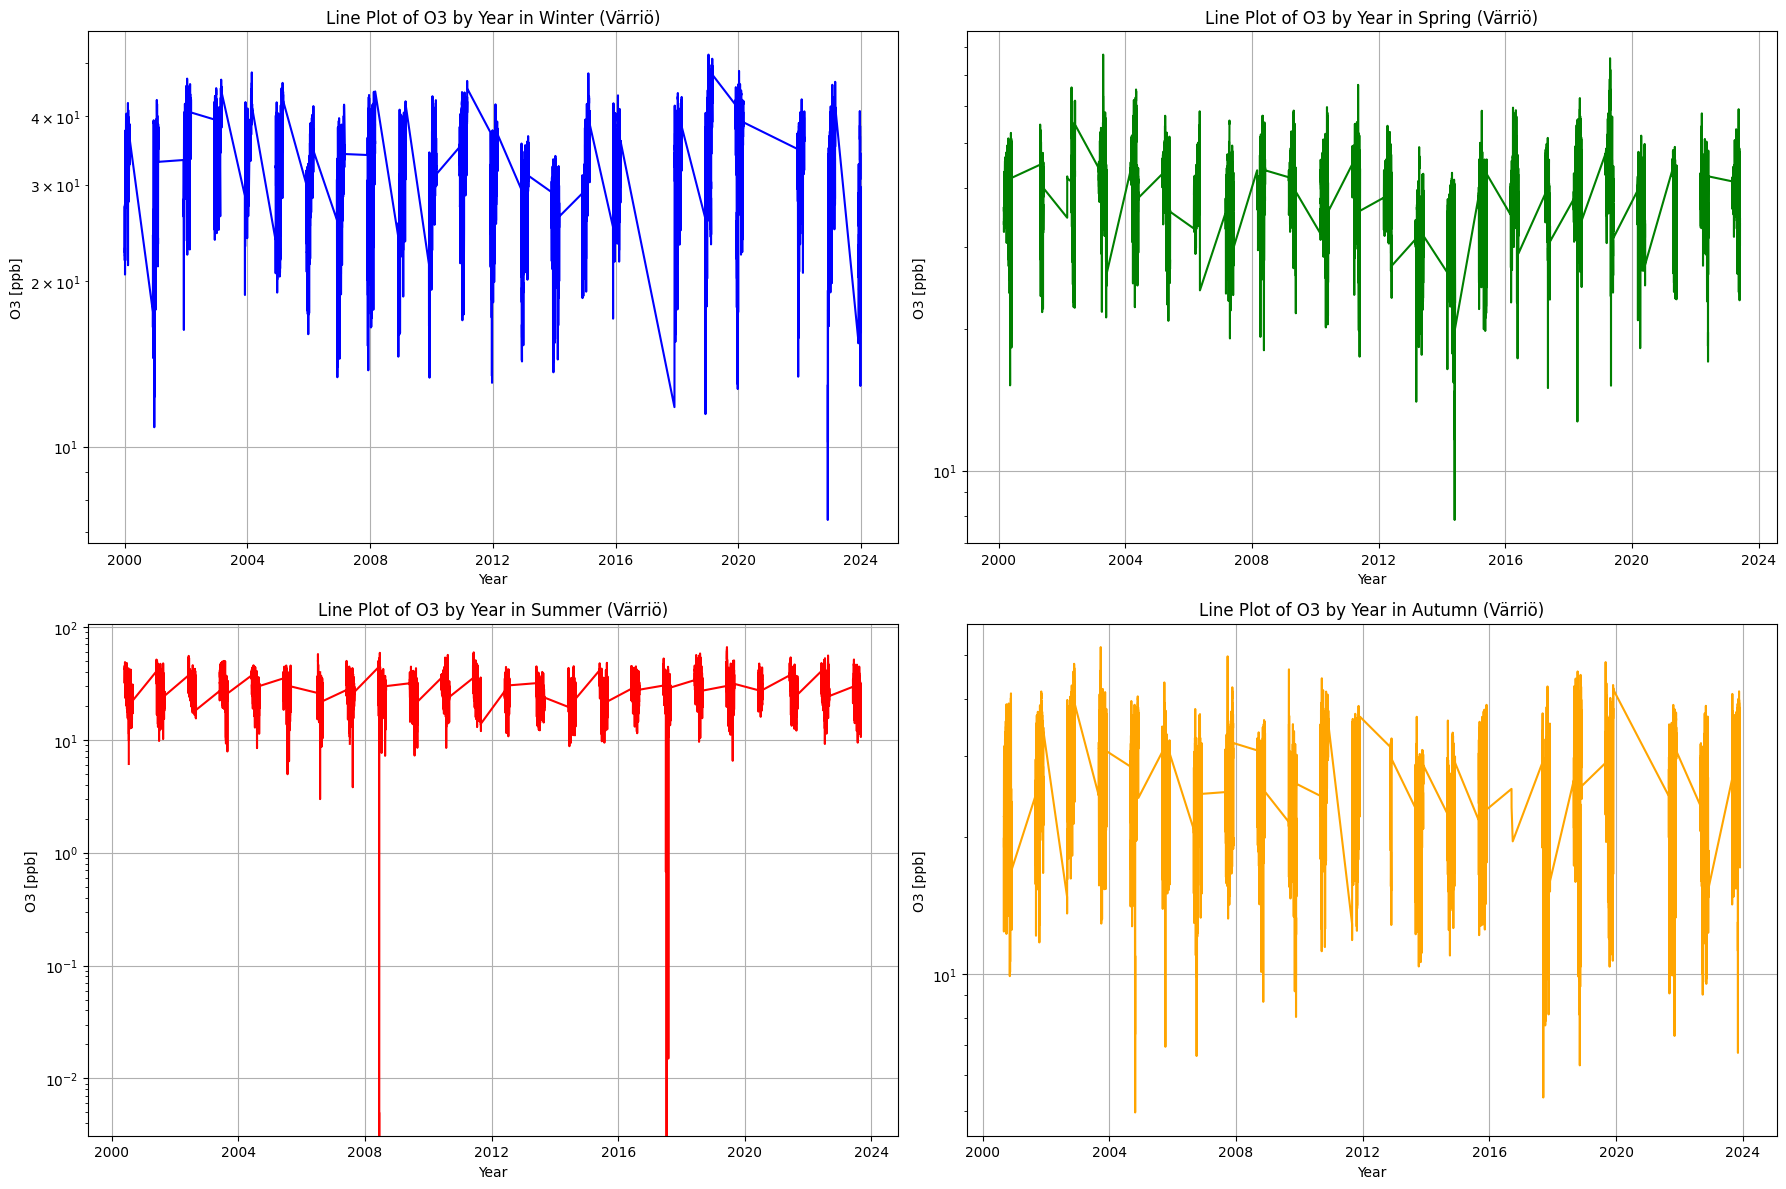

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot for Winter
ax[0, 0].plot(var_winter.index, var_winter['VAR_META.O3_1'], label='Winter O3', color='blue')
ax[0, 0].set_title('Line Plot of O3 by Year in Winter (Värriö)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('O3 [ppb]')
ax[0, 0].set_yscale('log')
ax[0, 0].grid(True)

# Plot for Spring
ax[0, 1].plot(var_spring.index, var_spring['VAR_META.O3_1'], label='Spring O3', color='green')
ax[0, 1].set_title('Line Plot of O3 by Year in Spring (Värriö)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('O3 [ppb]')
ax[0, 1].set_yscale('log')
ax[0, 1].grid(True)

# Plot for Summer
ax[1, 0].plot(var_summer.index, var_summer['VAR_META.O3_1'], label='Summer O3', color='red')
ax[1, 0].set_title('Line Plot of O3 by Year in Summer (Värriö)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('O3 [ppb]')
ax[1, 0].set_yscale('log')
ax[1, 0].grid(True)

# Plot for Autumn
ax[1, 1].plot(var_autumn.index, var_autumn['VAR_META.O3_1'], label='Autumn O3', color='orange')
ax[1, 1].set_title('Line Plot of O3 by Year in Autumn (Värriö)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('O3 [ppb]')
ax[1, 1].set_yscale('log')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

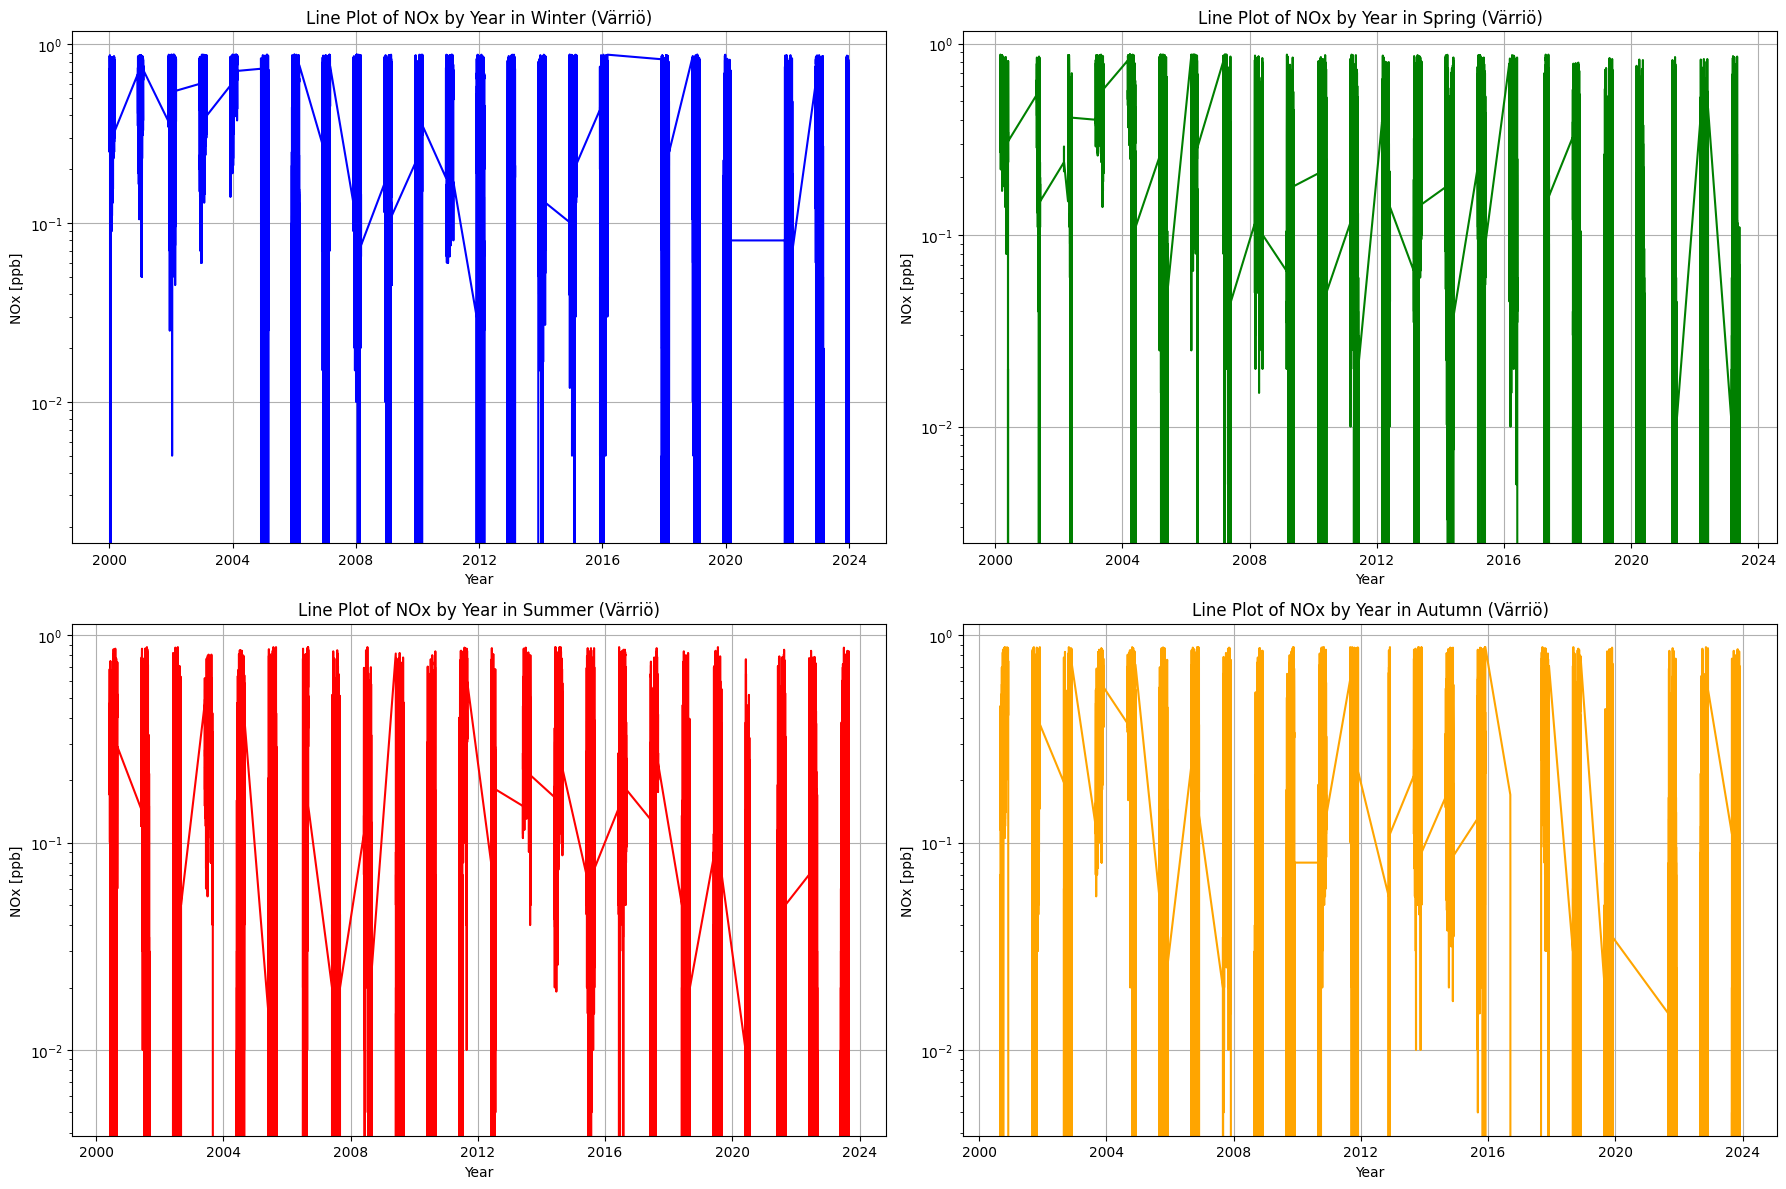

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot for Winter
ax[0, 0].plot(var_winter.index, var_winter['VAR_META.NOX_1'], label='Winter O3', color='blue')
ax[0, 0].set_title('Line Plot of NOx by Year in Winter (Värriö)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('NOx [ppb]')
ax[0, 0].set_yscale('log')
ax[0, 0].grid(True)

# Plot for Spring
ax[0, 1].plot(var_spring.index, var_spring['VAR_META.NOX_1'], label='Spring O3', color='green')
ax[0, 1].set_title('Line Plot of NOx by Year in Spring (Värriö)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('NOx [ppb]')
ax[0, 1].set_yscale('log')
ax[0, 1].grid(True)

# Plot for Summer
ax[1, 0].plot(var_summer.index, var_summer['VAR_META.NOX_1'], label='Summer O3', color='red')
ax[1, 0].set_title('Line Plot of NOx by Year in Summer (Värriö)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('NOx [ppb]')
ax[1, 0].set_yscale('log')
ax[1, 0].grid(True)

# Plot for Autumn
ax[1, 1].plot(var_autumn.index, var_autumn['VAR_META.NOX_1'], label='Autumn O3', color='orange')
ax[1, 1].set_title('Line Plot of NOx by Year in Autumn (Värriö)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('NOx [ppb]')
ax[1, 1].set_yscale('log')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

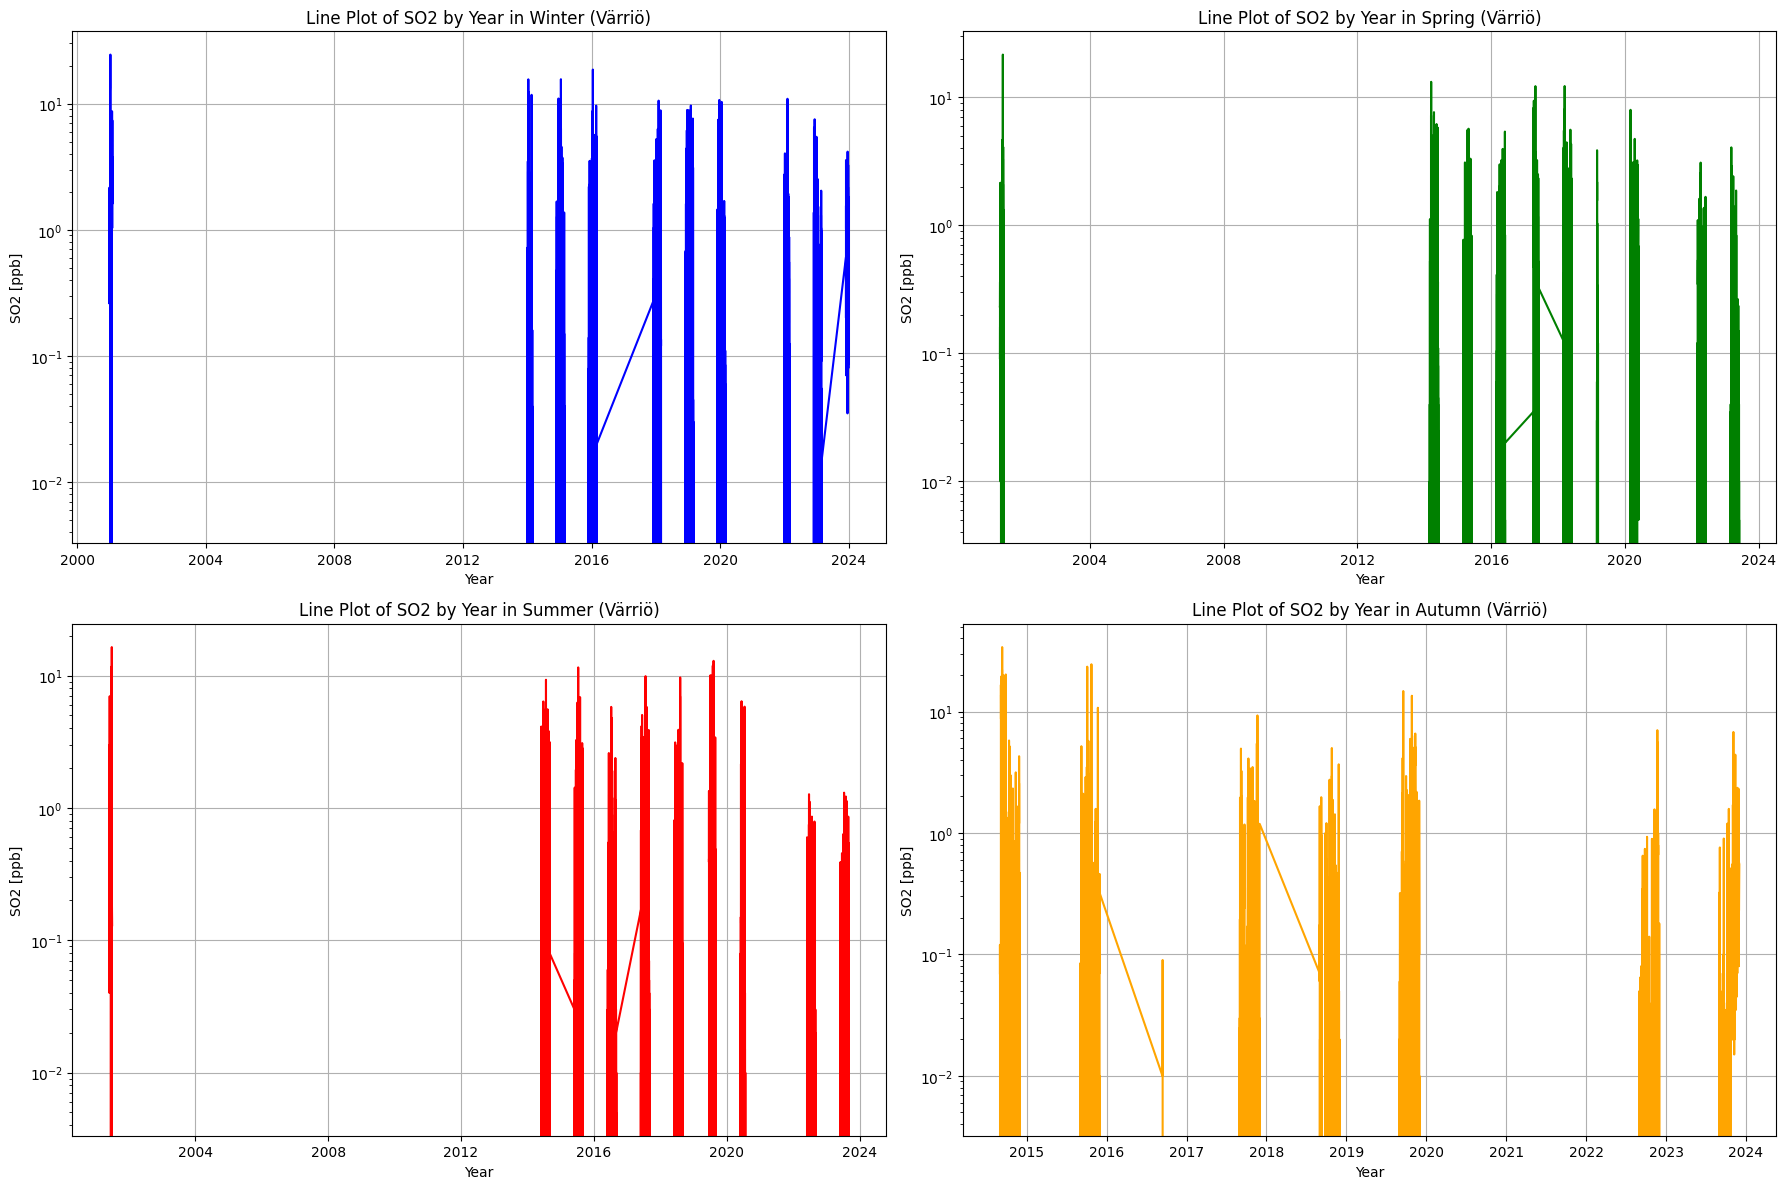

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot for Winter
ax[0, 0].plot(var_winter.index, var_winter['VAR_META.SO2_1'], label='Winter O3', color='blue')
ax[0, 0].set_title('Line Plot of SO2 by Year in Winter (Värriö)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('SO2 [ppb]')
ax[0, 0].set_yscale('log')
ax[0, 0].grid(True)

# Plot for Spring
ax[0, 1].plot(var_spring.index, var_spring['VAR_META.SO2_1'], label='Spring O3', color='green')
ax[0, 1].set_title('Line Plot of SO2 by Year in Spring (Värriö)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('SO2 [ppb]')
ax[0, 1].set_yscale('log')
ax[0, 1].grid(True)

# Plot for Summer
ax[1, 0].plot(var_summer.index, var_summer['VAR_META.SO2_1'], label='Summer O3', color='red')
ax[1, 0].set_title('Line Plot of SO2 by Year in Summer (Värriö)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('SO2 [ppb]')
ax[1, 0].set_yscale('log')
ax[1, 0].grid(True)

# Plot for Autumn
ax[1, 1].plot(var_autumn.index, var_autumn['VAR_META.SO2_1'], label='Autumn O3', color='orange')
ax[1, 1].set_title('Line Plot of SO2 by Year in Autumn (Värriö)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('SO2 [ppb]')
ax[1, 1].set_yscale('log')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

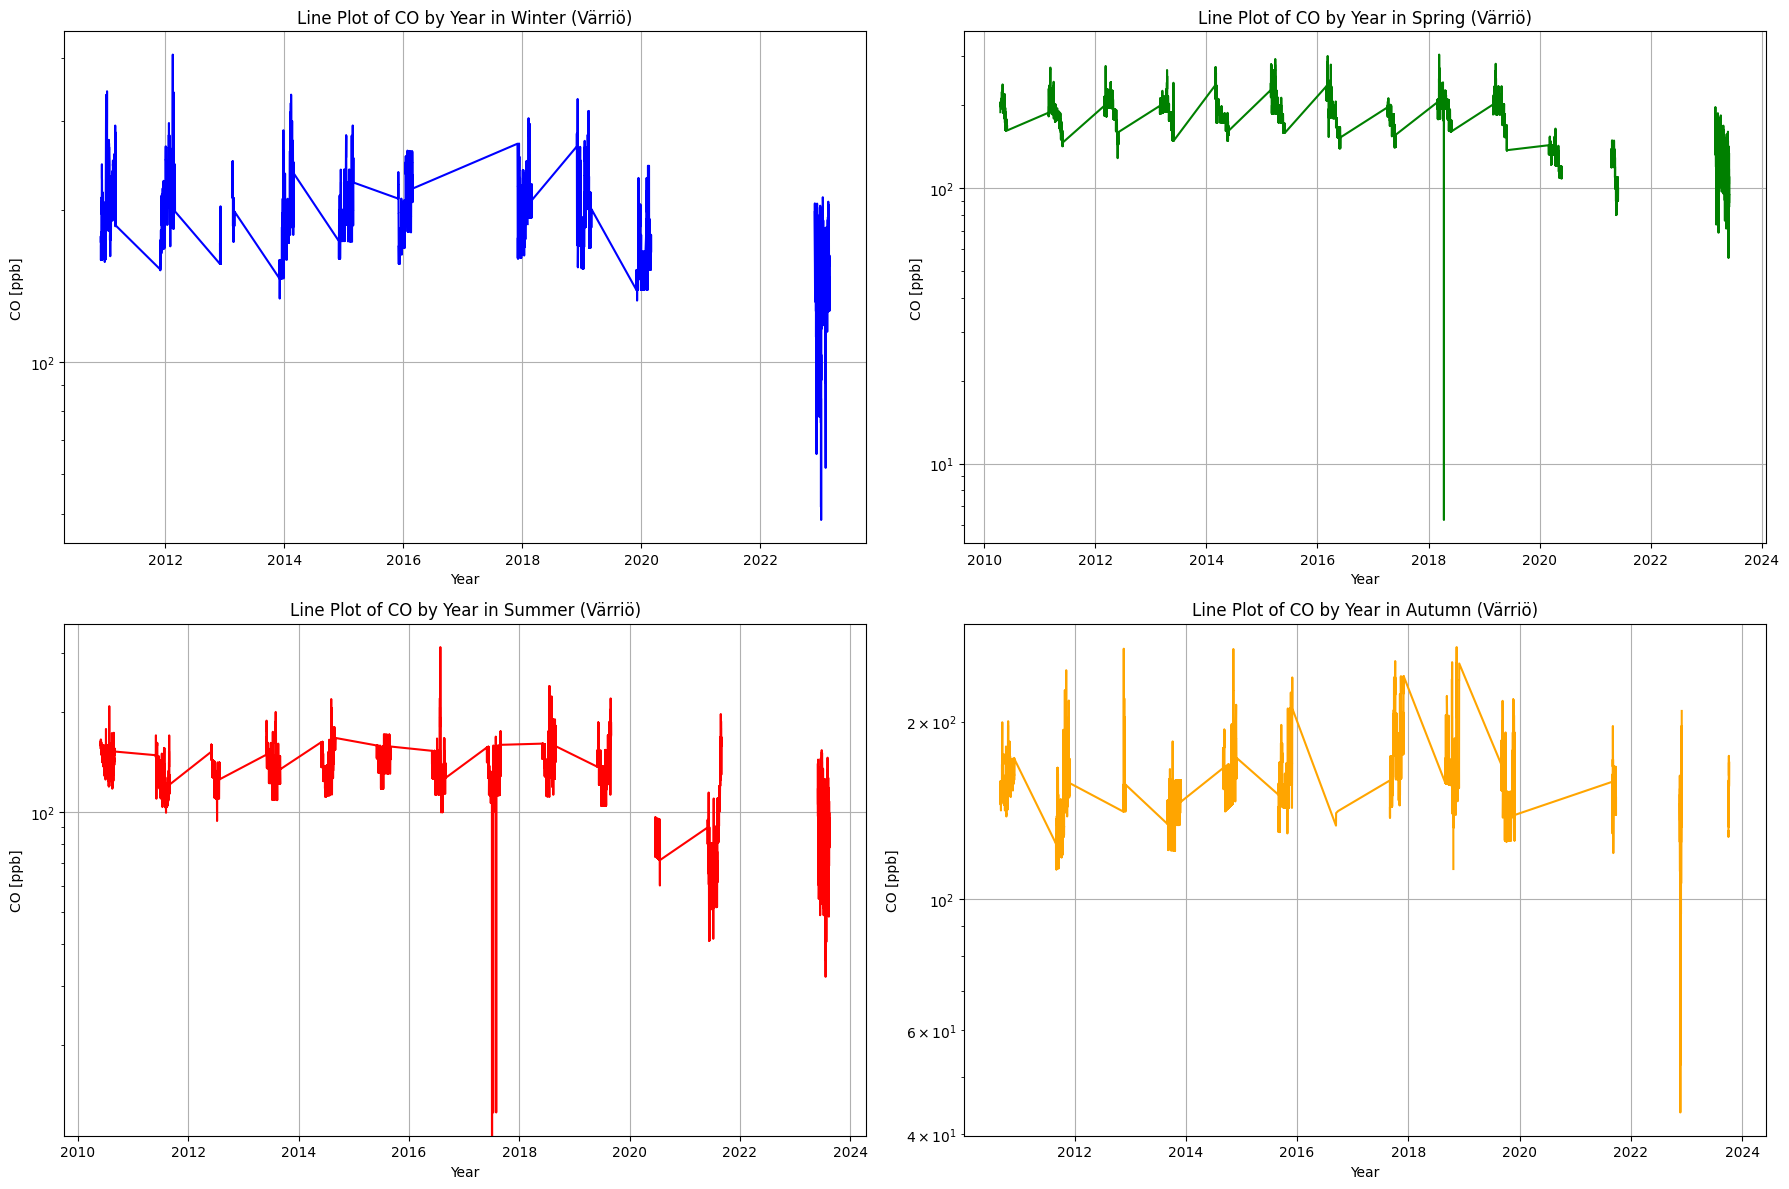

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot for Winter
ax[0, 0].plot(var_winter.index, var_winter['VAR_META.CO_1'], label='Winter', color='blue')
ax[0, 0].set_title('Line Plot of CO by Year in Winter (Värriö)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('CO [ppb]')
ax[0, 0].set_yscale('log')
ax[0, 0].grid(True)

# Plot for Spring
ax[0, 1].plot(var_spring.index, var_spring['VAR_META.CO_1'], label='Spring', color='green')
ax[0, 1].set_title('Line Plot of CO by Year in Spring (Värriö)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('CO [ppb]')
ax[0, 1].set_yscale('log')
ax[0, 1].grid(True)

# Plot for Summer
ax[1, 0].plot(var_summer.index, var_summer['VAR_META.CO_1'], label='Summer', color='red')
ax[1, 0].set_title('Line Plot of CO by Year in Summer (Värriö)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('CO [ppb]')
ax[1, 0].set_yscale('log')
ax[1, 0].grid(True)

# Plot for Autumn
ax[1, 1].plot(var_autumn.index, var_autumn['VAR_META.CO_1'], label='Autumn', color='orange')
ax[1, 1].set_title('Line Plot of CO by Year in Autumn (Värriö)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('CO [ppb]')
ax[1, 1].set_yscale('log')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

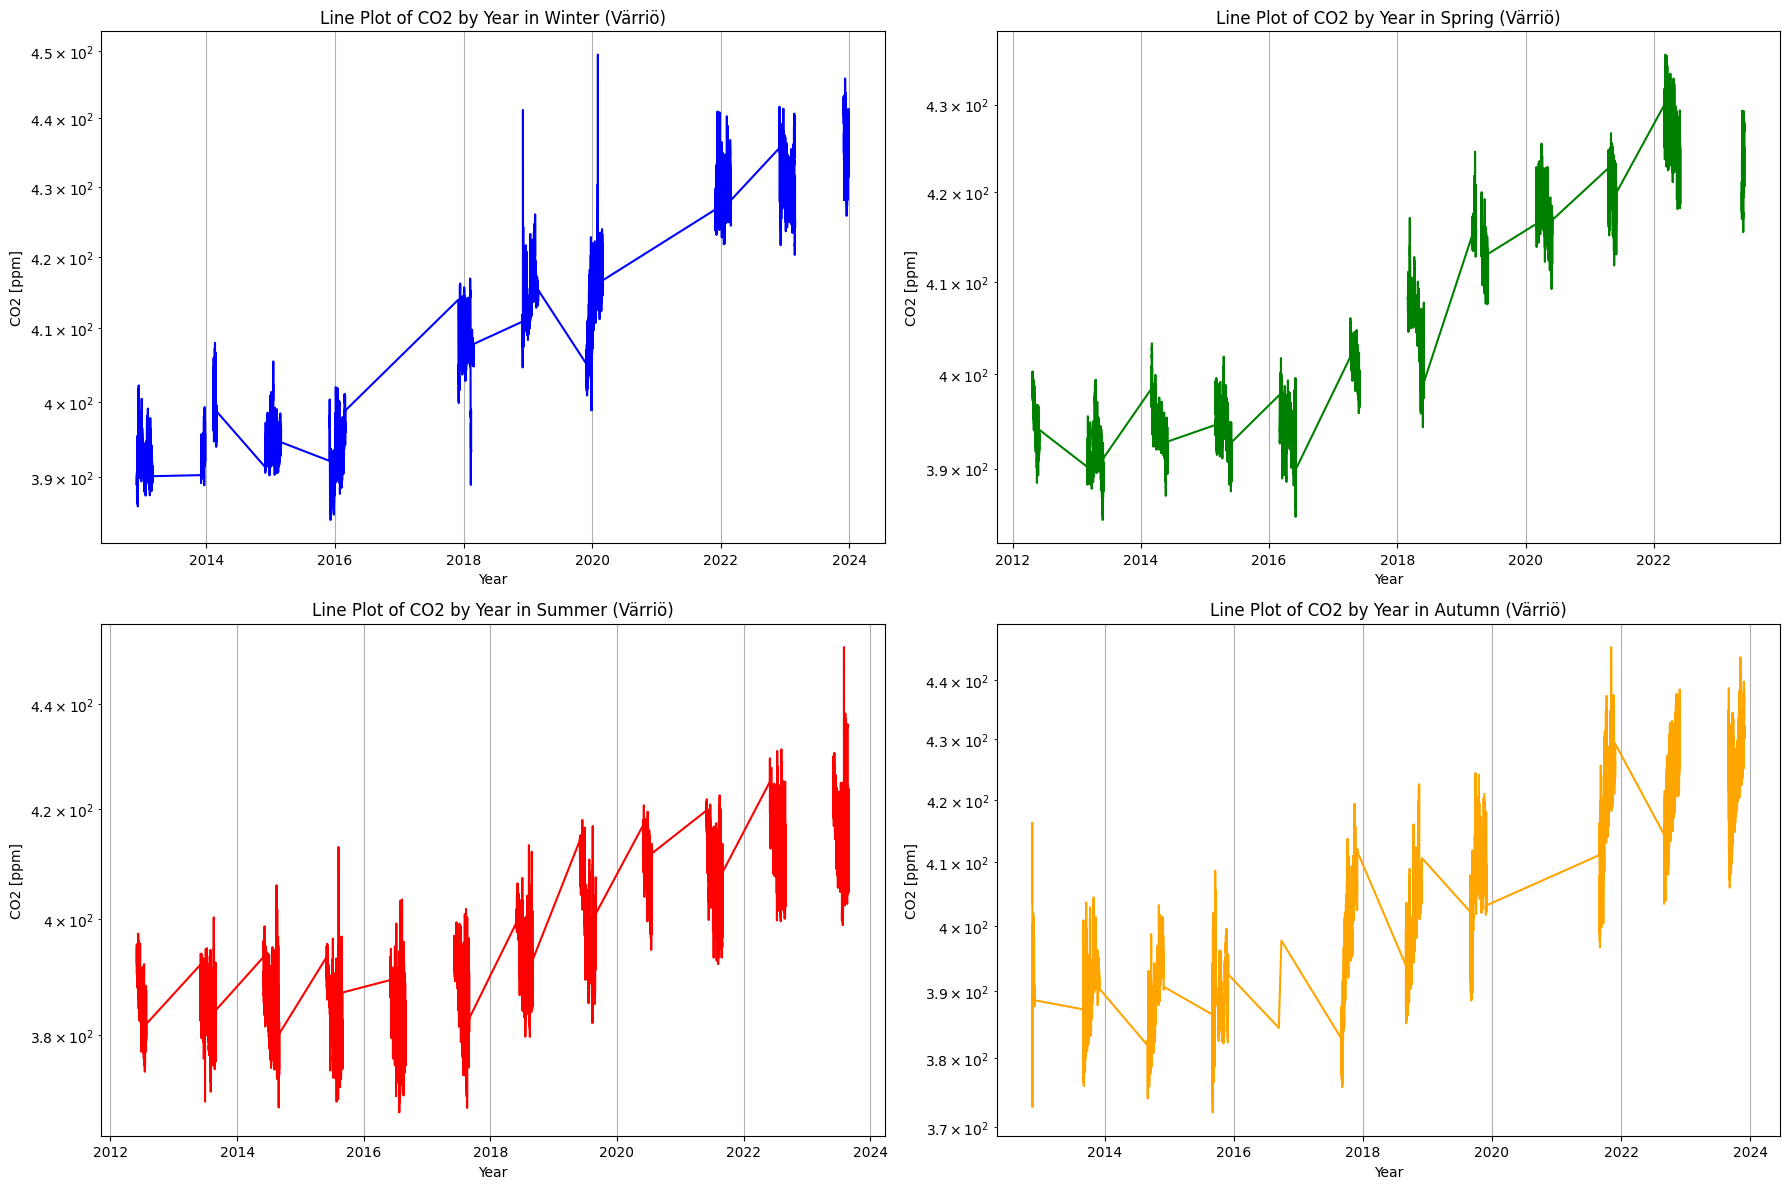

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot for Winter
ax[0, 0].plot(var_winter.index, var_winter['VAR_EDDY.av_c'], label='Winter', color='blue')
ax[0, 0].set_title('Line Plot of CO2 by Year in Winter (Värriö)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('CO2 [ppm]')
ax[0, 0].set_yscale('log')
ax[0, 0].grid(True)

# Plot for Spring
ax[0, 1].plot(var_spring.index, var_spring['VAR_EDDY.av_c'], label='Spring', color='green')
ax[0, 1].set_title('Line Plot of CO2 by Year in Spring (Värriö)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('CO2 [ppm]')
ax[0, 1].set_yscale('log')
ax[0, 1].grid(True)

# Plot for Summer
ax[1, 0].plot(var_summer.index, var_summer['VAR_EDDY.av_c'], label='Summer', color='red')
ax[1, 0].set_title('Line Plot of CO2 by Year in Summer (Värriö)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('CO2 [ppm]')
ax[1, 0].set_yscale('log')
ax[1, 0].grid(True)

# Plot for Autumn
ax[1, 1].plot(var_autumn.index, var_autumn['VAR_EDDY.av_c'], label='Autumn', color='orange')
ax[1, 1].set_title('Line Plot of CO2 by Year in Autumn (Värriö)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('CO2 [ppm]')
ax[1, 1].set_yscale('log')
ax[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [45]:
# VAR_META.O3_1	VAR_META.NOX_1	VAR_META.SO2_1	VAR_META.CO_1	VAR_META.CO206
var_summer['Year'] = var_summer.index.year

cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(var_summer['Year'].unique())))
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='VAR_META.O3_1', data=var_summer.reset_index(), showmeans=True, showfliers=False, palette=colors)
plt.title('Box Plot of O3 by Year')
plt.xlabel('Year')
plt.ylabel('O3')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.yscale('log')
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3270942651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_summer['Year'] = var_summer.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3270942651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='VAR_META.O3_1', data=var_summer.reset_index(), showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3270942651.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will b

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/437303899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_winter['Year'] = var_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/437303899.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='VAR_META.O3_1', data=var_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/437303899.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. T

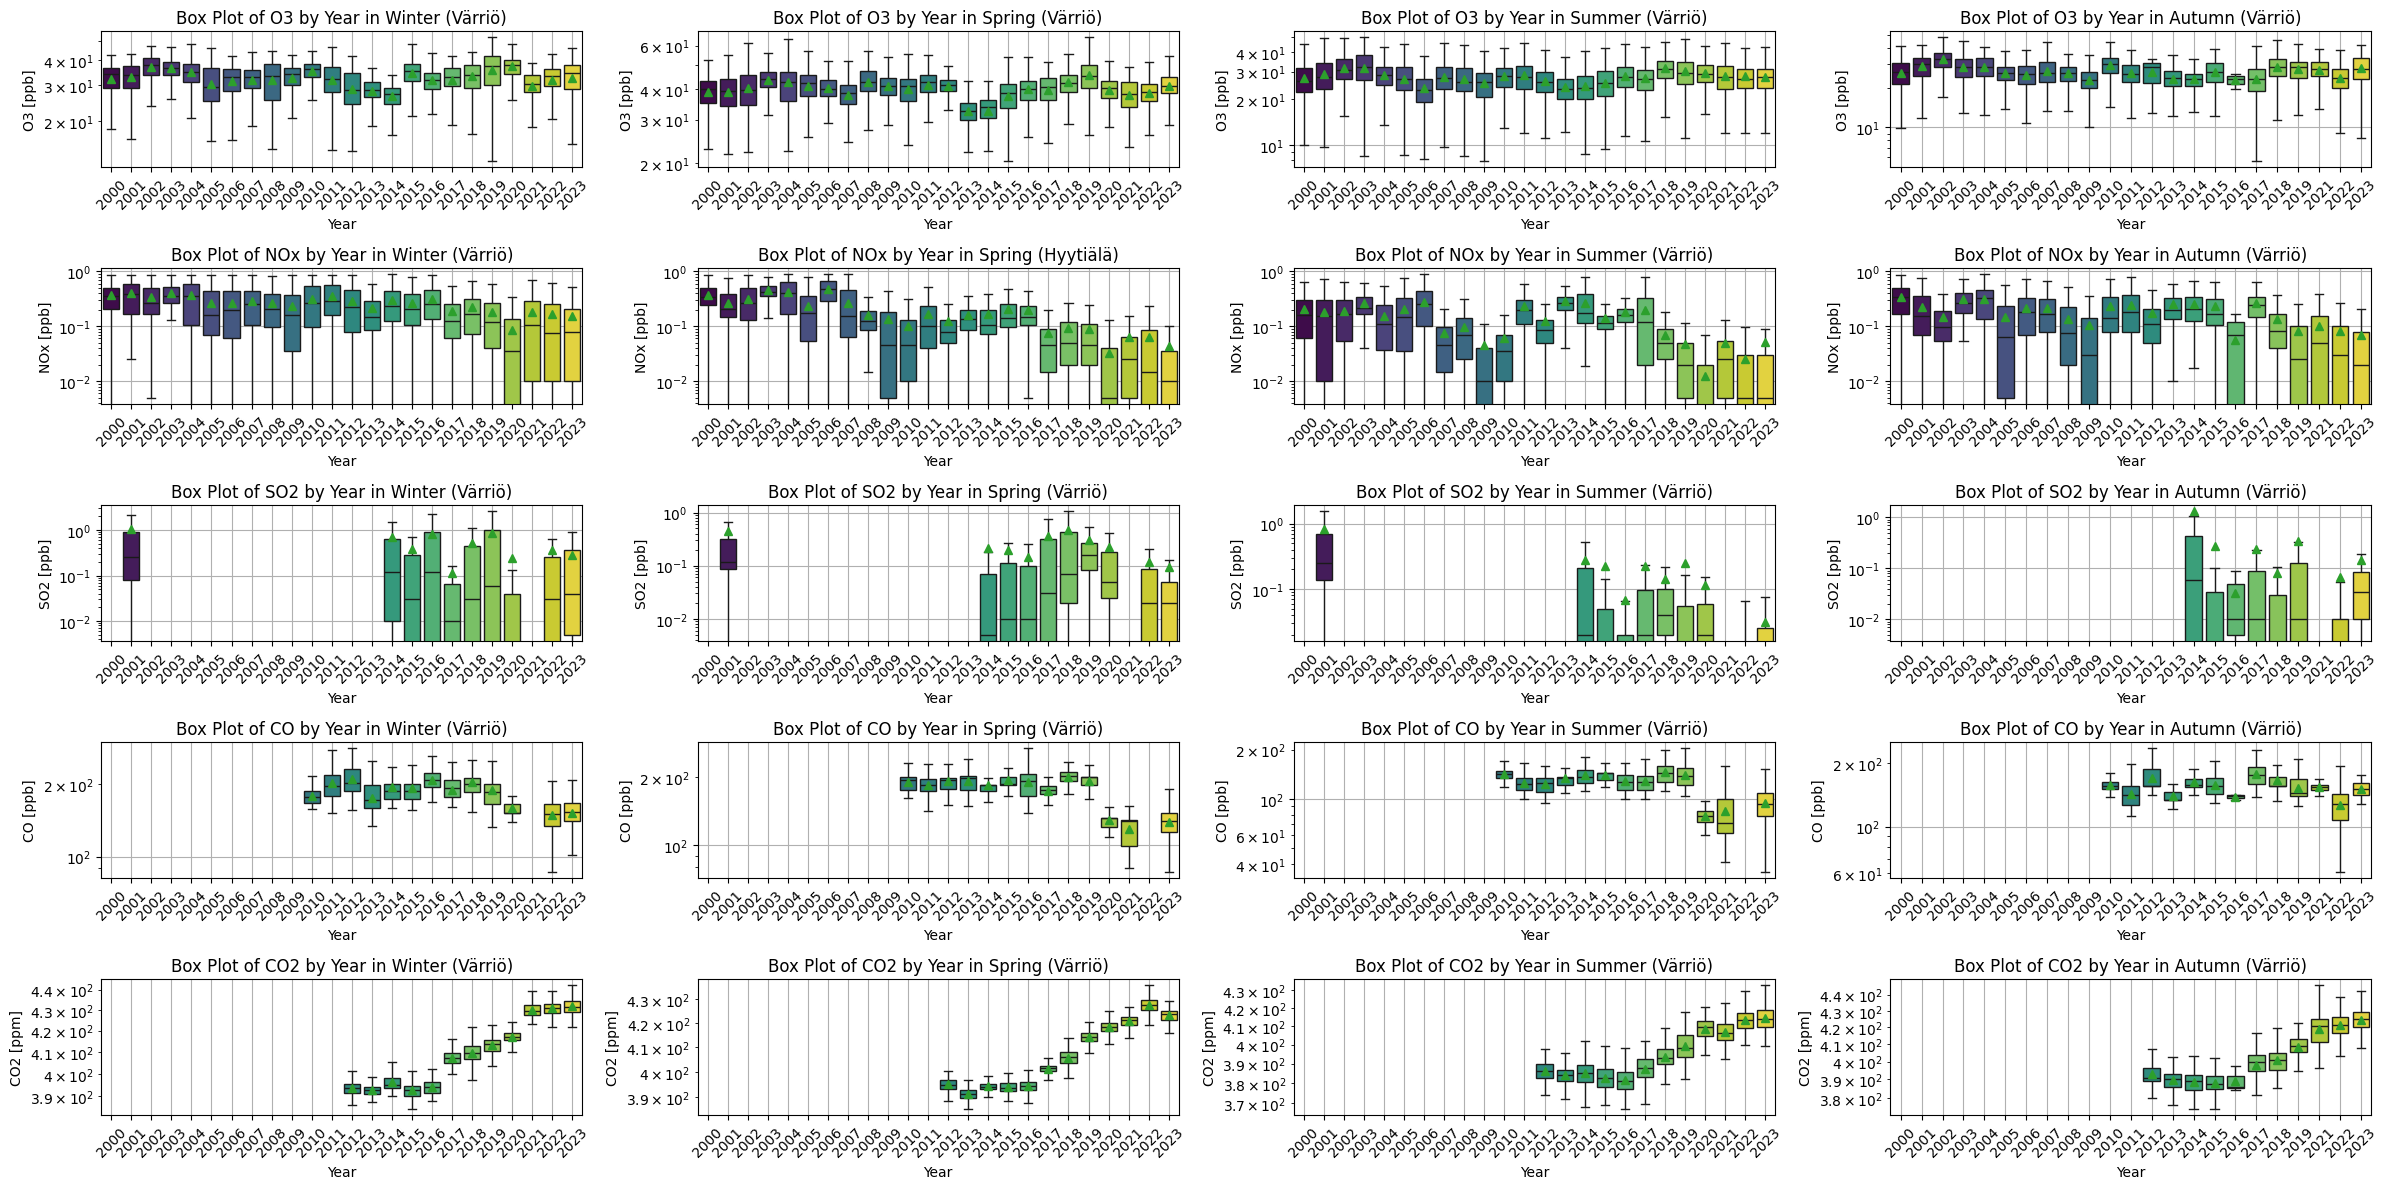

In [46]:
fig, ax = plt.subplots(5, 4, figsize=(24, 12))

# O3 plots
var_winter['Year'] = var_winter.index.year
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(var_winter['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.O3_1', data=var_winter.reset_index(), ax=ax[0, 0], showmeans=True, showfliers=False, palette=colors)
ax[0, 0].set_title('Box Plot of O3 by Year in Winter (Värriö)')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('O3 [ppb]')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)
ax[0, 0].grid(True)
ax[0, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
colors = cmap(np.linspace(0, 1, len(var_spring['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.O3_1', data=var_spring.reset_index(), ax=ax[0, 1], showmeans=True, showfliers=False, palette=colors)
ax[0, 1].set_title('Box Plot of O3 by Year in Spring (Värriö)')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('O3 [ppb]')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45)
ax[0, 1].grid(True)
ax[0, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
colors = cmap(np.linspace(0, 1, len(var_summer['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.O3_1', data=var_summer.reset_index(), ax=ax[0, 2], showmeans=True, showfliers=False, palette=colors)
ax[0, 2].set_title('Box Plot of O3 by Year in Summer (Värriö)')
ax[0, 2].set_xlabel('Year')
ax[0, 2].set_ylabel('O3 [ppb]')
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45)
ax[0, 2].grid(True)
ax[0, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
colors = cmap(np.linspace(0, 1, len(var_autumn['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.O3_1', data=var_autumn.reset_index(), ax=ax[0, 3], showmeans=True, showfliers=False, palette=colors)
ax[0, 3].set_title('Box Plot of O3 by Year in Autumn (Värriö)')
ax[0, 3].set_xlabel('Year')
ax[0, 3].set_ylabel('O3 [ppb]')
ax[0, 3].set_xticklabels(ax[0, 3].get_xticklabels(), rotation=45)
ax[0, 3].grid(True)
ax[0, 3].set_yscale('log')

# NOx plots
var_winter['Year'] = var_winter.index.year
colors = cmap(np.linspace(0, 1, len(var_winter['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.NOX_1', data=var_winter.reset_index(), ax=ax[1, 0], showmeans=True, showfliers=False, palette=colors)
ax[1, 0].set_title('Box Plot of NOx by Year in Winter (Värriö)')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('NOx [ppb]')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=45)
ax[1, 0].grid(True)
ax[1, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
colors = cmap(np.linspace(0, 1, len(var_spring['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.NOX_1', data=var_spring.reset_index(), ax=ax[1, 1], showmeans=True, showfliers=False, palette=colors)
ax[1, 1].set_title('Box Plot of NOx by Year in Spring (Hyytiälä)')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('NOx [ppb]')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=45)
ax[1, 1].grid(True)
ax[1, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
colors = cmap(np.linspace(0, 1, len(var_summer['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.NOX_1', data=var_summer.reset_index(), ax=ax[1, 2], showmeans=True, showfliers=False, palette=colors)
ax[1, 2].set_title('Box Plot of NOx by Year in Summer (Värriö)')
ax[1, 2].set_xlabel('Year')
ax[1, 2].set_ylabel('NOx [ppb]')
ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=45)
ax[1, 2].grid(True)
ax[1, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
colors = cmap(np.linspace(0, 1, len(var_autumn['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.NOX_1', data=var_autumn.reset_index(), ax=ax[1, 3], showmeans=True, showfliers=False, palette=colors)
ax[1, 3].set_title('Box Plot of NOx by Year in Autumn (Värriö)')
ax[1, 3].set_xlabel('Year')
ax[1, 3].set_ylabel('NOx [ppb]')
ax[1, 3].set_xticklabels(ax[1, 3].get_xticklabels(), rotation=45)
ax[1, 3].grid(True)
ax[1, 3].set_yscale('log')

# SO2 plots VAR_META.SO2_1	
var_winter['Year'] = var_winter.index.year
colors = cmap(np.linspace(0, 1, len(var_winter['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.SO2_1', data=var_winter.reset_index(), ax=ax[2, 0], showmeans=True, showfliers=False, palette=colors)
ax[2, 0].set_title('Box Plot of SO2 by Year in Winter (Värriö)')
ax[2, 0].set_xlabel('Year')
ax[2, 0].set_ylabel('SO2 [ppb]')
ax[2, 0].set_xticklabels(ax[2, 0].get_xticklabels(), rotation=45)
ax[2, 0].grid(True)
ax[2, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
colors = cmap(np.linspace(0, 1, len(var_spring['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.SO2_1', data=var_spring.reset_index(), ax=ax[2, 1], showmeans=True, showfliers=False, palette=colors)
ax[2, 1].set_title('Box Plot of SO2 by Year in Spring (Värriö)')
ax[2, 1].set_xlabel('Year')
ax[2, 1].set_ylabel('SO2 [ppb]')
ax[2, 1].set_xticklabels(ax[2, 1].get_xticklabels(), rotation=45)
ax[2, 1].grid(True)
ax[2, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
colors = cmap(np.linspace(0, 1, len(var_summer['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.SO2_1', data=var_summer.reset_index(), ax=ax[2, 2], showmeans=True, showfliers=False, palette=colors)
ax[2, 2].set_title('Box Plot of SO2 by Year in Summer (Värriö)')
ax[2, 2].set_xlabel('Year')
ax[2, 2].set_ylabel('SO2 [ppb]')
ax[2, 2].set_xticklabels(ax[2, 2].get_xticklabels(), rotation=45)
ax[2, 2].grid(True)
ax[2, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
colors = cmap(np.linspace(0, 1, len(var_autumn['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.SO2_1', data=var_autumn.reset_index(), ax=ax[2, 3], showmeans=True, showfliers=False, palette=colors)
ax[2, 3].set_title('Box Plot of SO2 by Year in Autumn (Värriö)')
ax[2, 3].set_xlabel('Year')
ax[2, 3].set_ylabel('SO2 [ppb]')
ax[2, 3].set_xticklabels(ax[2, 3].get_xticklabels(), rotation=45)
ax[2, 3].grid(True)
ax[2, 3].set_yscale('log')

# CO plots VAR_META.CO_1
var_winter['Year'] = var_winter.index.year
colors = cmap(np.linspace(0, 1, len(var_winter['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.CO_1', data=var_winter.reset_index(), ax=ax[3, 0], showmeans=True, showfliers=False, palette=colors)
ax[3, 0].set_title('Box Plot of CO by Year in Winter (Värriö)')
ax[3, 0].set_xlabel('Year')
ax[3, 0].set_ylabel('CO [ppb]')
ax[3, 0].set_xticklabels(ax[3, 0].get_xticklabels(), rotation=45)
ax[3, 0].grid(True)
ax[3, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
colors = cmap(np.linspace(0, 1, len(var_spring['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.CO_1', data=var_spring.reset_index(), ax=ax[3, 1], showmeans=True, showfliers=False, palette=colors)
ax[3, 1].set_title('Box Plot of CO by Year in Spring (Värriö)')
ax[3, 1].set_xlabel('Year')
ax[3, 1].set_ylabel('CO [ppb]')
ax[3, 1].set_xticklabels(ax[3, 1].get_xticklabels(), rotation=45)
ax[3, 1].grid(True)
ax[3, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
colors = cmap(np.linspace(0, 1, len(var_summer['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.CO_1', data=var_summer.reset_index(), ax=ax[3, 2], showmeans=True, showfliers=False, palette=colors)
ax[3, 2].set_title('Box Plot of CO by Year in Summer (Värriö)')
ax[3, 2].set_xlabel('Year')
ax[3, 2].set_ylabel('CO [ppb]')
ax[3, 2].set_xticklabels(ax[3, 2].get_xticklabels(), rotation=45)
ax[3, 2].grid(True)
ax[3, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
colors = cmap(np.linspace(0, 1, len(var_autumn['Year'].unique())))
sns.boxplot(x='Year', y='VAR_META.CO_1', data=var_autumn.reset_index(), ax=ax[3, 3], showmeans=True, showfliers=False, palette=colors)
ax[3, 3].set_title('Box Plot of CO by Year in Autumn (Värriö)')
ax[3, 3].set_xlabel('Year')
ax[3, 3].set_ylabel('CO [ppb]')
ax[3, 3].set_xticklabels(ax[3, 3].get_xticklabels(), rotation=45)
ax[3, 3].grid(True)
ax[3, 3].set_yscale('log')


# CO2 plots VAR_EDDY.av_c
var_winter['Year'] = var_winter.index.year
colors = cmap(np.linspace(0, 1, len(var_winter['Year'].unique())))
sns.boxplot(x='Year', y='VAR_EDDY.av_c', data=var_winter.reset_index(), ax=ax[4, 0], showmeans=True, showfliers=False, palette=colors)
ax[4, 0].set_title('Box Plot of CO2 by Year in Winter (Värriö)')
ax[4, 0].set_xlabel('Year')
ax[4, 0].set_ylabel('CO2 [ppm]')
ax[4, 0].set_xticklabels(ax[4, 0].get_xticklabels(), rotation=45)
ax[4, 0].grid(True)
ax[4, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
colors = cmap(np.linspace(0, 1, len(var_spring['Year'].unique())))
sns.boxplot(x='Year', y='VAR_EDDY.av_c', data=var_spring.reset_index(), ax=ax[4, 1], showmeans=True, showfliers=False, palette=colors)
ax[4, 1].set_title('Box Plot of CO2 by Year in Spring (Värriö)')
ax[4, 1].set_xlabel('Year')
ax[4, 1].set_ylabel('CO2 [ppm]')
ax[4, 1].set_xticklabels(ax[4, 1].get_xticklabels(), rotation=45)
ax[4, 1].grid(True)
ax[4, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
colors = cmap(np.linspace(0, 1, len(var_summer['Year'].unique())))
sns.boxplot(x='Year', y='VAR_EDDY.av_c', data=var_summer.reset_index(), ax=ax[4, 2], showmeans=True, showfliers=False, palette=colors)
ax[4, 2].set_title('Box Plot of CO2 by Year in Summer (Värriö)')
ax[4, 2].set_xlabel('Year')
ax[4, 2].set_ylabel('CO2 [ppm]')
ax[4, 2].set_xticklabels(ax[4, 2].get_xticklabels(), rotation=45)
ax[4, 2].grid(True)
ax[4, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
colors = cmap(np.linspace(0, 1, len(var_autumn['Year'].unique())))
sns.boxplot(x='Year', y='VAR_EDDY.av_c', data=var_autumn.reset_index(), ax=ax[4, 3], showmeans=True, showfliers=False, palette=colors)
ax[4, 3].set_title('Box Plot of CO2 by Year in Autumn (Värriö)')
ax[4, 3].set_xlabel('Year')
ax[4, 3].set_ylabel('CO2 [ppm]')
ax[4, 3].set_xticklabels(ax[4, 3].get_xticklabels(), rotation=45)
ax[4, 3].grid(True)
ax[4, 3].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3624561594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_winter['Year'] = var_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3624561594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3624561594.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

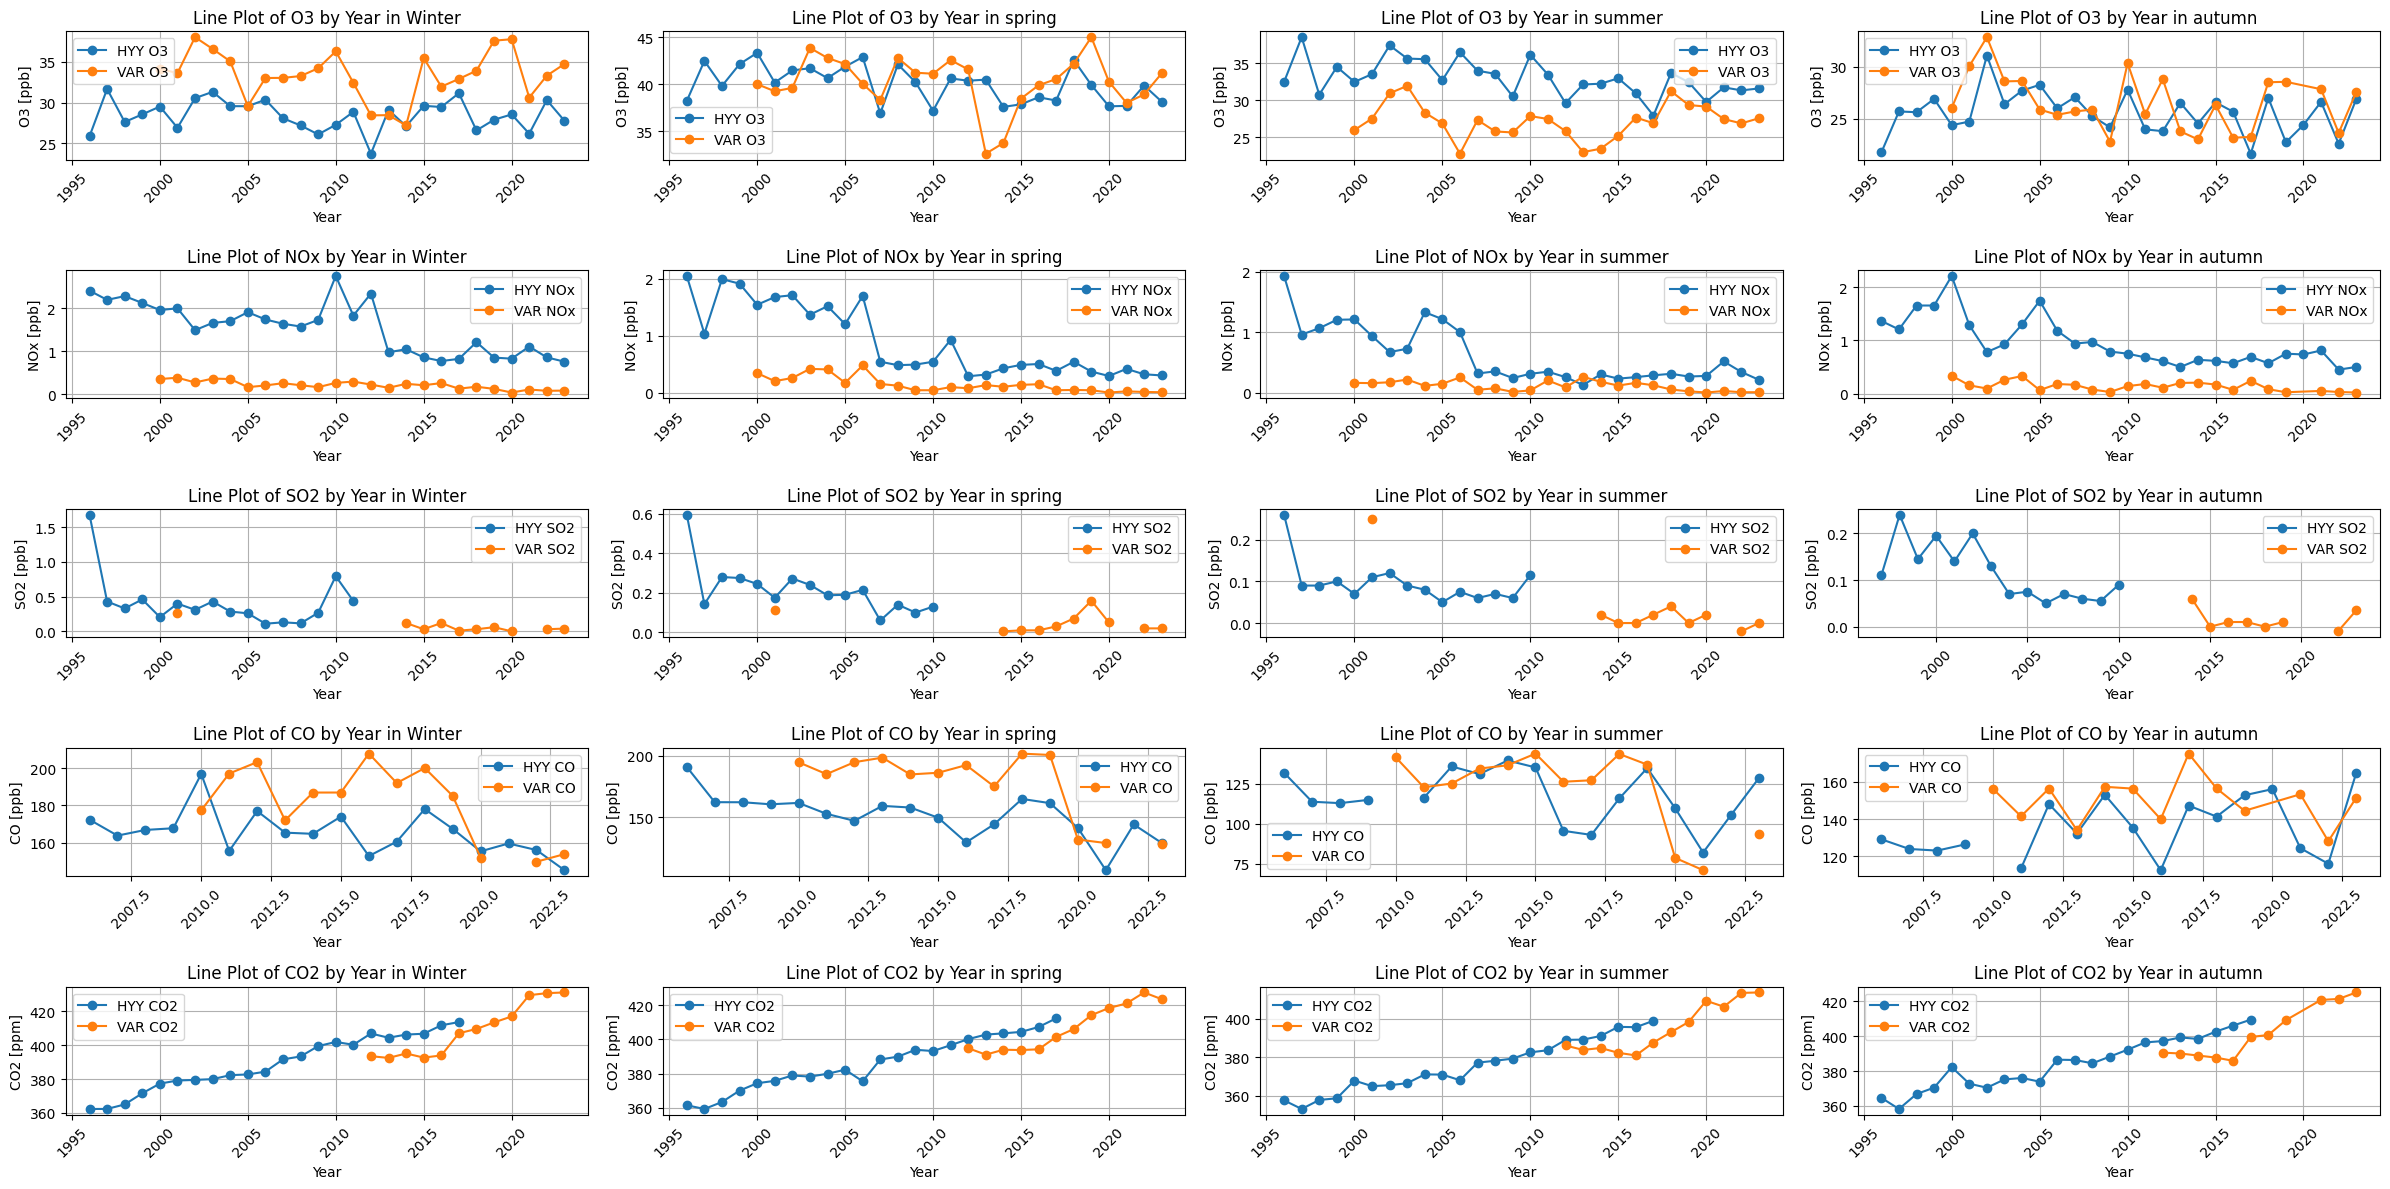

In [47]:
fig, ax = plt.subplots(5, 4, figsize=(24, 12))

# O3 plots
var_winter['Year'] = var_winter.index.year
var_o3_winter = var_winter.groupby('Year')['VAR_META.O3_1'].median()

hyy_winter['Year'] = hyy_winter.index.year
hyy_o3_winter = hyy_winter.groupby('Year')['HYY_META.O3672'].median()

ax[0, 0].plot(hyy_o3_winter.index, hyy_o3_winter.values, marker='o', linestyle='-', label='HYY O3')
ax[0, 0].plot(var_o3_winter.index, var_o3_winter.values, marker='o', linestyle='-', label='VAR O3')
ax[0, 0].set_title('Line Plot of O3 by Year in Winter')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('O3 [ppb]')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].grid(True)
ax[0, 0].legend(loc='best')
# ax[0, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
var_o3_spring = var_spring.groupby('Year')['VAR_META.O3_1'].median()

hyy_spring['Year'] = hyy_spring.index.year
hyy_o3_spring = hyy_spring.groupby('Year')['HYY_META.O3672'].median()

ax[0, 1].plot(hyy_o3_spring.index, hyy_o3_spring.values, marker='o', linestyle='-', label='HYY O3')
ax[0, 1].plot(var_o3_spring.index, var_o3_spring.values, marker='o', linestyle='-', label='VAR O3')
ax[0, 1].set_title('Line Plot of O3 by Year in spring')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('O3 [ppb]')
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].grid(True)
ax[0, 1].legend(loc='best')
# ax[0, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
var_o3_summer = var_summer.groupby('Year')['VAR_META.O3_1'].median()

hyy_summer['Year'] = hyy_summer.index.year
hyy_o3_summer = hyy_summer.groupby('Year')['HYY_META.O3672'].median()

ax[0, 2].plot(hyy_o3_summer.index, hyy_o3_summer.values, marker='o', linestyle='-', label='HYY O3')
ax[0, 2].plot(var_o3_summer.index, var_o3_summer.values, marker='o', linestyle='-', label='VAR O3')
ax[0, 2].set_title('Line Plot of O3 by Year in summer')
ax[0, 2].set_xlabel('Year')
ax[0, 2].set_ylabel('O3 [ppb]')
ax[0, 2].tick_params(axis='x', rotation=45)
ax[0, 2].grid(True)
ax[0, 2].legend(loc='best')
# ax[0, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
var_o3_autumn = var_autumn.groupby('Year')['VAR_META.O3_1'].median()

hyy_autumn['Year'] = hyy_autumn.index.year
hyy_o3_autumn = hyy_autumn.groupby('Year')['HYY_META.O3672'].median()

ax[0, 3].plot(hyy_o3_autumn.index, hyy_o3_autumn.values, marker='o', linestyle='-', label='HYY O3')
ax[0, 3].plot(var_o3_autumn.index, var_o3_autumn.values, marker='o', linestyle='-', label='VAR O3')
ax[0, 3].set_title('Line Plot of O3 by Year in autumn')
ax[0, 3].set_xlabel('Year')
ax[0, 3].set_ylabel('O3 [ppb]')
ax[0, 3].tick_params(axis='x', rotation=45)
ax[0, 3].grid(True)
ax[0, 3].legend(loc='best')
# ax[0, 3].set_yscale('log')

# NOx plots 'HYY_META.NOx672'
var_winter['Year'] = var_winter.index.year
var_NO_winter = var_winter.groupby('Year')['VAR_META.NOX_1'].median()

hyy_winter['Year'] = hyy_winter.index.year
hyy_NO_winter = hyy_winter.groupby('Year')['HYY_META.NOx672'].median()

ax[1, 0].plot(hyy_NO_winter.index, hyy_NO_winter.values, marker='o', linestyle='-', label='HYY NOx')
ax[1, 0].plot(var_NO_winter.index, var_NO_winter.values, marker='o', linestyle='-', label='VAR NOx')
ax[1, 0].set_title('Line Plot of NOx by Year in Winter')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('NOx [ppb]')
ax[1, 0].tick_params(axis='x', rotation=45)
ax[1, 0].grid(True)
ax[1, 0].legend(loc='best')
# ax[1, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
var_NO_spring = var_spring.groupby('Year')['VAR_META.NOX_1'].median()

hyy_spring['Year'] = hyy_spring.index.year
hyy_NO_spring = hyy_spring.groupby('Year')['HYY_META.NOx672'].median()

ax[1, 1].plot(hyy_NO_spring.index, hyy_NO_spring.values, marker='o', linestyle='-', label='HYY NOx')
ax[1, 1].plot(var_NO_spring.index, var_NO_spring.values, marker='o', linestyle='-', label='VAR NOx')
ax[1, 1].set_title('Line Plot of NOx by Year in spring')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('NOx [ppb]')
ax[1, 1].tick_params(axis='x', rotation=45)
ax[1, 1].grid(True)
ax[1, 1].legend(loc='best')
# ax[1, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
var_NO_summer = var_summer.groupby('Year')['VAR_META.NOX_1'].median()

hyy_summer['Year'] = hyy_summer.index.year
hyy_NO_summer = hyy_summer.groupby('Year')['HYY_META.NOx672'].median()

ax[1, 2].plot(hyy_NO_summer.index, hyy_NO_summer.values, marker='o', linestyle='-', label='HYY NOx')
ax[1, 2].plot(var_NO_summer.index, var_NO_summer.values, marker='o', linestyle='-', label='VAR NOx')
ax[1, 2].set_title('Line Plot of NOx by Year in summer')
ax[1, 2].set_xlabel('Year')
ax[1, 2].set_ylabel('NOx [ppb]')
ax[1, 2].tick_params(axis='x', rotation=45)
ax[1, 2].grid(True)
ax[1, 2].legend(loc='best')
# ax[1, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
var_NO_autumn = var_autumn.groupby('Year')['VAR_META.NOX_1'].median()

hyy_autumn['Year'] = hyy_autumn.index.year
hyy_NO_autumn = hyy_autumn.groupby('Year')['HYY_META.NOx672'].median()

ax[1, 3].plot(hyy_NO_autumn.index, hyy_NO_autumn.values, marker='o', linestyle='-', label='HYY NOx')
ax[1, 3].plot(var_NO_autumn.index, var_NO_autumn.values, marker='o', linestyle='-', label='VAR NOx')
ax[1, 3].set_title('Line Plot of NOx by Year in autumn')
ax[1, 3].set_xlabel('Year')
ax[1, 3].set_ylabel('NOx [ppb]')
ax[1, 3].tick_params(axis='x', rotation=45)
ax[1, 3].grid(True)
ax[1, 3].legend(loc='best')
# ax[1, 3].set_yscale('log')

# SO2 plots VAR_META.SO2_1   'HYY_META.SO2672', 
var_winter['Year'] = var_winter.index.year
var_SO2_winter = var_winter.groupby('Year')['VAR_META.SO2_1'].median()

hyy_winter['Year'] = hyy_winter.index.year
hyy_SO2_winter = hyy_winter.groupby('Year')['HYY_META.SO2672'].median()

ax[2, 0].plot(hyy_SO2_winter.index, hyy_SO2_winter.values, marker='o', linestyle='-', label='HYY SO2')
ax[2, 0].plot(var_SO2_winter.index, var_SO2_winter.values, marker='o', linestyle='-', label='VAR SO2')
ax[2, 0].set_title('Line Plot of SO2 by Year in Winter')
ax[2, 0].set_xlabel('Year')
ax[2, 0].set_ylabel('SO2 [ppb]')
ax[2, 0].tick_params(axis='x', rotation=45)
ax[2, 0].grid(True)
ax[2, 0].legend(loc='best')
# ax[2, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
var_SO2_spring = var_spring.groupby('Year')['VAR_META.SO2_1'].median()

hyy_spring['Year'] = hyy_spring.index.year
hyy_SO2_spring = hyy_spring.groupby('Year')['HYY_META.SO2672'].median()

ax[2, 1].plot(hyy_SO2_spring.index, hyy_SO2_spring.values, marker='o', linestyle='-', label='HYY SO2')
ax[2, 1].plot(var_SO2_spring.index, var_SO2_spring.values, marker='o', linestyle='-', label='VAR SO2')
ax[2, 1].set_title('Line Plot of SO2 by Year in spring')
ax[2, 1].set_xlabel('Year')
ax[2, 1].set_ylabel('SO2 [ppb]')
ax[2, 1].tick_params(axis='x', rotation=45)
ax[2, 1].grid(True)
ax[2, 1].legend(loc='best')
# ax[2, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
var_SO2_summer = var_summer.groupby('Year')['VAR_META.SO2_1'].median()

hyy_summer['Year'] = hyy_summer.index.year
hyy_SO2_summer = hyy_summer.groupby('Year')['HYY_META.SO2672'].median()

ax[2, 2].plot(hyy_SO2_summer.index, hyy_SO2_summer.values, marker='o', linestyle='-', label='HYY SO2')
ax[2, 2].plot(var_SO2_summer.index, var_SO2_summer.values, marker='o', linestyle='-', label='VAR SO2')
ax[2, 2].set_title('Line Plot of SO2 by Year in summer')
ax[2, 2].set_xlabel('Year')
ax[2, 2].set_ylabel('SO2 [ppb]')
ax[2, 2].tick_params(axis='x', rotation=45)
ax[2, 2].grid(True)
ax[2, 2].legend(loc='best')
# ax[2, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
var_SO2_autumn = var_autumn.groupby('Year')['VAR_META.SO2_1'].median()

hyy_autumn['Year'] = hyy_autumn.index.year
hyy_SO2_autumn = hyy_autumn.groupby('Year')['HYY_META.SO2672'].median()

ax[2, 3].plot(hyy_SO2_autumn.index, hyy_SO2_autumn.values, marker='o', linestyle='-', label='HYY SO2')
ax[2, 3].plot(var_SO2_autumn.index, var_SO2_autumn.values, marker='o', linestyle='-', label='VAR SO2')
ax[2, 3].set_title('Line Plot of SO2 by Year in autumn')
ax[2, 3].set_xlabel('Year')
ax[2, 3].set_ylabel('SO2 [ppb]')
ax[2, 3].tick_params(axis='x', rotation=45)
ax[2, 3].grid(True)
ax[2, 3].legend(loc='best')
# ax[2, 3].set_yscale('log')

# CO plots VAR_META.CO_1 'HYY_META.CO672', 'HYY_META.CO2672'
var_winter['Year'] = var_winter.index.year
var_CO_winter = var_winter.groupby('Year')['VAR_META.CO_1'].median()

hyy_winter['Year'] = hyy_winter.index.year
hyy_CO_winter = hyy_winter.groupby('Year')['HYY_META.CO672'].median()

ax[3, 0].plot(hyy_CO_winter.index, hyy_CO_winter.values, marker='o', linestyle='-', label='HYY CO')
ax[3, 0].plot(var_CO_winter.index, var_CO_winter.values, marker='o', linestyle='-', label='VAR CO')
ax[3, 0].set_title('Line Plot of CO by Year in Winter')
ax[3, 0].set_xlabel('Year')
ax[3, 0].set_ylabel('CO [ppb]')
ax[3, 0].tick_params(axis='x', rotation=45)
ax[3, 0].grid(True)
ax[3, 0].legend(loc='best')
# ax[3, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
var_CO_spring = var_spring.groupby('Year')['VAR_META.CO_1'].median()

hyy_spring['Year'] = hyy_spring.index.year
hyy_CO_spring = hyy_spring.groupby('Year')['HYY_META.CO672'].median()

ax[3, 1].plot(hyy_CO_spring.index, hyy_CO_spring.values, marker='o', linestyle='-', label='HYY CO')
ax[3, 1].plot(var_CO_spring.index, var_CO_spring.values, marker='o', linestyle='-', label='VAR CO')
ax[3, 1].set_title('Line Plot of CO by Year in spring')
ax[3, 1].set_xlabel('Year')
ax[3, 1].set_ylabel('CO [ppb]')
ax[3, 1].tick_params(axis='x', rotation=45)
ax[3, 1].grid(True)
ax[3, 1].legend(loc='best')
# ax[3, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
var_CO_summer = var_summer.groupby('Year')['VAR_META.CO_1'].median()

hyy_summer['Year'] = hyy_summer.index.year
hyy_CO_summer = hyy_summer.groupby('Year')['HYY_META.CO672'].median()

ax[3, 2].plot(hyy_CO_summer.index, hyy_CO_summer.values, marker='o', linestyle='-', label='HYY CO')
ax[3, 2].plot(var_CO_summer.index, var_CO_summer.values, marker='o', linestyle='-', label='VAR CO')
ax[3, 2].set_title('Line Plot of CO by Year in summer')
ax[3, 2].set_xlabel('Year')
ax[3, 2].set_ylabel('CO [ppb]')
ax[3, 2].tick_params(axis='x', rotation=45)
ax[3, 2].grid(True)
ax[3, 2].legend(loc='best')
# ax[3, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
var_CO_autumn = var_autumn.groupby('Year')['VAR_META.CO_1'].median()

hyy_autumn['Year'] = hyy_autumn.index.year
hyy_CO_autumn = hyy_autumn.groupby('Year')['HYY_META.CO672'].median()

ax[3, 3].plot(hyy_CO_autumn.index, hyy_CO_autumn.values, marker='o', linestyle='-', label='HYY CO')
ax[3, 3].plot(var_CO_autumn.index, var_CO_autumn.values, marker='o', linestyle='-', label='VAR CO')
ax[3, 3].set_title('Line Plot of CO by Year in autumn')
ax[3, 3].set_xlabel('Year')
ax[3, 3].set_ylabel('CO [ppb]')
ax[3, 3].tick_params(axis='x', rotation=45)
ax[3, 3].grid(True)
ax[3, 3].legend(loc='best')
# ax[3, 3].set_yscale('log')

# CO2 plots VAR_EDDY.av_c HYY_META.CO2672
var_winter['Year'] = var_winter.index.year
var_CO2_winter = var_winter.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_winter['Year'] = hyy_winter.index.year
hyy_CO2_winter = hyy_winter.groupby('Year')['HYY_META.CO2672'].median()

ax[4, 0].plot(hyy_CO2_winter.index, hyy_CO2_winter.values, marker='o', linestyle='-', label='HYY CO2')
ax[4, 0].plot(var_CO2_winter.index, var_CO2_winter.values, marker='o', linestyle='-', label='VAR CO2')
ax[4, 0].set_title('Line Plot of CO2 by Year in Winter')
ax[4, 0].set_xlabel('Year')
ax[4, 0].set_ylabel('CO2 [ppm]')
ax[4, 0].tick_params(axis='x', rotation=45)
ax[4, 0].grid(True)
ax[4, 0].legend(loc='best')
# ax[4, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
var_CO2_spring = var_spring.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_spring['Year'] = hyy_spring.index.year
hyy_CO2_spring = hyy_spring.groupby('Year')['HYY_META.CO2672'].median()

ax[4, 1].plot(hyy_CO2_spring.index, hyy_CO2_spring.values, marker='o', linestyle='-', label='HYY CO2')
ax[4, 1].plot(var_CO2_spring.index, var_CO2_spring.values, marker='o', linestyle='-', label='VAR CO2')
ax[4, 1].set_title('Line Plot of CO2 by Year in spring')
ax[4, 1].set_xlabel('Year')
ax[4, 1].set_ylabel('CO2 [ppm]')
ax[4, 1].tick_params(axis='x', rotation=45)
ax[4, 1].grid(True)
ax[4, 1].legend(loc='best')
# ax[4, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
var_CO2_summer = var_summer.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_summer['Year'] = hyy_summer.index.year
hyy_CO2_summer = hyy_summer.groupby('Year')['HYY_META.CO2672'].median()

ax[4, 2].plot(hyy_CO2_summer.index, hyy_CO2_summer.values, marker='o', linestyle='-', label='HYY CO2')
ax[4, 2].plot(var_CO2_summer.index, var_CO2_summer.values, marker='o', linestyle='-', label='VAR CO2')
ax[4, 2].set_title('Line Plot of CO2 by Year in summer')
ax[4, 2].set_xlabel('Year')
ax[4, 2].set_ylabel('CO2 [ppm]')
ax[4, 2].tick_params(axis='x', rotation=45)
ax[4, 2].grid(True)
ax[4, 2].legend(loc='best')
# ax[4, 2].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
var_CO2_autumn = var_autumn.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_autumn['Year'] = hyy_autumn.index.year
hyy_CO2_autumn = hyy_autumn.groupby('Year')['HYY_META.CO2672'].median()

ax[4, 3].plot(hyy_CO2_autumn.index, hyy_CO2_autumn.values, marker='o', linestyle='-', label='HYY CO2')
ax[4, 3].plot(var_CO2_autumn.index, var_CO2_autumn.values, marker='o', linestyle='-', label='VAR CO2')
ax[4, 3].set_title('Line Plot of CO2 by Year in autumn')
ax[4, 3].set_xlabel('Year')
ax[4, 3].set_ylabel('CO2 [ppm]')
ax[4, 3].tick_params(axis='x', rotation=45)
ax[4, 3].grid(True)
ax[4, 3].legend(loc='best')
# ax[4, 3].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3907388192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_winter['Hour'] = var_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3907388192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_spring['Hour'] = var_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3907388192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

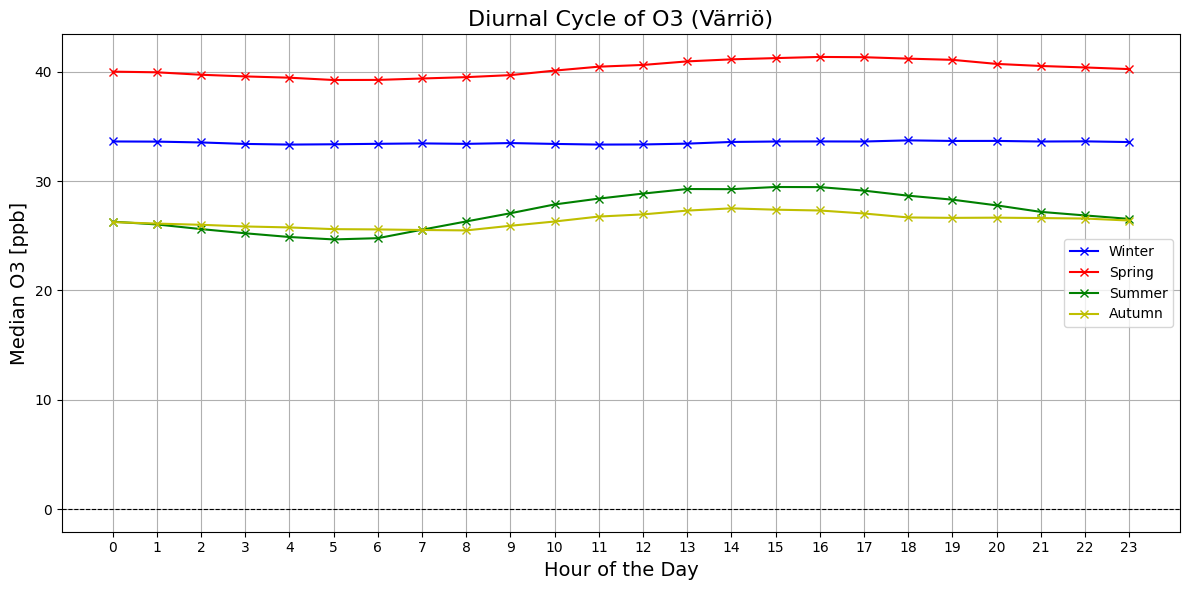

In [48]:
var_winter['Hour'] = var_winter.index.hour
var_spring['Hour'] = var_spring.index.hour
var_summer['Hour'] = var_summer.index.hour
var_autumn['Hour'] = var_autumn.index.hour

# print(diurnal_spring)
O_diurnal_var_winter = var_winter.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_spring = var_spring.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_summer = var_summer.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_autumn = var_autumn.groupby('Hour')['VAR_META.O3_1'].median()

plt.figure(figsize=(12, 6))

plt.plot(O_diurnal_var_winter.index, O_diurnal_var_winter.values, marker='x', linestyle='-', color='b', label='Winter')
plt.plot(O_diurnal_var_spring.index, O_diurnal_var_spring.values, marker='x', linestyle='-', color='r', label='Spring')
plt.plot(O_diurnal_var_summer.index, O_diurnal_var_summer.values, marker='x', linestyle='-', color='g', label='Summer')
plt.plot(O_diurnal_var_autumn.index, O_diurnal_var_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of O3 (Värriö)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median O3 [ppb]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
# plt.yscale('log')
plt.tight_layout()

plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3907388192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_winter['Hour'] = var_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3907388192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_spring['Hour'] = var_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3907388192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

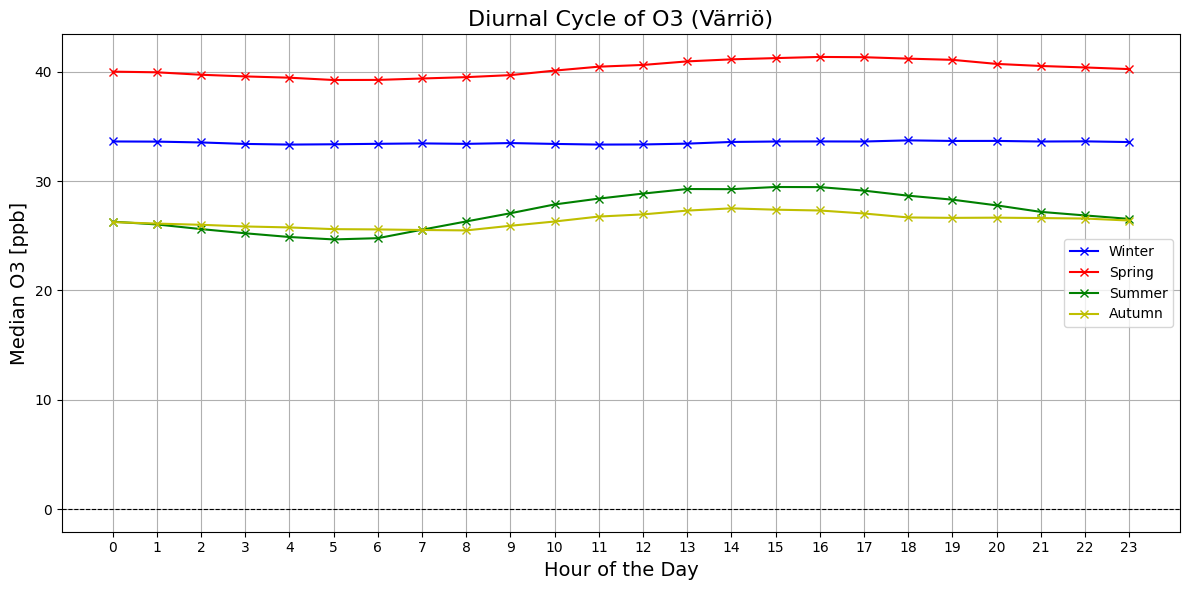

In [49]:
var_winter['Hour'] = var_winter.index.hour
var_spring['Hour'] = var_spring.index.hour
var_summer['Hour'] = var_summer.index.hour
var_autumn['Hour'] = var_autumn.index.hour

# print(diurnal_spring)
O_diurnal_var_winter = var_winter.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_spring = var_spring.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_summer = var_summer.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_autumn = var_autumn.groupby('Hour')['VAR_META.O3_1'].median()

plt.figure(figsize=(12, 6))

plt.plot(O_diurnal_var_winter.index, O_diurnal_var_winter.values, marker='x', linestyle='-', color='b', label='Winter')
plt.plot(O_diurnal_var_spring.index, O_diurnal_var_spring.values, marker='x', linestyle='-', color='r', label='Spring')
plt.plot(O_diurnal_var_summer.index, O_diurnal_var_summer.values, marker='x', linestyle='-', color='g', label='Summer')
plt.plot(O_diurnal_var_autumn.index, O_diurnal_var_autumn.values, marker='x', linestyle='-', color='y', label='Autumn')

plt.title('Diurnal Cycle of O3 (Värriö)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Median O3 [ppb]', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.legend()
# plt.yscale('log')
plt.tight_layout()

plt.show()

In [53]:
fig, ax = plt.subplots(5, 2, figsize=(24, 18))

# Hyytiälä O3
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

O_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.O3672'].median()
O_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.O3672'].median()
O_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.O3672'].median()
O_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.O3672'].median()

ax[0, 0].plot(O_diurnal_hyy_winter.index, O_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[0, 0].plot(O_diurnal_hyy_spring.index, O_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[0, 0].plot(O_diurnal_hyy_summer.index, O_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[0, 0].plot(O_diurnal_hyy_autumn.index, O_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[0, 0].set_title('Diurnal Cycle of O3 (Hyytiälä)', fontsize=16)
ax[0, 0].set_xlabel('Hour of the Day', fontsize=14)
ax[0, 0].set_ylabel('Median O3 [ppb]', fontsize=14)
ax[0, 0].set_xticks(range(0, 24))
ax[0, 0].grid(True)
ax[0, 0].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[0, 0].legend()
# ax[0, 0].set_yscale('log')

# Värriö O3
var_winter['Hour'] = var_winter.index.hour
var_spring['Hour'] = var_spring.index.hour
var_summer['Hour'] = var_summer.index.hour
var_autumn['Hour'] = var_autumn.index.hour

O_diurnal_var_winter = var_winter.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_spring = var_spring.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_summer = var_summer.groupby('Hour')['VAR_META.O3_1'].median()
O_diurnal_var_autumn = var_autumn.groupby('Hour')['VAR_META.O3_1'].median()

ax[0, 1].plot(O_diurnal_var_winter.index, O_diurnal_var_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[0, 1].plot(O_diurnal_var_spring.index, O_diurnal_var_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[0, 1].plot(O_diurnal_var_summer.index, O_diurnal_var_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[0, 1].plot(O_diurnal_var_autumn.index, O_diurnal_var_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[0, 1].set_title('Diurnal Cycle of O3 (Värriö)', fontsize=16)
ax[0, 1].set_xlabel('Hour of the Day', fontsize=14)
ax[0, 1].set_ylabel('Median O3 [ppb]', fontsize=14)
ax[0, 1].set_xticks(range(0, 24))
ax[0, 1].grid(True)
ax[0, 1].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[0, 1].legend()
# ax[0, 1].set_yscale('log')


# Hyytiälä NOx 'HYY_META.NOx672'
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

NO_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.NOx672'].median()
NO_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.NOx672'].median()
NO_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.NOx672'].median()
NO_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.NOx672'].median()

ax[1, 0].plot(NO_diurnal_hyy_winter.index, NO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[1, 0].plot(NO_diurnal_hyy_spring.index, NO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[1, 0].plot(NO_diurnal_hyy_summer.index, NO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[1, 0].plot(NO_diurnal_hyy_autumn.index, NO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[1, 0].set_title('Diurnal Cycle of NOx (Hyytiälä)', fontsize=16)
ax[1, 0].set_xlabel('Hour of the Day', fontsize=14)
ax[1, 0].set_ylabel('Median NOx [ppb]', fontsize=14)
ax[1, 0].set_xticks(range(0, 24))
ax[1, 0].grid(True)
ax[1, 0].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[1, 0].legend()
# ax[1, 0].set_yscale('log')

# Värriö NOx VAR_META.NOX_1
var_winter['Hour'] = var_winter.index.hour
var_spring['Hour'] = var_spring.index.hour
var_summer['Hour'] = var_summer.index.hour
var_autumn['Hour'] = var_autumn.index.hour

NO_diurnal_var_winter = var_winter.groupby('Hour')['VAR_META.NOX_1'].median()
NO_diurnal_var_spring = var_spring.groupby('Hour')['VAR_META.NOX_1'].median()
NO_diurnal_var_summer = var_summer.groupby('Hour')['VAR_META.NOX_1'].median()
NO_diurnal_var_autumn = var_autumn.groupby('Hour')['VAR_META.NOX_1'].median()

ax[1, 1].plot(NO_diurnal_var_winter.index, NO_diurnal_var_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[1, 1].plot(NO_diurnal_var_spring.index, NO_diurnal_var_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[1, 1].plot(NO_diurnal_var_summer.index, NO_diurnal_var_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[1, 1].plot(NO_diurnal_var_autumn.index, NO_diurnal_var_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[1, 1].set_title('Diurnal Cycle of NOx (Värriö)', fontsize=16)
ax[1, 1].set_xlabel('Hour of the Day', fontsize=14)
ax[1, 1].set_ylabel('Median NOx [ppb]', fontsize=14)
ax[1, 1].set_xticks(range(0, 24))
ax[1, 1].grid(True)
ax[1, 1].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[1, 1].legend()
# ax[1, 1].set_yscale('log')


# Hyytiälä SO2 , 'HYY_META.SO2672'
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

SO_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.SO2672'].median()
SO_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.SO2672'].median()
SO_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.SO2672'].median()
SO_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.SO2672'].median()

ax[2, 0].plot(SO_diurnal_hyy_winter.index, SO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[2, 0].plot(SO_diurnal_hyy_spring.index, SO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[2, 0].plot(SO_diurnal_hyy_summer.index, SO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[2, 0].plot(SO_diurnal_hyy_autumn.index, SO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[2, 0].set_title('Diurnal Cycle of SO2 (Hyytiälä)', fontsize=16)
ax[2, 0].set_xlabel('Hour of the Day', fontsize=14)
ax[2, 0].set_ylabel('Median SO2 [ppb]', fontsize=14)
ax[2, 0].set_xticks(range(0, 24))
ax[2, 0].grid(True)
ax[2, 0].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[2, 0].legend()
# ax[2, 0].set_yscale('log')

# Värriö SO2 	VAR_META.SO2_1
var_winter['Hour'] = var_winter.index.hour
var_spring['Hour'] = var_spring.index.hour
var_summer['Hour'] = var_summer.index.hour
var_autumn['Hour'] = var_autumn.index.hour

SO_diurnal_var_winter = var_winter.groupby('Hour')['VAR_META.SO2_1'].median()
SO_diurnal_var_spring = var_spring.groupby('Hour')['VAR_META.SO2_1'].median()
SO_diurnal_var_summer = var_summer.groupby('Hour')['VAR_META.SO2_1'].median()
SO_diurnal_var_autumn = var_autumn.groupby('Hour')['VAR_META.SO2_1'].median()

ax[2, 1].plot(SO_diurnal_var_winter.index, SO_diurnal_var_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[2, 1].plot(SO_diurnal_var_spring.index, SO_diurnal_var_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[2, 1].plot(SO_diurnal_var_summer.index, SO_diurnal_var_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[2, 1].plot(SO_diurnal_var_autumn.index, SO_diurnal_var_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[2, 1].set_title('Diurnal Cycle of SO2 (Värriö)', fontsize=16)
ax[2, 1].set_xlabel('Hour of the Day', fontsize=14)
ax[2, 1].set_ylabel('Median SO2 [ppb]', fontsize=14)
ax[2, 1].set_xticks(range(0, 24))
ax[2, 1].grid(True)
ax[2, 1].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[2, 1].legend()
# ax[2, 1].set_yscale('log')


# Hyytiälä CO 'HYY_META.CO672'
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

CO_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.CO672'].median()
CO_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.CO672'].median()
CO_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.CO672'].median()
CO_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.CO672'].median()

ax[3, 0].plot(CO_diurnal_hyy_winter.index, CO_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[3, 0].plot(CO_diurnal_hyy_spring.index, CO_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[3, 0].plot(CO_diurnal_hyy_summer.index, CO_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[3, 0].plot(CO_diurnal_hyy_autumn.index, CO_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[3, 0].set_title('Diurnal Cycle of CO (Hyytiälä)', fontsize=16)
ax[3, 0].set_xlabel('Hour of the Day', fontsize=14)
ax[3, 0].set_ylabel('Median CO [ppb]', fontsize=14)
ax[3, 0].set_xticks(range(0, 24))
ax[3, 0].grid(True)
ax[3, 0].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[3, 0].legend()
ax[3, 0].set_ylim(100, 200)
# ax[3, 0].set_yscale('log')

# Värriö CO VAR_META.CO_1
var_winter['Hour'] = var_winter.index.hour
var_spring['Hour'] = var_spring.index.hour
var_summer['Hour'] = var_summer.index.hour
var_autumn['Hour'] = var_autumn.index.hour

CO_diurnal_var_winter = var_winter.groupby('Hour')['VAR_META.CO_1'].median()
CO_diurnal_var_spring = var_spring.groupby('Hour')['VAR_META.CO_1'].median()
CO_diurnal_var_summer = var_summer.groupby('Hour')['VAR_META.CO_1'].median()
CO_diurnal_var_autumn = var_autumn.groupby('Hour')['VAR_META.CO_1'].median()

ax[3, 1].plot(CO_diurnal_var_winter.index, CO_diurnal_var_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[3, 1].plot(CO_diurnal_var_spring.index, CO_diurnal_var_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[3, 1].plot(CO_diurnal_var_summer.index, CO_diurnal_var_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[3, 1].plot(CO_diurnal_var_autumn.index, CO_diurnal_var_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[3, 1].set_title('Diurnal Cycle of CO (Värriö)', fontsize=16)
ax[3, 1].set_xlabel('Hour of the Day', fontsize=14)
ax[3, 1].set_ylabel('Median CO [ppb]', fontsize=14)
ax[3, 1].set_xticks(range(0, 24))
ax[3, 1].grid(True)
ax[3, 1].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[3, 1].legend()
ax[3, 1].set_ylim(100, 200)
# ax[3, 1].set_yscale('log')


# Hyytiälä CO2 HYY_META.CO2672
hyy_winter['Hour'] = hyy_winter.index.hour
hyy_spring['Hour'] = hyy_spring.index.hour
hyy_summer['Hour'] = hyy_summer.index.hour
hyy_autumn['Hour'] = hyy_autumn.index.hour

CO2_diurnal_hyy_winter = hyy_winter.groupby('Hour')['HYY_META.CO2672'].median()
CO2_diurnal_hyy_spring = hyy_spring.groupby('Hour')['HYY_META.CO2672'].median()
CO2_diurnal_hyy_summer = hyy_summer.groupby('Hour')['HYY_META.CO2672'].median()
CO2_diurnal_hyy_autumn = hyy_autumn.groupby('Hour')['HYY_META.CO2672'].median()

ax[4, 0].plot(CO2_diurnal_hyy_winter.index, CO2_diurnal_hyy_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[4, 0].plot(CO2_diurnal_hyy_spring.index, CO2_diurnal_hyy_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[4, 0].plot(CO2_diurnal_hyy_summer.index, CO2_diurnal_hyy_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[4, 0].plot(CO2_diurnal_hyy_autumn.index, CO2_diurnal_hyy_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[4, 0].set_title('Diurnal Cycle of CO2 (Hyytiälä)', fontsize=16)
ax[4, 0].set_xlabel('Hour of the Day', fontsize=14)
ax[4, 0].set_ylabel('Median CO2 [ppm]', fontsize=14)
ax[4, 0].set_xticks(range(0, 24))
ax[4, 0].grid(True)
ax[4, 0].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[4, 0].legend()
ax[4, 0].set_ylim(360, 420)
# ax[4, 0].set_yscale('log')

# Värriö CO2 VAR_EDDY.av_c
var_winter['Hour'] = var_winter.index.hour
var_spring['Hour'] = var_spring.index.hour
var_summer['Hour'] = var_summer.index.hour
var_autumn['Hour'] = var_autumn.index.hour

CO2_diurnal_var_winter = var_winter.groupby('Hour')['VAR_EDDY.av_c'].median()
CO2_diurnal_var_spring = var_spring.groupby('Hour')['VAR_EDDY.av_c'].median()
CO2_diurnal_var_summer = var_summer.groupby('Hour')['VAR_EDDY.av_c'].median()
CO2_diurnal_var_autumn = var_autumn.groupby('Hour')['VAR_EDDY.av_c'].median()

ax[4, 1].plot(CO2_diurnal_var_winter.index, CO2_diurnal_var_winter.values, marker='x', linestyle='-', color='b', label='Winter')
ax[4, 1].plot(CO2_diurnal_var_spring.index, CO2_diurnal_var_spring.values, marker='x', linestyle='-', color='r', label='Spring')
ax[4, 1].plot(CO2_diurnal_var_summer.index, CO2_diurnal_var_summer.values, marker='x', linestyle='-', color='g', label='Summer')
ax[4, 1].plot(CO2_diurnal_var_autumn.index, CO2_diurnal_var_autumn.values, marker='x', linestyle='-', color='k', label='Autumn')

ax[4, 1].set_title('Diurnal Cycle of CO2 (Värriö)', fontsize=16)
ax[4, 1].set_xlabel('Hour of the Day', fontsize=14)
ax[4, 1].set_ylabel('Median CO2 [ppm]', fontsize=14)
ax[4, 1].set_xticks(range(0, 24))
ax[4, 1].grid(True)
ax[4, 1].axhline(0, color='black', linewidth=0.8, linestyle='--')
ax[4, 1].legend()
ax[4, 1].set_ylim(360, 420)

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3976435794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Hour'] = hyy_winter.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3976435794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_spring['Hour'] = hyy_spring.index.hour
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/3976435794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(24, 12))

# CO2 plots VAR_EDDY.av_c HYY_META.CO2672
var_winter['Year'] = var_winter.index.year
var_CO2_winter = var_winter.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_winter['Year'] = hyy_winter.index.year
hyy_CO2_winter = hyy_winter.groupby('Year')['HYY_META.CO2672'].median()

ax[0, 0].plot(hyy_CO2_winter.index, hyy_CO2_winter.values, marker='o', linestyle='-', label='HYY CO2')
ax[0, 0].plot(var_CO2_winter.index, var_CO2_winter.values, marker='o', linestyle='-', label='VAR CO2')
ax[0, 0].set_title('Line Plot of CO2 by Year in Winter')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('CO2 [ppm]')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].grid(True)
ax[0, 0].legend(loc='best')
# ax[0, 0].set_yscale('log')

var_spring['Year'] = var_spring.index.year
var_CO2_spring = var_spring.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_spring['Year'] = hyy_spring.index.year
hyy_CO2_spring = hyy_spring.groupby('Year')['HYY_META.CO2672'].median()

ax[0, 1].plot(hyy_CO2_spring.index, hyy_CO2_spring.values, marker='o', linestyle='-', label='HYY CO2')
ax[0, 1].plot(var_CO2_spring.index, var_CO2_spring.values, marker='o', linestyle='-', label='VAR CO2')
ax[0, 1].set_title('Line Plot of CO2 by Year in spring')
ax[0, 1].set_xlabel('Year')
ax[0, 1].set_ylabel('CO2 [ppm]')
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].grid(True)
ax[0, 1].legend(loc='best')
# ax[0, 1].set_yscale('log')

var_summer['Year'] = var_summer.index.year
var_CO2_summer = var_summer.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_summer['Year'] = hyy_summer.index.year
hyy_CO2_summer = hyy_summer.groupby('Year')['HYY_META.CO2672'].median()

ax[1, 0].plot(hyy_CO2_summer.index, hyy_CO2_summer.values, marker='o', linestyle='-', label='HYY CO2')
ax[1, 0].plot(var_CO2_summer.index, var_CO2_summer.values, marker='o', linestyle='-', label='VAR CO2')
ax[1, 0].set_title('Line Plot of CO2 by Year in summer')
ax[1, 0].set_xlabel('Year')
ax[1, 0].set_ylabel('CO2 [ppm]')
ax[1, 0].tick_params(axis='x', rotation=45)
ax[1, 0].grid(True)
ax[1, 0].legend(loc='best')
# ax[1, 0].set_yscale('log')

var_autumn['Year'] = var_autumn.index.year
var_CO2_autumn = var_autumn.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_autumn['Year'] = hyy_autumn.index.year
hyy_CO2_autumn = hyy_autumn.groupby('Year')['HYY_META.CO2672'].median()

ax[1, 1].plot(hyy_CO2_autumn.index, hyy_CO2_autumn.values, marker='o', linestyle='-', label='HYY CO2')
ax[1, 1].plot(var_CO2_autumn.index, var_CO2_autumn.values, marker='o', linestyle='-', label='VAR CO2')
ax[1, 1].set_title('Line Plot of CO2 by Year in autumn')
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_ylabel('CO2 [ppm]')
ax[1, 1].tick_params(axis='x', rotation=45)
ax[1, 1].grid(True)
ax[1, 1].legend(loc='best')
# ax[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1402449382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_winter['Year'] = var_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1402449382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyy_winter['Year'] = hyy_winter.index.year
/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1402449382.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1679214232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_df['Year'] = var_df.index.year


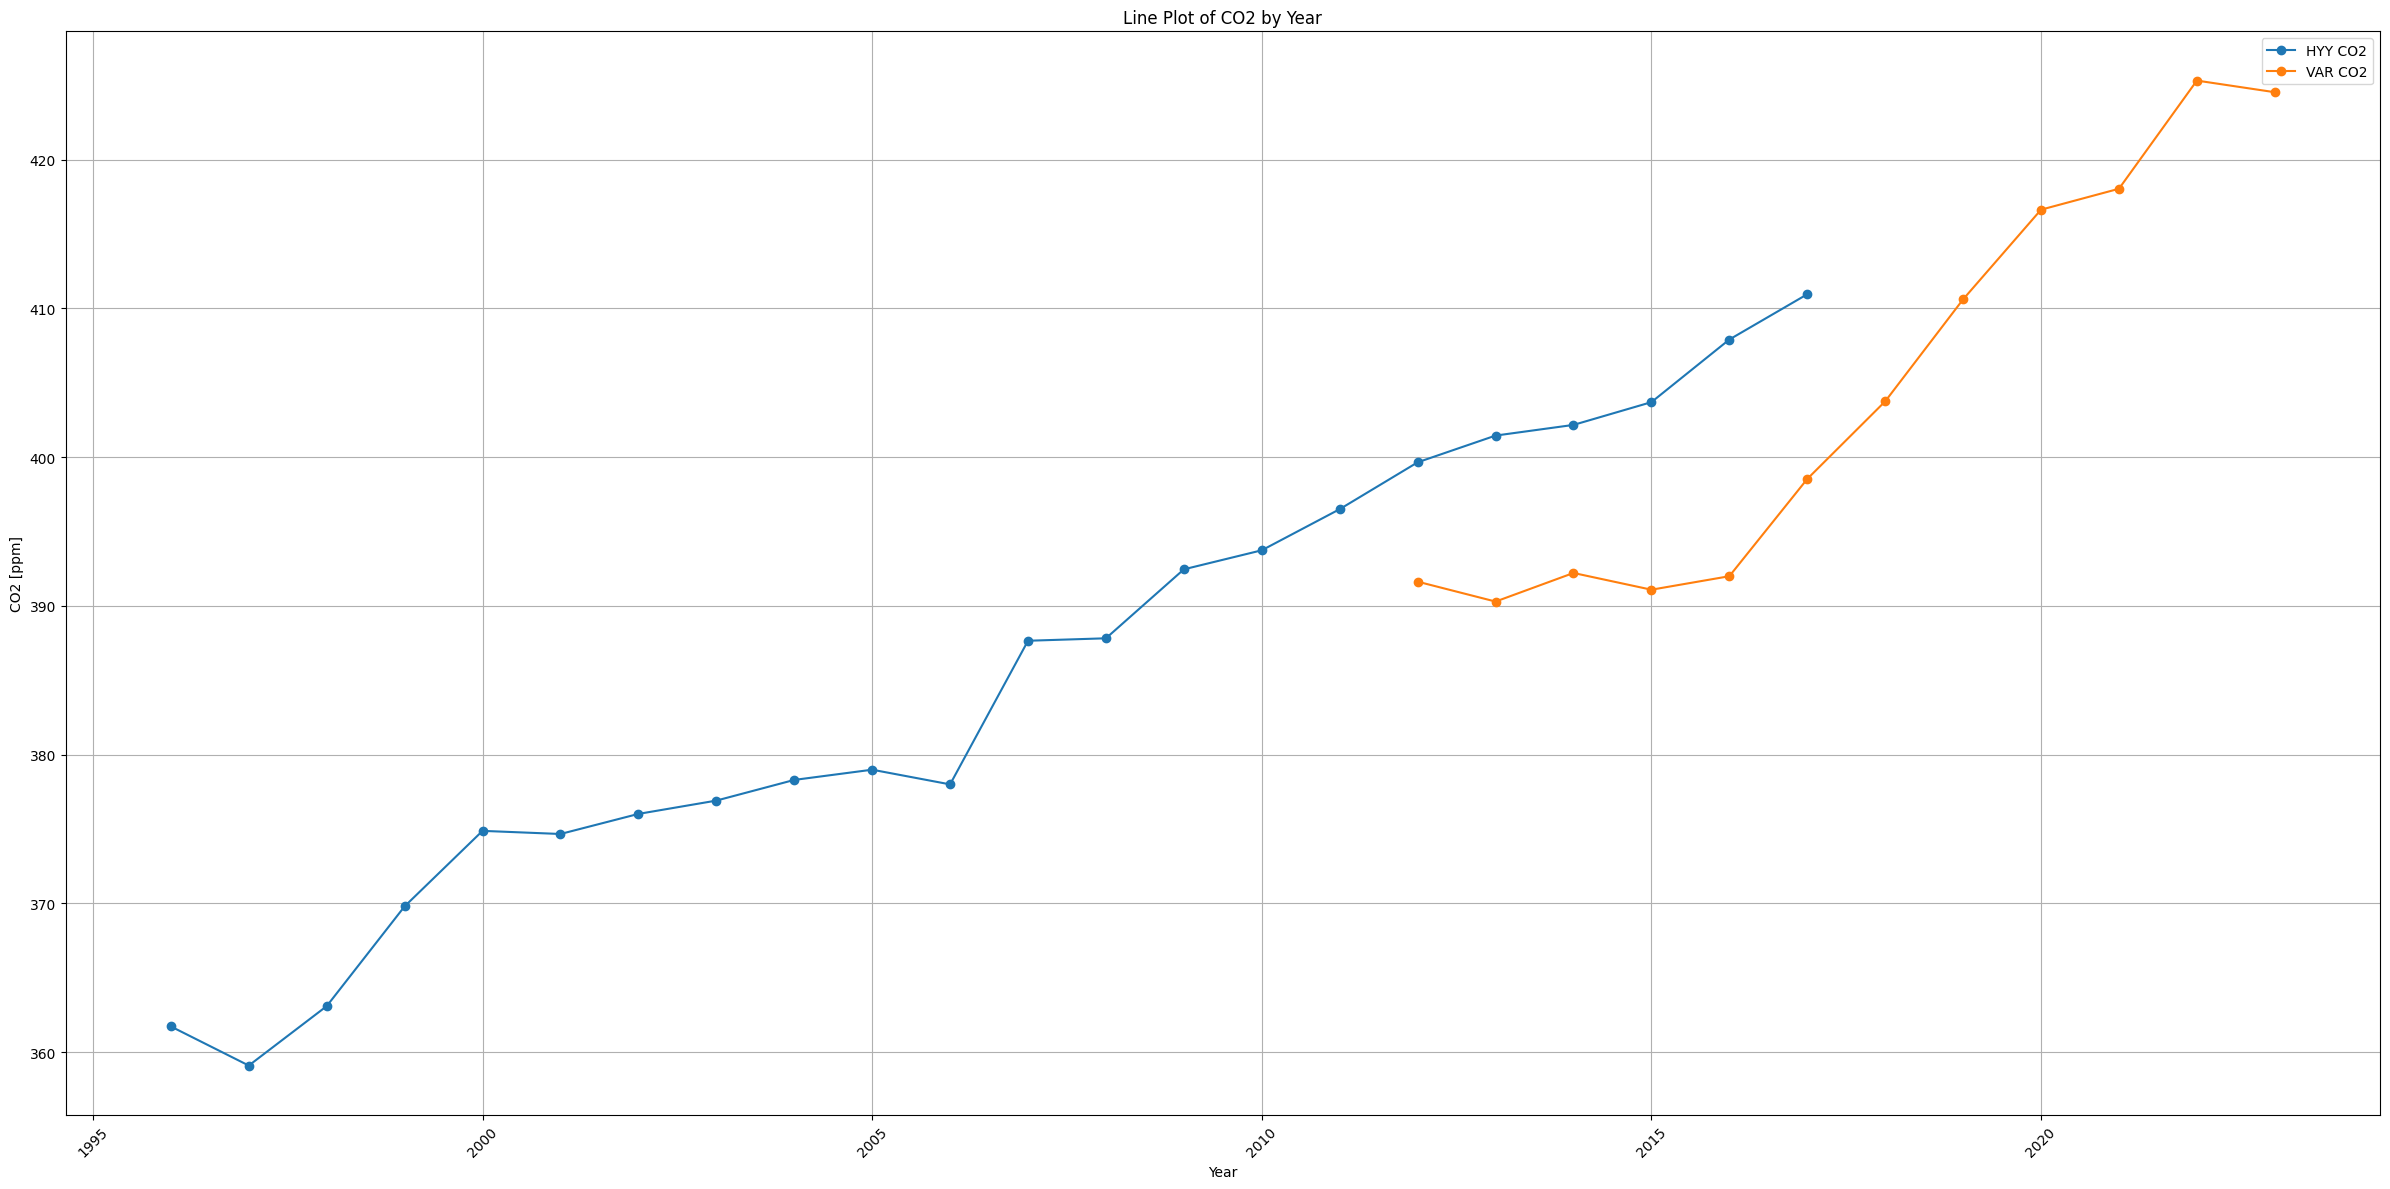

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

# CO2 plots VAR_EDDY.av_c HYY_META.CO2672
var_df['Year'] = var_df.index.year
var_CO2_df = var_df.groupby('Year')['VAR_EDDY.av_c'].median()

hyy_df['Year'] = hyy_df.index.year
hyy_CO2_df = hyy_df.groupby('Year')['HYY_META.CO2672'].median()

ax.plot(hyy_CO2_df.index, hyy_CO2_df.values, marker='o', linestyle='-', label='HYY CO2')
ax.plot(var_CO2_df.index, var_CO2_df.values, marker='o', linestyle='-', label='VAR CO2')
ax.set_title('Line Plot of CO2 by Year')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 [ppm]')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend(loc='best')
# ax[0, 0].set_yscale('log')

plt.tight_layout()
plt.show()

In [62]:
def compute_daily_averages(filtered_data):
    return filtered_data.resample('M').median()

hyy_data_mouna = data_fetched_hyy

hyy_df_d = compute_daily_averages(hyy_data_mouna)

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/656347962.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return filtered_data.resample('M').median()


In [63]:

def compute_daily_averages(filtered_data):
    return filtered_data.resample('M').median()

var_data_mouna = data_fetched_var

var_df_d = compute_daily_averages(var_data_mouna)

/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_13157/1794098200.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return filtered_data.resample('M').median()


In [61]:
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

# CO2 plots VAR_EDDY.av_c HYY_META.CO2672
var_df_d['Month'] = var_df_d.index.month
var_CO2_df = var_df_d['VAR_EDDY.av_c']

hyy_df_d['Month'] = hyy_df_d.index.month
hyy_CO2_df = hyy_df_d['HYY_META.CO2672']

ax.plot(hyy_CO2_df.index, hyy_CO2_df.values, marker='o', linestyle='-', label='HYY CO2')
ax.plot(var_CO2_df.index, var_CO2_df.values, marker='o', linestyle='-', label='VAR CO2')
ax.set_title('Line Plot of CO2 by Year')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 [ppm]')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend(loc='best')
# ax[0, 0].set_yscale('log')

plt.tight_layout()
plt.show()

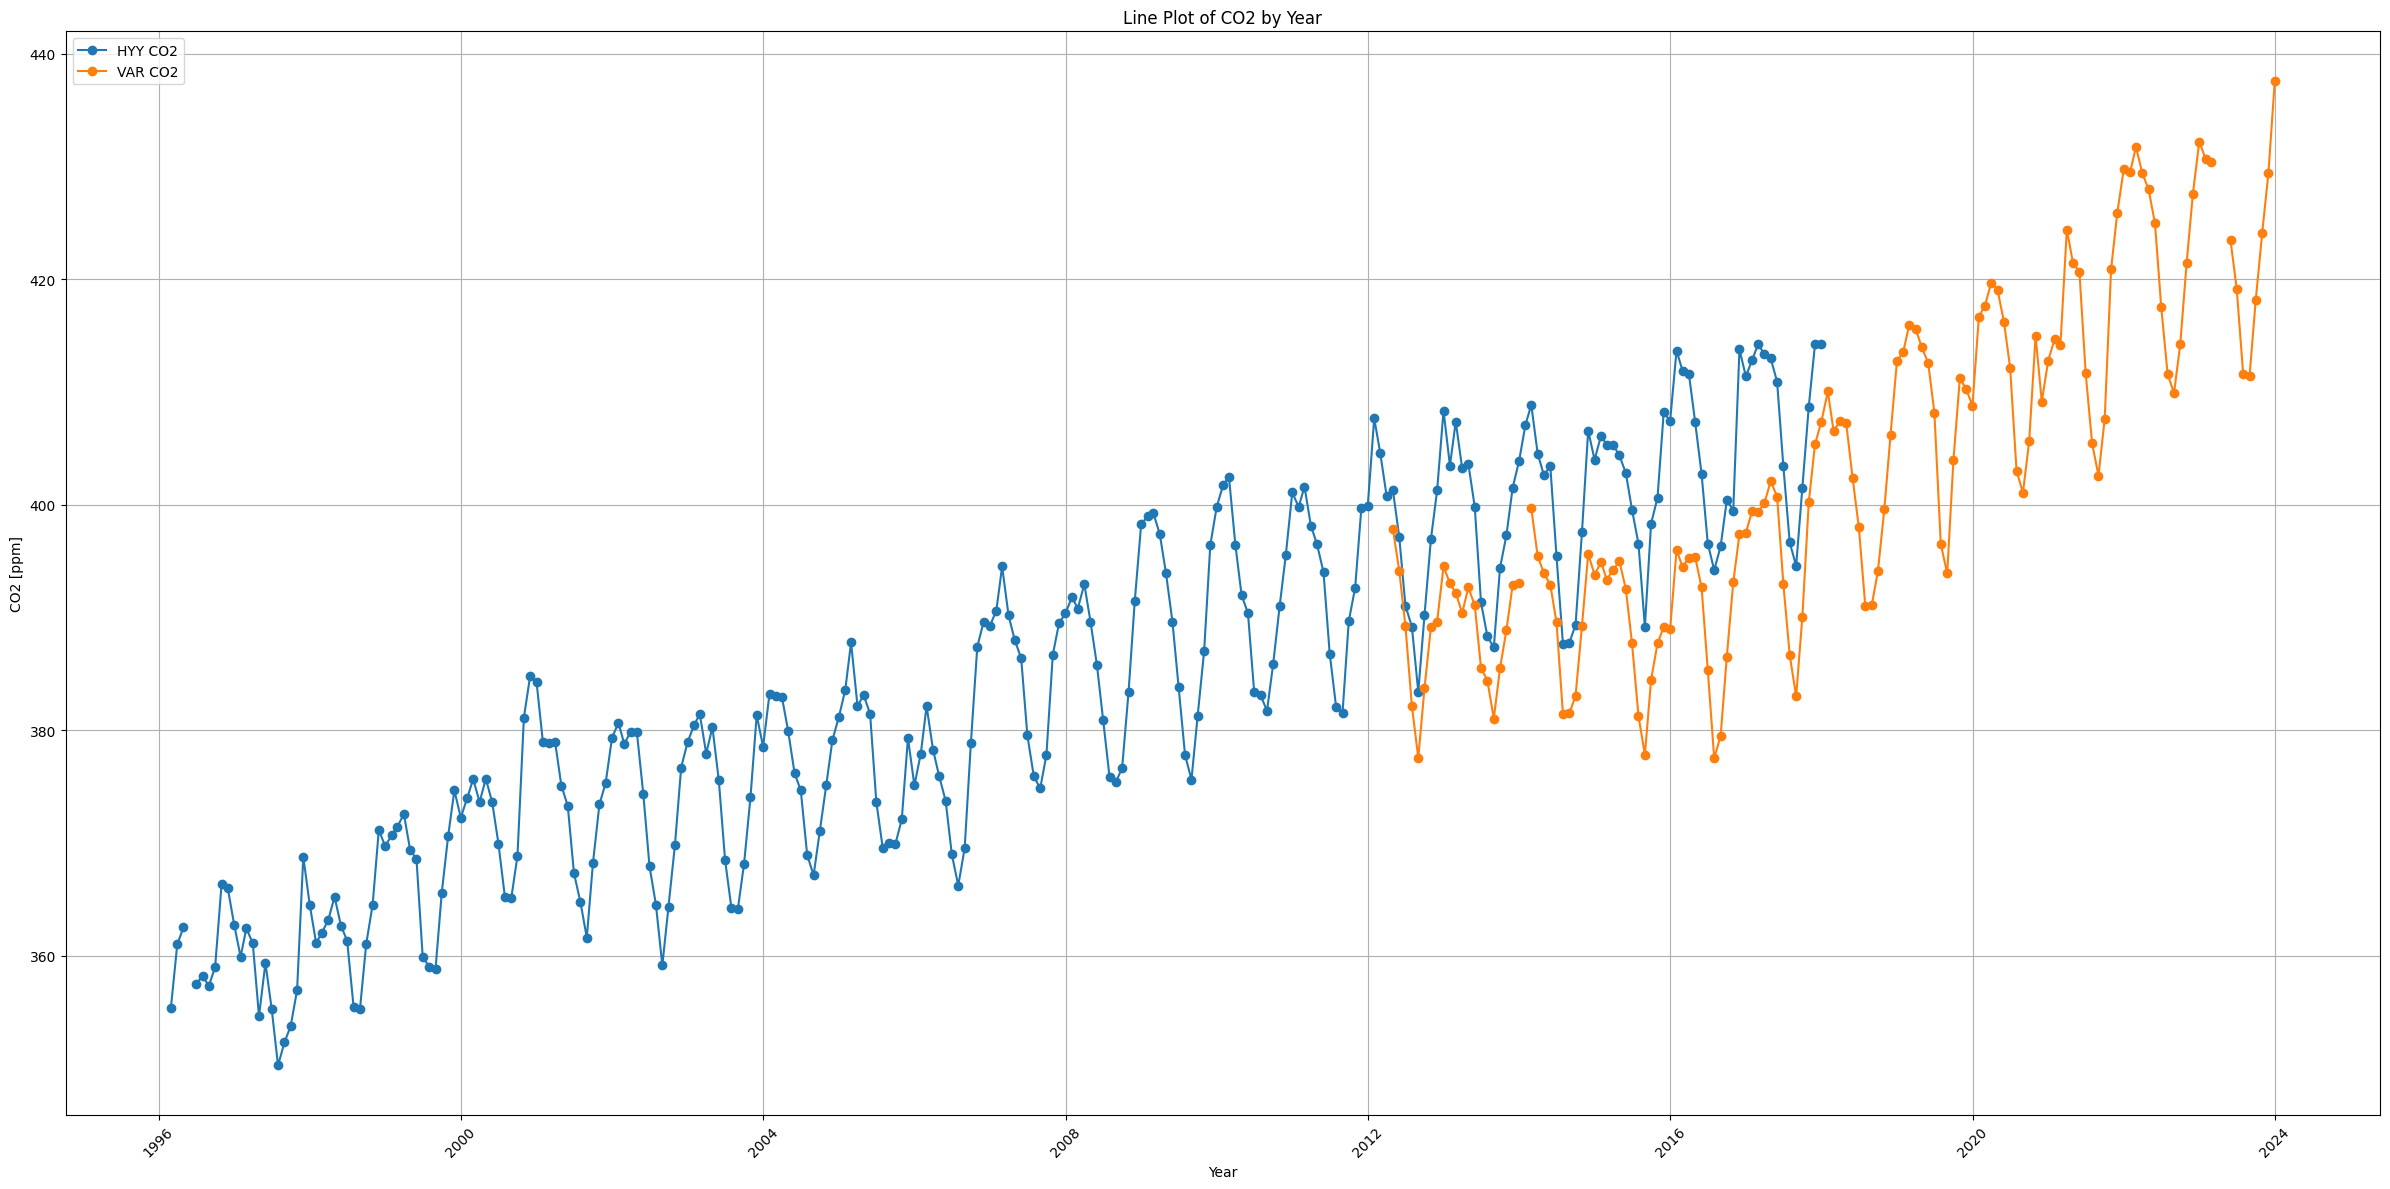

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

# CO2 plots VAR_EDDY.av_c HYY_META.CO2672
var_df_d['Month'] = var_df_d.index.month
var_CO2_df = var_df_d['VAR_EDDY.av_c']

hyy_df_d['Month'] = hyy_df_d.index.month
hyy_CO2_df = hyy_df_d['HYY_META.CO2672']

ax.plot(hyy_CO2_df.index, hyy_CO2_df.values, marker='o', linestyle='-', label='HYY CO2')
ax.plot(var_CO2_df.index, var_CO2_df.values, marker='o', linestyle='-', label='VAR CO2')
ax.set_title('Line Plot of CO2 by Year')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 [ppm]')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend(loc='best')
# ax[0, 0].set_yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.optimize import curve_fit


# Extract the CO2 data
# var_CO2_df = var_df_d['VAR_EDDY.av_c']
# hyy_CO2_df = hyy_df_d['HYY_META.CO2672']

var_CO2_df = var_df_d['VAR_EDDY.av_c'].dropna()
hyy_CO2_df = hyy_df_d['HYY_META.CO2672'].dropna()


# Define a function for polynomial fitting
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

# Fit linear and polynomial models
x_var = np.arange(len(var_CO2_df))
x_hyy = np.arange(len(hyy_CO2_df))

# # Linear fit
# linear_fit_var = np.polyfit(x_var, var_CO2_df.values, 1)
# linear_fit_hyy = np.polyfit(x_hyy, hyy_CO2_df.values, 1)

# Polynomial fit
poly_fit_var, _ = curve_fit(polynomial, x_var, var_CO2_df.values)
poly_fit_hyy, _ = curve_fit(polynomial, x_hyy, hyy_CO2_df.values)

# # Generate fitted values
# linear_fit_var_values = np.polyval(linear_fit_var, x_var)
# linear_fit_hyy_values = np.polyval(linear_fit_hyy, x_hyy)

poly_fit_var_values = polynomial(x_var, *poly_fit_var)
poly_fit_hyy_values = polynomial(x_hyy, *poly_fit_hyy)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

ax.plot(hyy_CO2_df.index, hyy_CO2_df.values, marker='o', linestyle='-', label='HYY CO2')
ax.plot(var_CO2_df.index, var_CO2_df.values, marker='o', linestyle='-', label='VAR CO2')

# # Plot linear fits
# ax.plot(var_CO2_df.index, linear_fit_var_values, linestyle='--', color='blue', label='VAR Linear Fit')
# ax.plot(hyy_CO2_df.index, linear_fit_hyy_values, linestyle='--', color='orange', label='HYY Linear Fit')

# Plot polynomial fits
ax.plot(var_CO2_df.index, poly_fit_var_values, linestyle=':', color='blue', label='VAR Polynomial Fit')
ax.plot(hyy_CO2_df.index, poly_fit_hyy_values, linestyle=':', color='orange', label='HYY Polynomial Fit')

ax.set_title('Line Plot of CO2 by Year with Fits')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 [ppm]')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
# Extract the CO2 data
var_CO2_df = var_df_d['VAR_EDDY.av_c'].dropna()
hyy_CO2_df = hyy_df_d['HYY_META.CO2672'].dropna()

# Find maxima and minima
var_max = var_CO2_df.max()
var_min = var_CO2_df.min()
var_diff = var_max - var_min

hyy_max = hyy_CO2_df.max()
hyy_min = hyy_CO2_df.min()
hyy_diff = hyy_max - hyy_min

# Print the results
print(f"VAR CO2 Max: {var_max}")
print(f"VAR CO2 Min: {var_min}")
print(f"VAR CO2 Difference: {var_diff}")

print(f"HYY CO2 Max: {hyy_max}")
print(f"HYY CO2 Min: {hyy_min}")
print(f"HYY CO2 Difference: {hyy_diff}")

# Fit linear models
x_var = np.arange(len(var_CO2_df))
x_hyy = np.arange(len(hyy_CO2_df))

linear_fit_var = np.polyfit(x_var, var_CO2_df.values, 1)
linear_fit_hyy = np.polyfit(x_hyy, hyy_CO2_df.values, 1)

# Generate fitted values
linear_fit_var_values = np.polyval(linear_fit_var, x_var)
linear_fit_hyy_values = np.polyval(linear_fit_hyy, x_hyy)

# Plot the results
fig, ax = plt.subplots(1, 1, figsize=(24, 12))

ax.plot(hyy_CO2_df.index, hyy_CO2_df.values, marker='o', linestyle='-', label='HYY CO2')
ax.plot(var_CO2_df.index, var_CO2_df.values, marker='o', linestyle='-', label='VAR CO2')

# Plot linear fits
ax.plot(var_CO2_df.index, linear_fit_var_values, linestyle='--', color='blue', label='VAR Linear Fit')
ax.plot(hyy_CO2_df.index, linear_fit_hyy_values, linestyle='--', color='orange', label='HYY Linear Fit')

ax.set_title('Line Plot of CO2 by Year with Linear Fits')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 [ppm]')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

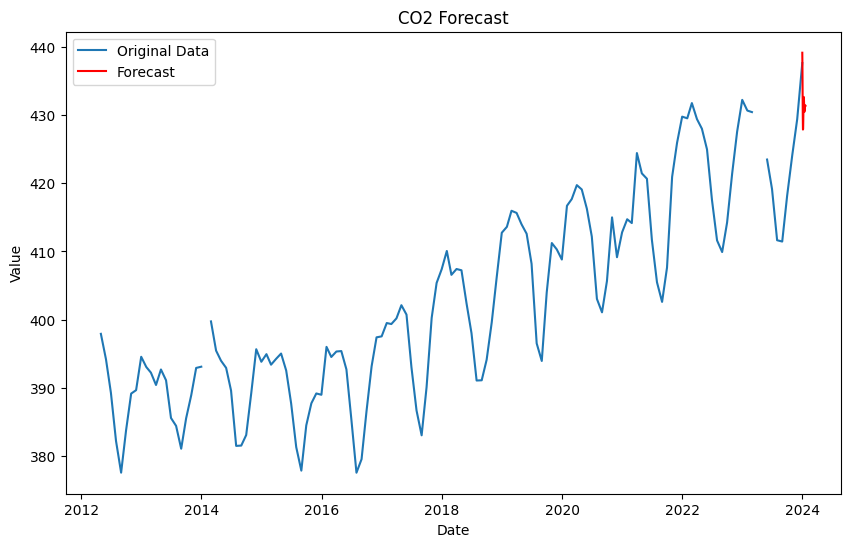

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(var_df_d['VAR_EDDY.av_c'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast_steps = 20  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(var_df_d.index, var_df_d['VAR_EDDY.av_c'], label='Original Data')
plt.plot(pd.date_range(var_df_d.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('CO2 Forecast')
plt.legend()
plt.show()

In [83]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare the data for Prophet: reset the index to get the datetime column and rename it to 'ds'
df_prophet = var_df_d.reset_index()
df_prophet.rename(columns={df_prophet.columns[0]: 'ds', 'VAR_EDDY.av_c': 'y'}, inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

# Make a future dataframe for forecasting
future = model.make_future_dataframe(periods=20)  # Forecasting 30 days into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

18:59:30 - cmdstanpy - INFO - Chain [1] start processing
18:59:30 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
var_df_d

VAR_META.O3_1  VAR_META.NOX_1  VAR_META.SO2_1  VAR_META.CO_1  \
time                                                                       
1996-01-31            NaN             NaN             NaN            NaN   
1996-02-29            NaN             NaN             NaN            NaN   
1996-03-31            NaN             NaN             NaN            NaN   
1996-04-30            NaN             NaN             NaN            NaN   
1996-05-31            NaN             NaN             NaN            NaN   
...                   ...             ...             ...            ...   
2023-08-31          26.38            0.02            0.01          94.02   
2023-09-30          26.42            0.01            0.01            NaN   
2023-10-31          24.93            0.03            0.04         152.00   
2023-11-30          34.30            0.07            0.11            NaN   
2023-12-31          20.74            0.47            0.68            NaN   

            VAR_EDDY.av_c  Month  
time                              
1996-01-31            NaN      1  
1996-02-29            NaN      2  
1996-03-31            NaN      3  
1996-04-30            NaN      4  
1996-05-31            NaN      5  
...                   ...    ...  
2023-08-31       411.4475      8  
2023-09-30       418.1904      9  
2023-10-31       424.1184     10  
2023-11-30       429.4008     11  
2023-12-31       437.6384     12  

[336 rows x 6 columns]